In [1]:
from EEGModels import EEGNet

model = EEGNet(2, Chans = 14, Samples = 100)#, F1 = 62, D = 6, F2 = 90, dropoutRate = 0.5, kernLength = 32, norm_rate = 0.4, dropoutType = 'SpatialDropout2D')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [1]:
import pandas as pd

data = pd.read_csv('full_data_shuffle_21_04_1167.csv').drop(['Unnamed: 0'], axis = 1)
data.columns = ['sample_num', str(0), str(1), str(2), str(3), str(4), str(5),str(6),str(7),str(8),str(9),str(10),str(11),str(12),str(13), 'gesture']


In [2]:
data

sample_num         0         1         2         3         4  \
0                0  4178.077  4193.462  4197.179  4189.487  4198.974   
1                0  4185.641  4192.179  4203.462  4194.359  4209.615   
2                0  4187.051  4203.974  4203.846  4201.538  4205.641   
3                0  4180.641  4200.769  4198.077  4202.564  4202.436   
4                0  4184.615  4198.974  4203.333  4208.718  4208.462   
...            ...       ...       ...       ...       ...       ...   
116695        1176  4211.282  4201.538  4205.641  4200.256  4207.179   
116696        1176  4218.590  4203.077  4207.564  4200.769  4208.333   
116697        1176  4217.179  4210.000  4208.718  4209.103  4212.179   
116698        1176  4215.385  4209.487  4209.103  4209.231  4211.538   
116699        1176  4216.410  4209.231  4206.795  4204.231  4208.974   

               5         6         7         8         9        10        11  \
0       4191.923  4203.846  4196.410  4207.436  4206.538  4193.333  4238.846   
1       4199.103  4206.795  4200.513  4210.897  4213.205  4207.692  4246.410   
2       4205.513  4216.795  4203.846  4206.667  4207.692  4217.949  4249.103   
3       4193.333  4203.846  4202.821  4203.077  4198.590  4205.385  4241.667   
4       4200.641  4202.564  4205.641  4212.564  4210.000  4199.744  4247.692   
...          ...       ...       ...       ...       ...       ...       ...   
116695  4214.231  4212.564  4200.385  4211.154  4213.077  4206.410  4212.436   
116696  4219.744  4209.359  4203.718  4210.000  4211.026  4206.026  4213.462   
116697  4218.077  4204.359  4207.179  4213.205  4213.974  4213.077  4212.051   
116698  4211.282  4206.282  4210.000  4212.949  4220.641  4222.051  4208.590   
116699  4208.846  4210.385  4216.667  4211.538  4219.103  4217.821  4211.410   

              12        13       gesture  
0       4188.846  4204.744    сжать руку  
1       4204.744  4216.795    сжать руку  
2       4212.308  4223.333    сжать руку  
3       4201.538  4211.795    сжать руку  
4       4200.769  4210.897    сжать руку  
...          ...       ...           ...  
116695  4206.538  4207.949  разжать руку  
116696  4207.564  4212.179  разжать руку  
116697  4216.026  4216.538  разжать руку  
116698  4224.487  4216.538  разжать руку  
116699  4226.282  4212.051  разжать руку  

[116700 rows x 16 columns]

In [3]:
data_0 = data[data['gesture'] == 'сжать руку'].drop(['gesture', 'sample_num'], axis = 1)
data_0.to_csv('data_0.csv', index = False)
data_1 = data[data['gesture'] == 'разжать руку'].drop(['gesture', 'sample_num'], axis = 1)
data_1.to_csv('data_1.csv', index = False)

In [11]:
data

0         1         2         3         4         5         6  \
0      -0.040602 -0.027645  0.138276  0.082370  0.029020  0.011225  0.044200   
1       0.032801 -0.239124  0.246996  0.163010  0.325023 -0.004780  0.071949   
2      -0.180256  0.181488 -0.035108  0.442875  0.390551 -0.009366  0.025124   
3      -0.173106 -0.092261  0.182355  0.122699  0.123910 -0.050529  0.203779   
4      -0.033451 -0.109884 -0.593471 -0.233070 -0.384485 -0.167204 -0.226388   
...          ...       ...       ...       ...       ...       ...       ...   
279995  0.720333  0.765403  0.355739  0.331414 -0.228579 -0.288447  0.117056   
279996  0.145600  1.332869  0.443898  0.246019  0.474143  1.623955  0.340805   
279997 -0.058519 -0.020589  0.402753 -0.067053  0.069680  0.002071  0.130923   
279998  1.067668 -0.049969  0.990502  0.834220  0.227859 -0.583532 -0.247196   
279999 -0.323499 -0.033520 -0.534698 -0.470256 -0.540391 -0.142046 -0.082421   

               7         8         9        10        11        12        13  \
0      -0.053249  0.068444  0.095364  0.018756  0.038852 -0.008728 -0.027832   
1       0.004196 -0.095787  0.051362  0.031768 -0.087101 -0.002430  0.021367   
2       0.226766  0.426539 -0.542696  0.052228  0.371722 -0.012326 -0.025867   
3       0.153178  0.343079  0.183369  0.117315  0.187296  0.123449  0.063680   
4      -0.223764 -0.327349 -0.287467 -0.131885 -0.101724 -0.140905 -0.141978   
...          ...       ...       ...       ...       ...       ...       ...   
279995 -0.046067 -0.278877 -0.200926  0.027119  0.275014  0.409391  0.247687   
279996  0.215999  0.671562  0.492875  0.121964  0.304250  0.460639  0.135513   
279997  0.431401  0.908500  0.362320  0.247496  0.458317  0.153123 -0.024877   
279998 -0.204023 -0.451194  0.044028  0.134983  0.119815  0.242139  0.216203   
279999 -0.162735 -0.319263 -0.315338 -0.198829 -0.306395 -0.196656 -0.157720   

        gesture  sample_num  
0             0        2094  
1             1        1095  
2             1         442  
3             0        2048  
4             1          68  
...         ...         ...  
279995        1        1833  
279996        0        1638  
279997        0         736  
279998        0         993  
279999        1        2754  

[280000 rows x 16 columns]

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('df_all.csv').drop(['Unnamed: 0'], axis = 1)
data.columns = [ str(0), str(1), str(2), str(3), str(4), str(5),str(6),str(7),str(8),str(9),str(10),str(11),str(12),str(13),'sample_num', 'gesture']

#data = data.drop(['Unnamed: 0'], axis = 1)
d_t = pd.DataFrame(StandardScaler().fit_transform(data.drop(['sample_num', 'gesture'], axis = 1)))
d_t['gesture'] = data['gesture']
d_t['sample_num'] = data['sample_num']
data = d_t
data = data.sample(frac=1).reset_index(drop=True)
data.shape


(280000, 16)

In [3]:
len(data['sample_num'].unique())

2800

In [4]:
import numpy as np
import random
np_lst = []
sample_nums_rand = data['sample_num'].unique()
#random.shuffle(sample_nums_rand)
for n in sample_nums_rand:
    sample = data[data['sample_num'] == n].drop(['sample_num', 'gesture'], axis = 1)
    np_lst.append(sample.values)
    
data_reshaped = np.array(np_lst).reshape(( 2800,1,14, 100))
np_lst

[array([[-0.68158719, -0.4459023 , -0.57584381, ..., -0.19281814,
         -0.050087  , -0.23840974],
        [-0.38794991, -0.30021208, -0.3936349 , ..., -0.0038837 ,
          0.00206573, -0.16559469],
        [-0.22322758, -0.24029745, -0.36131453, ..., -0.03649701,
         -0.03480448, -0.15575503],
        ...,
        [-0.71381942, -0.53166873, -0.60816417, ..., -0.08147848,
         -0.11033336, -0.27776839],
        [ 0.08472427, -0.13690853,  0.02953264, ...,  0.13893773,
          0.0677055 , -0.0081524 ],
        [-0.30380815, -0.20035132, -0.24083522, ..., -0.07361023,
         -0.04289812, -0.18723888]]),
 array([[ 3.56868743e-01,  2.16732529e-01, -4.98012439e-02, ...,
          2.07532710e-01,  6.59030167e-02,  1.78808892e-01],
        [-2.10700586e-01, -1.35735534e-01, -1.40750865e+00, ...,
         -1.38836871e-01, -5.27872145e-02, -1.61657290e-01],
        [-5.67176764e-02, -1.59232183e-01, -1.11657953e+00, ...,
         -5.22422826e-02,  5.65666049e-03, -1.08521571e-

In [5]:
from keras.utils import to_categorical
y = data[['gesture', 'sample_num']]
l = []
for i in sample_nums_rand:
    s_y = y[y['sample_num']==i]
    if(s_y['gesture'].iloc[0] == 0):
        l.append(0)
    else:
        l.append(1)
#print(data['gesture'])      
y = to_categorical(np.array(l).reshape((len(l), )))
y

Using TensorFlow backend.


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [5]:
X.shape

NameError: name 'X' is not defined

from sklearn.model_selection import train_test_split
def shuffle_split(train_size = 0.9):
    X_train, X_validate, Y_train, Y_validate = train_test_split(data_reshaped, y, test_size = 1-train_size)
    X_validate, X_test, Y_validate, Y_test = train_test_split(X_validate, Y_validate, test_size = 0.5)
    return X_train, X_validate, X_test, Y_train, Y_validate, Y_test
X_train, X_validate, X_test, Y_train, Y_validate, Y_test = shuffle_split(0.90)

In [ ]:
y.shape

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
X =  data_reshaped
def shuffle_split(train_size = 0.9):
    sss = StratifiedShuffleSplit(n_splits = 1, test_size = 1-train_size)
    for train_index, test_index in sss.split(data_reshaped, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = data_reshaped[train_index], data_reshaped[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train,  X_test, y_train, y_test
#X_train, X_test, Y_train, Y_test = shuffle_split(0.90)

X_train = X[:2400]
X_test = X[2400:]
y_train = y[:2400]
y_test = y[2400:]
print(X_test.shape)

(400, 1, 14, 100)



from sklearn.model_selection import train_test_split
from EEGModels import  EEGNet
kernels, chans, samples = 1, 14, 100
class_weights = {0:1, 1:1, 2:1, 3:1}
#X_train, X_validate, Y_train, Y_validate = train_test_split(data_reshaped, y, test_size = 0.10,shuffle = True)
model2 = EEGNet(nb_classes = 2, Chans = chans, Samples = samples,  
               dropoutRate = 0.5, kernLength = 32, F1 = 8, D = 2, F2 = 16, 
               dropoutType = 'Dropout')
model2.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])
fittedModel    = model2.fit(X_train, Y_train, epochs = 25, validation_data=(X_validate, Y_validate),
                        verbose = 1, class_weight = class_weights)
#model2.load_weights('./examples/EEGNet-8-2-weights.h5')
probs       = model2.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == Y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

In [7]:
from EEGModels import   ShallowConvNet
from EEGModels import   DeepConvNet
from EEGModels import EEGNet
from EEGModels import EEGNet_SSVEP
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras import metrics

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
# model configurations may do better, but this is a good starting point)
model  = EEGNet(2, Chans = 14, Samples = 100, F1 = 62, D = 6, F2 = 90, dropoutRate = 0.5, kernLength = 32, norm_rate = 0.4, dropoutType = 'SpatialDropout2D')


# compile the model and set the optimizers
model.compile(loss='categorical_crossentropy', optimizer='nadam', 
              metrics = ['categorical_accuracy', tf.keras.metrics.AUC()])

# count number of parameters in the model
numParams    = model.count_params()    

# set a valid path for your system to record model checkpoints
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1,
                               save_best_only=True)

###############################################################################
# if the classification task was imbalanced (significantly more trials in one
# class versus the others) you can assign a weight to each class during 
# optimization to balance it out. This data is approximately balanced so we 
# don't need to do this, but is shown here for illustration/completeness. 
###############################################################################

# the syntax is {class_1:weight_1, class_2:weight_2,...}. Here just setting
# the weights all to be 1

################################################################################
# fit the model. Due to very small sample sizes this can get
# pretty noisy run-to-run, but most runs should be comparable to xDAWN + 
# Riemannian geometry classification (below)
################################################################################
fittedModel = model.fit(X_train, y_train, batch_size = 16, epochs = 300, 
                        verbose = 2,validation_data = (X_test, y_test),
                        callbacks=[checkpointer])

# load optimal weights
model.load_weights('./checkpoit.h5')

###############################################################################
# can alternatively used the weights provided in the repo. If so it should get
# you 93% accuracy. Change the WEIGHTS_PATH variable to wherever it is on your
# system.
###############################################################################

# WEIGHTS_PATH = /path/to/EEGNet-8-2-weights.h5 
# model.load_weights(WEIGHTS_PATH)

###############################################################################
# make prediction on test set.
###############################################################################

probs       = model.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

X_train shape: (2400, 1, 14, 100)
2400 train samples
400 test samples
Train on 2400 samples, validate on 400 samples
Epoch 1/300

Epoch 00001: val_loss improved from inf to 0.69441, saving model to ./checkpoit.h5
2400/2400 - 4s - loss: 0.7076 - categorical_accuracy: 0.5296 - auc: 0.5313 - val_loss: 0.6944 - val_categorical_accuracy: 0.4700 - val_auc: 0.4738
Epoch 2/300

Epoch 00002: val_loss did not improve from 0.69441
2400/2400 - 1s - loss: 0.6866 - categorical_accuracy: 0.5517 - auc: 0.5764 - val_loss: 0.6954 - val_categorical_accuracy: 0.4800 - val_auc: 0.4949
Epoch 3/300

Epoch 00003: val_loss improved from 0.69441 to 0.69162, saving model to ./checkpoit.h5
2400/2400 - 1s - loss: 0.6812 - categorical_accuracy: 0.5583 - auc: 0.5890 - val_loss: 0.6916 - val_categorical_accuracy: 0.4925 - val_auc: 0.5257
Epoch 4/300

Epoch 00004: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.6678 - categorical_accuracy: 0.5892 - auc: 0.6217 - val_loss: 0.6993 - val_categorical_accura

Epoch 39/300

Epoch 00039: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.2052 - categorical_accuracy: 0.9237 - auc: 0.9757 - val_loss: 1.0637 - val_categorical_accuracy: 0.5425 - val_auc: 0.5556
Epoch 40/300

Epoch 00040: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.2134 - categorical_accuracy: 0.9158 - auc: 0.9727 - val_loss: 1.0864 - val_categorical_accuracy: 0.5125 - val_auc: 0.5455
Epoch 41/300

Epoch 00041: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.1972 - categorical_accuracy: 0.9258 - auc: 0.9772 - val_loss: 1.1113 - val_categorical_accuracy: 0.5425 - val_auc: 0.5486
Epoch 42/300

Epoch 00042: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.1818 - categorical_accuracy: 0.9371 - auc: 0.9812 - val_loss: 1.0890 - val_categorical_accuracy: 0.5550 - val_auc: 0.5544
Epoch 43/300

Epoch 00043: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.1537 - categorical_accuracy: 0.9471 - auc: 0.9874 - val_loss: 

Epoch 78/300

Epoch 00078: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0660 - categorical_accuracy: 0.9787 - auc: 0.9976 - val_loss: 1.6910 - val_categorical_accuracy: 0.5325 - val_auc: 0.5450
Epoch 79/300

Epoch 00079: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0549 - categorical_accuracy: 0.9842 - auc: 0.9980 - val_loss: 1.6789 - val_categorical_accuracy: 0.5350 - val_auc: 0.5504
Epoch 80/300

Epoch 00080: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0476 - categorical_accuracy: 0.9842 - auc: 0.9988 - val_loss: 1.8090 - val_categorical_accuracy: 0.5400 - val_auc: 0.5502
Epoch 81/300

Epoch 00081: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0813 - categorical_accuracy: 0.9775 - auc: 0.9964 - val_loss: 1.5786 - val_categorical_accuracy: 0.5375 - val_auc: 0.5642
Epoch 82/300

Epoch 00082: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0778 - categorical_accuracy: 0.9762 - auc: 0.9952 - val_loss: 

Epoch 117/300

Epoch 00117: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0589 - categorical_accuracy: 0.9808 - auc: 0.9971 - val_loss: 2.0289 - val_categorical_accuracy: 0.5400 - val_auc: 0.5533
Epoch 118/300

Epoch 00118: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0453 - categorical_accuracy: 0.9804 - auc: 0.9988 - val_loss: 1.9177 - val_categorical_accuracy: 0.5250 - val_auc: 0.5516
Epoch 119/300

Epoch 00119: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0422 - categorical_accuracy: 0.9854 - auc: 0.9989 - val_loss: 2.0219 - val_categorical_accuracy: 0.5375 - val_auc: 0.5542
Epoch 120/300

Epoch 00120: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0427 - categorical_accuracy: 0.9858 - auc: 0.9987 - val_loss: 2.1049 - val_categorical_accuracy: 0.5300 - val_auc: 0.5495
Epoch 121/300

Epoch 00121: val_loss did not improve from 0.69162
2400/2400 - 1s - loss: 0.0425 - categorical_accuracy: 0.9842 - auc: 0.9985 - val_l

KeyboardInterrupt: 

In [9]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
from deepexplain.tensorflow import DeepExplain
from tensorflow.keras import backend as K

# configure, compile and fit the model
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

with DeepExplain(session = K.get_session()) as de:
    input_tensor   = model.layers[0].input
    fModel         = Model(inputs = input_tensor, outputs = model.layers[-2].output)    
    target_tensor  = fModel(input_tensor)    

    # can use epsilon-LRP as well if you like.
    #attributions   = de.explain('deeplift', target_tensor * Y_test, input_tensor, X_test)
    attributions = de.explain('elrp', target_tensor * Y_test, input_tensor, X_test)

ModuleNotFoundError: No module named 'deepexplain'

In [3]:
from EEGModels import   ShallowConvNet
from EEGModels import   DeepConvNet
from EEGModels import EEGNet
from EEGModels import EEGNet_SSVEP
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras import metrics
#print('X_train shape:', X_train.shape)
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')

# configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
# model configurations may do better, but this is a good starting point)
model  = DeepConvNet(2, Chans = 14, Samples = 100)#, F1 = 62, D = 6, F2 = 90, dropoutRate = 0.5, kernLength = 200, norm_rate = 0.4, dropoutType = 'SpatialDropout2D', regularizator = 0.0001)


# compile the model and set the optimizers
model.compile(loss='categorical_crossentropy', optimizer='nadam', 
              metrics = ['categorical_accuracy', tf.keras.metrics.AUC()])

# count number of parameters in the model
numParams    = model.count_params()    

# set a valid path for your system to record model checkpoints
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1,
                               save_best_only=True)

###############################################################################
# if the classification task was imbalanced (significantly more trials in one
# class versus the others) you can assign a weight to each class during 
# optimization to balance it out. This data is approximately balanced so we 
# don't need to do this, but is shown here for illustration/completeness. 
###############################################################################

# the syntax is {class_1:weight_1, class_2:weight_2,...}. Here just setting
# the weights all to be 1

################################################################################
# fit the model. Due to very small sample sizes this can get
# pretty noisy run-to-run, but most runs should be comparable to xDAWN + 
# Riemannian geometry classification (below)
################################################################################
fittedModel = model.fit(X_train, y_train, batch_size = 16, epochs = 300, 
                        verbose = 2,validation_data = (X_test, y_test),
                        callbacks=[checkpointer])

# load optimal weights
model.load_weights('./checkpoit.h5')

###############################################################################
# can alternatively used the weights provided in the repo. If so it should get
# you 93% accuracy. Change the WEIGHTS_PATH variable to wherever it is on your
# system.
###############################################################################

# WEIGHTS_PATH = /path/to/EEGNet-8-2-weights.h5 
# model.load_weights(WEIGHTS_PATH)

###############################################################################
# make prediction on test set.
###############################################################################

probs       = model.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

ValueError: Negative dimension size caused by subtracting 14 from 1 for 'conv2d_3/Conv2D' (op: 'Conv2D') with input shapes: [?,1,10,25], [14,1,25,25].

In [14]:
preds
Y_test.argmax(axis=-1)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

Label is #[0. 1.]
Wrong prediction
Test sample #0


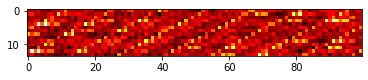

Importance map #0


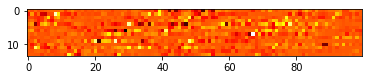

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #1


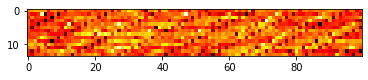

Importance map #1


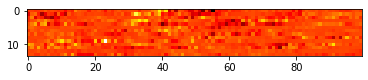

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #2


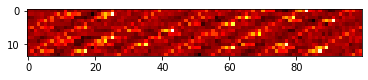

Importance map #2


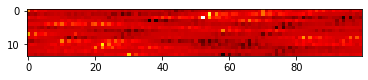

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #3


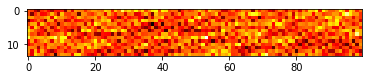

Importance map #3


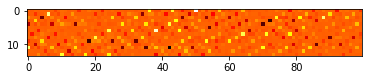

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #4


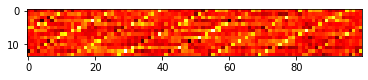

Importance map #4


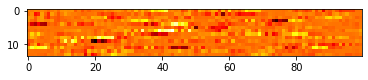

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #5


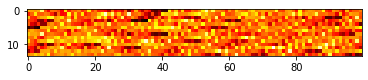

Importance map #5


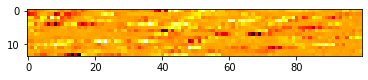

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #6


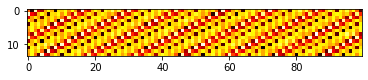

Importance map #6


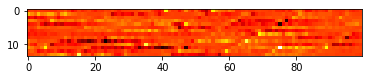

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #7


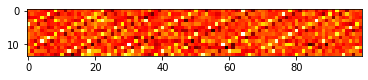

Importance map #7


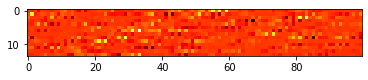

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #8


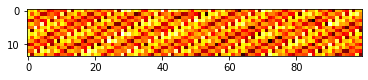

Importance map #8


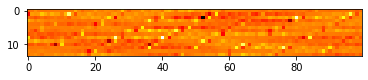

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #9


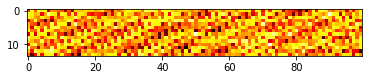

Importance map #9


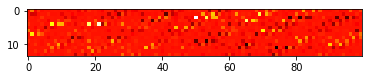

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #10


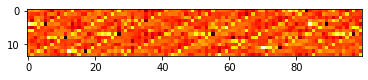

Importance map #10


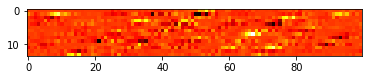

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #11


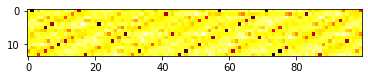

Importance map #11


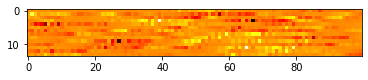

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #12


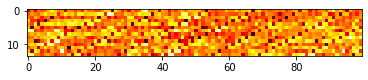

Importance map #12


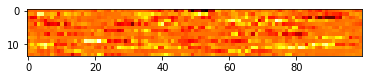

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #13


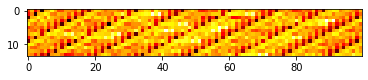

Importance map #13


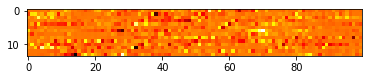

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #14


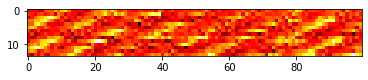

Importance map #14


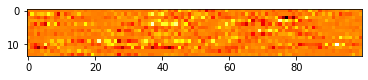

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #15


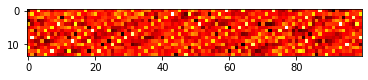

Importance map #15


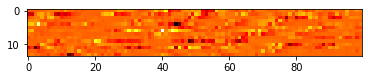

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #16


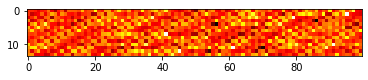

Importance map #16


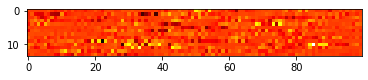

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #17


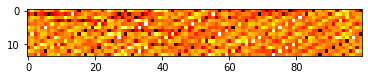

Importance map #17


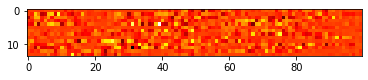

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #18


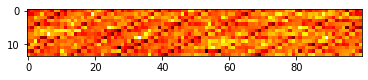

Importance map #18


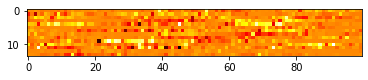

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #19


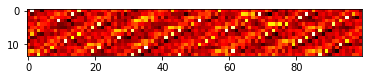

Importance map #19


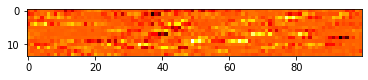

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #20


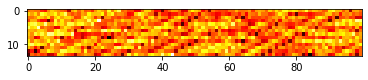

Importance map #20


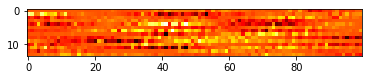

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #21


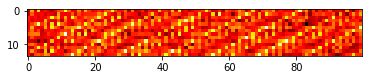

Importance map #21


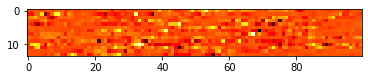

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #22


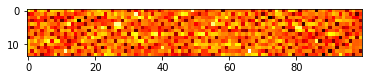

Importance map #22


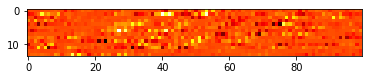

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #23


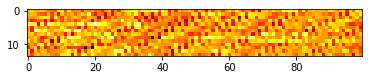

Importance map #23


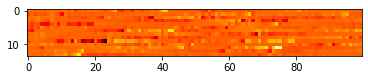

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #24


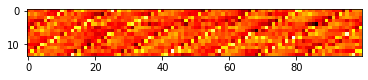

Importance map #24


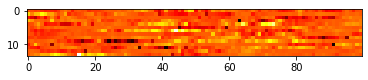

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #25


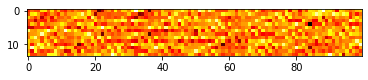

Importance map #25


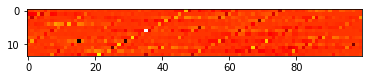

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #26


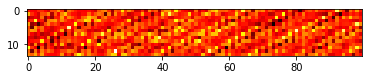

Importance map #26


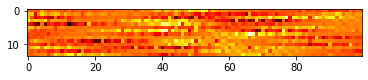

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #27


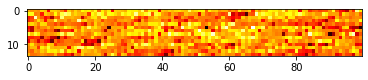

Importance map #27


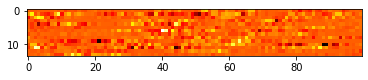

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #28


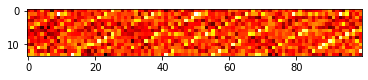

Importance map #28


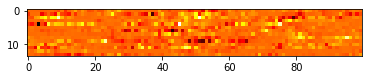

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #29


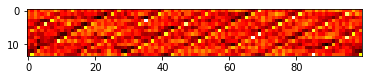

Importance map #29


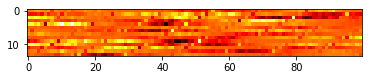

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #30


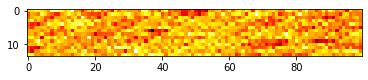

Importance map #30


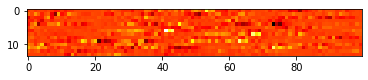

###############
###############
###############



In [179]:
from matplotlib import pyplot as plt

for i in range(0, 31):
    print("Label is #{}".format(Y_test[i]))
    if(preds[i] == Y_test.argmax(axis=-1)[i]):
        print("Correct prediction")
    else:
        print("Wrong prediction")
    print("Test sample #{}".format(i))
    plt.imshow(X_test[i,0,:,:], cmap='hot', interpolation='nearest')
    plt.show()
    print("Importance map #{}".format(i))
    plt.imshow(attributions[i,0,:,:], cmap='hot', interpolation='nearest')
    plt.show()
    print("###############\n###############\n###############\n")

Label is #[0. 1.]
Test sample #0


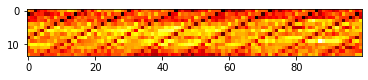

###############
###############
###############

Label is #[0. 1.]
Test sample #1


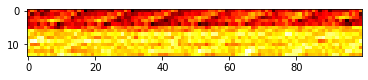

###############
###############
###############

Label is #[0. 1.]
Test sample #2


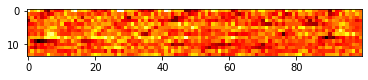

###############
###############
###############

Label is #[0. 1.]
Test sample #3


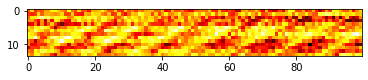

###############
###############
###############

Label is #[0. 1.]
Test sample #4


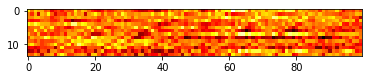

###############
###############
###############

Label is #[1. 0.]
Test sample #5


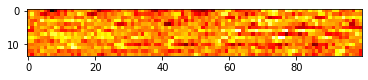

###############
###############
###############

Label is #[0. 1.]
Test sample #6


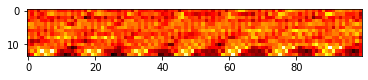

###############
###############
###############

Label is #[1. 0.]
Test sample #7


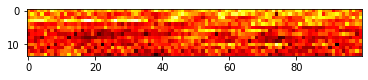

###############
###############
###############

Label is #[0. 1.]
Test sample #8


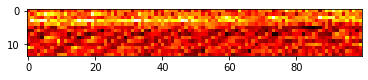

###############
###############
###############

Label is #[1. 0.]
Test sample #9


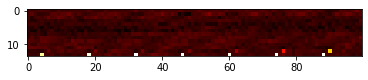

###############
###############
###############

Label is #[1. 0.]
Test sample #10


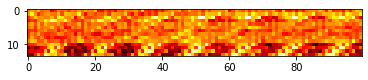

###############
###############
###############

Label is #[0. 1.]
Test sample #11


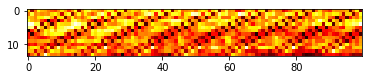

###############
###############
###############

Label is #[0. 1.]
Test sample #12


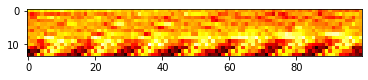

###############
###############
###############

Label is #[1. 0.]
Test sample #13


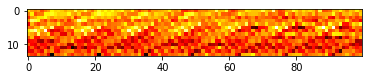

###############
###############
###############

Label is #[1. 0.]
Test sample #14


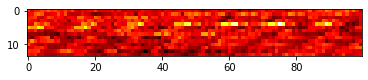

###############
###############
###############

Label is #[1. 0.]
Test sample #15


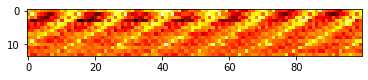

###############
###############
###############

Label is #[0. 1.]
Test sample #16


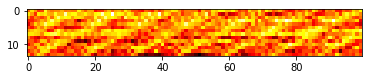

###############
###############
###############

Label is #[1. 0.]
Test sample #17


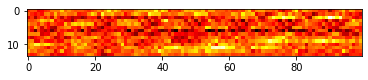

###############
###############
###############

Label is #[1. 0.]
Test sample #18


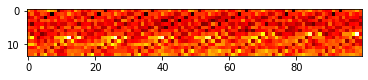

###############
###############
###############

Label is #[0. 1.]
Test sample #19


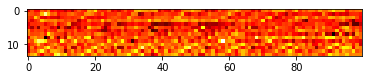

###############
###############
###############

Label is #[1. 0.]
Test sample #20


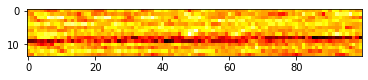

###############
###############
###############

Label is #[1. 0.]
Test sample #21


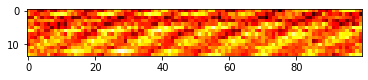

###############
###############
###############

Label is #[0. 1.]
Test sample #22


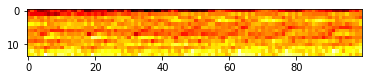

###############
###############
###############

Label is #[1. 0.]
Test sample #23


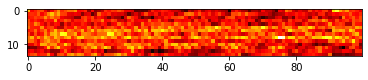

###############
###############
###############

Label is #[1. 0.]
Test sample #24


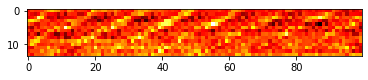

###############
###############
###############

Label is #[0. 1.]
Test sample #25


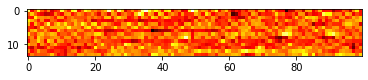

###############
###############
###############

Label is #[0. 1.]
Test sample #26


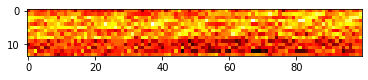

###############
###############
###############

Label is #[0. 1.]
Test sample #27


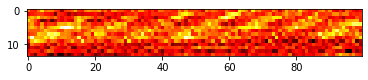

###############
###############
###############

Label is #[1. 0.]
Test sample #28


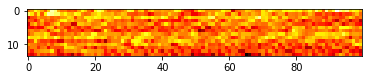

###############
###############
###############

Label is #[1. 0.]
Test sample #29


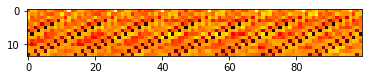

###############
###############
###############



In [14]:
from matplotlib import pyplot as plt

for i in range(0, 30):
    print("Label is #{}".format(y[i]))
    print("Test sample #{}".format(i))
    plt.imshow(X[i,0,:,:], cmap='hot', interpolation='nearest')
    plt.show()
    print("###############\n###############\n###############\n")

In [15]:
from EEGModels import EEGNet
import numpy as np
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import metrics

def get_xp_val(xp):
    if xp == 'F1':
        xp_arr = [2,4,8,16,32]
    elif xp == 'D':
        xp_arr = [1,2,3,4,5]
    elif xp == 'F2':
        xp_arr = [4,8,16,32,64]
    return xp_arr


def get_xp_val_1(xp):
    if xp == 'F1':
        xp_arr = [32,42,52,62]
    elif xp == 'D':
        xp_arr = [5,6,7,8,9]
    elif xp == 'F2':
        xp_arr = [64, 80, 90, 100]
    return xp_arr

archive_name = 'TSC'
classifier_name = 'inception'
max_iterations = 5
output_directory = "."
input_shape = (14, 100)
nb_classes = 2

xps = [ 'F1', 'D', 'F2']
table = []
for xp in xps:

    xp_arr = get_xp_val_1(xp)
    
    print('xp', xp)

    for xp_val in xp_arr:
        print('\txp_val', xp_val)

        kwargs = {xp: xp_val}

        averaging = []
        acc_row = []
        acc_row.append(xp)
        acc_row.append(xp_val)
        print("Params: ",kwargs)
        model  = EEGNet(2, Chans = 14, Samples = 100,
        **kwargs)
        model.compile(loss='categorical_crossentropy', optimizer='adam', 
                      metrics = ['categorical_accuracy'])
        checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1,
                                       save_best_only=True)
        acc_row += get_cv_score(model, checkpointer, X, y, n_epoch = 100, val_split = 0.1)
        print('\t\t\t\t', 'DONE')
        table.append(acc_row)
res = pd.DataFrame(table, columns = ['Metric', 'Metric val', 'Acc_1', 'Acc_2', 'Acc_3','Acc_4', 'Acc_5','Acc_6', 'Acc_7', 'Acc_8','Acc_9', 'Acc_10' 'Acc_mean'])

xp F1
	xp_val 32
Params:  {'F1': 32}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69333, saving model to ./checkpoit.h5
1618/1618 - 5s - loss: 0.7012 - categorical_accuracy: 0.4864 - val_loss: 0.6933 - val_categorical_accuracy: 0.4500
Epoch 2/100

Epoch 00002: val_loss improved from 0.69333 to 0.69041, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6878 - categorical_accuracy: 0.5334 - val_loss: 0.6904 - val_categorical_accuracy: 0.5889
Epoch 3/100

Epoch 00003: val_loss improved from 0.69041 to 0.68910, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6883 - categorical_accuracy: 0.5457 - val_loss: 0.6891 - val_categorical_accuracy: 0.5889
Epoch 4/100

Epoch 00004: val_loss improved from 0.68910 to 0.68734, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6856 - categorical_accuracy: 0.5439 - val_loss: 0.6873 - val_categorical_accuracy: 0.5722
Epoch 5/100

Epoch 00005: val_loss improved from 0.68734 to 

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6392 - categorical_accuracy: 0.6459 - val_loss: 0.6854 - val_categorical_accuracy: 0.5500
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6322 - categorical_accuracy: 0.6391 - val_loss: 0.6845 - val_categorical_accuracy: 0.5556
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6305 - categorical_accuracy: 0.6459 - val_loss: 0.6888 - val_categorical_accuracy: 0.5389
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6364 - categorical_accuracy: 0.6570 - val_loss: 0.6817 - val_categorical_accuracy: 0.5500
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6251 - categorical_accuracy: 0.6539 - val_loss: 0.6913 - val_categorical_accuracy: 0.5222
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6191 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5838 - categorical_accuracy: 0.6947 - val_loss: 0.7132 - val_categorical_accuracy: 0.5222
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5741 - categorical_accuracy: 0.6972 - val_loss: 0.7089 - val_categorical_accuracy: 0.5278
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5767 - categorical_accuracy: 0.6910 - val_loss: 0.7156 - val_categorical_accuracy: 0.5000
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5776 - categorical_accuracy: 0.6934 - val_loss: 0.7105 - val_categorical_accuracy: 0.5167
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5703 - categorical_accuracy: 0.7077 - val_loss: 0.7176 - val_categorical_accuracy: 0.5389
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5663 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6387 - categorical_accuracy: 0.6298 - val_loss: 0.6784 - val_categorical_accuracy: 0.5889
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6452 - categorical_accuracy: 0.6397 - val_loss: 0.6816 - val_categorical_accuracy: 0.5722
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6424 - categorical_accuracy: 0.6267 - val_loss: 0.6821 - val_categorical_accuracy: 0.5778
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6338 - categorical_accuracy: 0.6446 - val_loss: 0.6835 - val_categorical_accuracy: 0.5611
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6332 - categorical_accuracy: 0.6366 - val_loss: 0.6835 - val_categorical_accuracy: 0.5889
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6342 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5958 - categorical_accuracy: 0.6811 - val_loss: 0.6935 - val_categorical_accuracy: 0.5889
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5841 - categorical_accuracy: 0.6885 - val_loss: 0.6969 - val_categorical_accuracy: 0.5944
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5860 - categorical_accuracy: 0.6854 - val_loss: 0.6924 - val_categorical_accuracy: 0.6000
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5923 - categorical_accuracy: 0.6780 - val_loss: 0.7004 - val_categorical_accuracy: 0.5444
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5803 - categorical_accuracy: 0.7002 - val_loss: 0.7031 - val_categorical_accuracy: 0.5778
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5764 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6564 - categorical_accuracy: 0.6119 - val_loss: 0.6952 - val_categorical_accuracy: 0.5111
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6523 - categorical_accuracy: 0.6119 - val_loss: 0.6999 - val_categorical_accuracy: 0.5333
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6582 - categorical_accuracy: 0.5939 - val_loss: 0.6977 - val_categorical_accuracy: 0.5222
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6472 - categorical_accuracy: 0.6273 - val_loss: 0.6994 - val_categorical_accuracy: 0.5333
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6476 - categorical_accuracy: 0.6304 - val_loss: 0.6979 - val_categorical_accuracy: 0.5444
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6521 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6053 - categorical_accuracy: 0.6638 - val_loss: 0.7198 - val_categorical_accuracy: 0.5222
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6046 - categorical_accuracy: 0.6669 - val_loss: 0.7171 - val_categorical_accuracy: 0.5222
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6027 - categorical_accuracy: 0.6755 - val_loss: 0.7139 - val_categorical_accuracy: 0.5278
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6084 - categorical_accuracy: 0.6792 - val_loss: 0.7049 - val_categorical_accuracy: 0.5500
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6037 - categorical_accuracy: 0.6823 - val_loss: 0.7136 - val_categorical_accuracy: 0.5333
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6055 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6545 - categorical_accuracy: 0.6156 - val_loss: 0.6771 - val_categorical_accuracy: 0.5611
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6545 - categorical_accuracy: 0.6088 - val_loss: 0.6756 - val_categorical_accuracy: 0.5833
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6567 - categorical_accuracy: 0.6137 - val_loss: 0.6785 - val_categorical_accuracy: 0.5722
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6503 - categorical_accuracy: 0.6150 - val_loss: 0.6753 - val_categorical_accuracy: 0.5778
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6541 - categorical_accuracy: 0.6156 - val_loss: 0.6782 - val_categorical_accuracy: 0.5611
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6551 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6168 - categorical_accuracy: 0.6557 - val_loss: 0.6851 - val_categorical_accuracy: 0.5389
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6139 - categorical_accuracy: 0.6564 - val_loss: 0.6834 - val_categorical_accuracy: 0.5611
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6123 - categorical_accuracy: 0.6576 - val_loss: 0.6853 - val_categorical_accuracy: 0.5500
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6147 - categorical_accuracy: 0.6607 - val_loss: 0.6907 - val_categorical_accuracy: 0.5389
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6155 - categorical_accuracy: 0.6539 - val_loss: 0.6844 - val_categorical_accuracy: 0.5167
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6065 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6678 - categorical_accuracy: 0.5797 - val_loss: 0.6816 - val_categorical_accuracy: 0.5556
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6674 - categorical_accuracy: 0.6007 - val_loss: 0.6803 - val_categorical_accuracy: 0.5722
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6602 - categorical_accuracy: 0.6044 - val_loss: 0.6847 - val_categorical_accuracy: 0.5611
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6621 - categorical_accuracy: 0.5847 - val_loss: 0.6828 - val_categorical_accuracy: 0.5667
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6607 - categorical_accuracy: 0.6020 - val_loss: 0.6808 - val_categorical_accuracy: 0.5722
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6665 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6265 - categorical_accuracy: 0.6520 - val_loss: 0.6960 - val_categorical_accuracy: 0.5722
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6243 - categorical_accuracy: 0.6613 - val_loss: 0.6924 - val_categorical_accuracy: 0.5556
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6208 - categorical_accuracy: 0.6459 - val_loss: 0.6913 - val_categorical_accuracy: 0.5389
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6247 - categorical_accuracy: 0.6527 - val_loss: 0.6933 - val_categorical_accuracy: 0.5444
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6229 - categorical_accuracy: 0.6656 - val_loss: 0.6999 - val_categorical_accuracy: 0.5833
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6241 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5710 - categorical_accuracy: 0.6965 - val_loss: 0.7133 - val_categorical_accuracy: 0.5556
200/200 - 0s - loss: 0.6700 - categorical_accuracy: 0.5950
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6724 - categorical_accuracy: 0.5785 - val_loss: 0.6689 - val_categorical_accuracy: 0.5778
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6776 - categorical_accuracy: 0.5692 - val_loss: 0.6700 - val_categorical_accuracy: 0.5667
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6807 - categorical_accuracy: 0.5661 - val_loss: 0.6722 - val_categorical_accuracy: 0.5889
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6701 - categorical_accuracy: 0.5828 - val_loss: 0.6784 - val_categorical_accuracy: 0.54

Epoch 45/100

Epoch 00045: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6411 - categorical_accuracy: 0.6366 - val_loss: 0.6956 - val_categorical_accuracy: 0.5056
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6349 - categorical_accuracy: 0.6347 - val_loss: 0.6965 - val_categorical_accuracy: 0.4889
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6389 - categorical_accuracy: 0.6409 - val_loss: 0.6965 - val_categorical_accuracy: 0.4778
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6328 - categorical_accuracy: 0.6403 - val_loss: 0.6942 - val_categorical_accuracy: 0.5278
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6307 - categorical_accuracy: 0.6403 - val_loss: 0.6921 - val_categorical_accuracy: 0.5167
Epoch 50/100

Epoch 00050: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6275 - cat

Epoch 91/100

Epoch 00091: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5989 - categorical_accuracy: 0.6916 - val_loss: 0.7181 - val_categorical_accuracy: 0.4944
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5969 - categorical_accuracy: 0.6675 - val_loss: 0.7123 - val_categorical_accuracy: 0.5556
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5858 - categorical_accuracy: 0.6916 - val_loss: 0.7117 - val_categorical_accuracy: 0.5167
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5867 - categorical_accuracy: 0.6922 - val_loss: 0.7086 - val_categorical_accuracy: 0.4833
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5906 - categorical_accuracy: 0.6755 - val_loss: 0.7171 - val_categorical_accuracy: 0.5389
Epoch 96/100

Epoch 00096: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5927 - cat

Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6366 - categorical_accuracy: 0.6378 - val_loss: 0.6925 - val_categorical_accuracy: 0.5278
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6471 - categorical_accuracy: 0.6088 - val_loss: 0.6988 - val_categorical_accuracy: 0.5111
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6311 - categorical_accuracy: 0.6304 - val_loss: 0.6949 - val_categorical_accuracy: 0.5111
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6362 - categorical_accuracy: 0.6378 - val_loss: 0.6953 - val_categorical_accuracy: 0.5167
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6399 - categorical_accuracy: 0.6384 - val_loss: 0.6967 - val_categorical_accuracy: 0.5167
Epoch 41/100

Epoch 00041: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6303 - cat

Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6011 - categorical_accuracy: 0.6749 - val_loss: 0.7095 - val_categorical_accuracy: 0.5167
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5885 - categorical_accuracy: 0.6984 - val_loss: 0.7078 - val_categorical_accuracy: 0.5611
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5964 - categorical_accuracy: 0.6749 - val_loss: 0.7083 - val_categorical_accuracy: 0.5389
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6030 - categorical_accuracy: 0.6718 - val_loss: 0.7051 - val_categorical_accuracy: 0.5722
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5985 - categorical_accuracy: 0.6669 - val_loss: 0.7078 - val_categorical_accuracy: 0.5611
Epoch 87/100

Epoch 00087: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5739 - cat

Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6529 - categorical_accuracy: 0.6051 - val_loss: 0.6989 - val_categorical_accuracy: 0.5000
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6454 - categorical_accuracy: 0.6131 - val_loss: 0.7018 - val_categorical_accuracy: 0.5167
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6514 - categorical_accuracy: 0.6187 - val_loss: 0.7037 - val_categorical_accuracy: 0.5056
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6486 - categorical_accuracy: 0.6286 - val_loss: 0.6982 - val_categorical_accuracy: 0.5111
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6496 - categorical_accuracy: 0.6391 - val_loss: 0.7004 - val_categorical_accuracy: 0.4889
Epoch 32/100

Epoch 00032: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6488 - cat

Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6147 - categorical_accuracy: 0.6607 - val_loss: 0.7208 - val_categorical_accuracy: 0.5167
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6184 - categorical_accuracy: 0.6582 - val_loss: 0.7223 - val_categorical_accuracy: 0.5000
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6070 - categorical_accuracy: 0.6718 - val_loss: 0.7225 - val_categorical_accuracy: 0.5000
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.5998 - categorical_accuracy: 0.6860 - val_loss: 0.7283 - val_categorical_accuracy: 0.5111
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6130 - categorical_accuracy: 0.6595 - val_loss: 0.7359 - val_categorical_accuracy: 0.5222
Epoch 78/100

Epoch 00078: val_loss did not improve from 0.66859
1618/1618 - 0s - loss: 0.6037 - cat

Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6551 - categorical_accuracy: 0.6133 - val_loss: 0.6891 - val_categorical_accuracy: 0.5278
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6622 - categorical_accuracy: 0.5862 - val_loss: 0.6931 - val_categorical_accuracy: 0.5444
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6613 - categorical_accuracy: 0.6028 - val_loss: 0.6926 - val_categorical_accuracy: 0.5389
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6541 - categorical_accuracy: 0.6146 - val_loss: 0.6921 - val_categorical_accuracy: 0.5389
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6610 - categorical_accuracy: 0.6090 - val_loss: 0.6910 - val_categorical_accuracy: 0.5444
Epoch 23/100

Epoch 00023: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6495 - cat

Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6173 - categorical_accuracy: 0.6720 - val_loss: 0.7007 - val_categorical_accuracy: 0.5333
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6222 - categorical_accuracy: 0.6572 - val_loss: 0.6868 - val_categorical_accuracy: 0.5333
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6100 - categorical_accuracy: 0.6665 - val_loss: 0.6899 - val_categorical_accuracy: 0.5333
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6034 - categorical_accuracy: 0.6739 - val_loss: 0.6906 - val_categorical_accuracy: 0.5333
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6068 - categorical_accuracy: 0.6751 - val_loss: 0.7029 - val_categorical_accuracy: 0.5389
Epoch 69/100

Epoch 00069: val_loss did not improve from 0.66859
1619/1619 - 0s - loss: 0.6131 - cat

Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6647 - categorical_accuracy: 0.5886 - val_loss: 0.6739 - val_categorical_accuracy: 0.5889
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6647 - categorical_accuracy: 0.5973 - val_loss: 0.6691 - val_categorical_accuracy: 0.5889
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6641 - categorical_accuracy: 0.5948 - val_loss: 0.6725 - val_categorical_accuracy: 0.5611
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6600 - categorical_accuracy: 0.5942 - val_loss: 0.6675 - val_categorical_accuracy: 0.5833
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6607 - categorical_accuracy: 0.5930 - val_loss: 0.6689 - val_categorical_accuracy: 0.5722
Epoch 14/100

Epoch 00014: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6573 - cate

Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6243 - categorical_accuracy: 0.6492 - val_loss: 0.6917 - val_categorical_accuracy: 0.5389
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6237 - categorical_accuracy: 0.6492 - val_loss: 0.6963 - val_categorical_accuracy: 0.5222
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6158 - categorical_accuracy: 0.6683 - val_loss: 0.7032 - val_categorical_accuracy: 0.5444
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6178 - categorical_accuracy: 0.6541 - val_loss: 0.6726 - val_categorical_accuracy: 0.5889
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6227 - categorical_accuracy: 0.6652 - val_loss: 0.6856 - val_categorical_accuracy: 0.5611
Epoch 60/100

Epoch 00060: val_loss did not improve from 0.66520
1619/1619 - 0s - loss: 0.6171 - cat

199/199 - 0s - loss: 0.7035 - categorical_accuracy: 0.5477
				 DONE
	xp_val 42
Params:  {'F1': 42}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69234, saving model to ./checkpoit.h5
1618/1618 - 6s - loss: 0.7166 - categorical_accuracy: 0.4827 - val_loss: 0.6923 - val_categorical_accuracy: 0.6000
Epoch 2/100

Epoch 00002: val_loss improved from 0.69234 to 0.69105, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6933 - categorical_accuracy: 0.5117 - val_loss: 0.6911 - val_categorical_accuracy: 0.5667
Epoch 3/100

Epoch 00003: val_loss improved from 0.69105 to 0.68994, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6909 - categorical_accuracy: 0.5179 - val_loss: 0.6899 - val_categorical_accuracy: 0.5611
Epoch 4/100

Epoch 00004: val_loss improved from 0.68994 to 0.68792, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6854 - categorical_accuracy: 0.5389 - val_loss: 0.6879 - val_categorical_accuracy: 0.56

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6383 - categorical_accuracy: 0.6452 - val_loss: 0.7009 - val_categorical_accuracy: 0.5500
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6360 - categorical_accuracy: 0.6459 - val_loss: 0.6839 - val_categorical_accuracy: 0.5722
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6369 - categorical_accuracy: 0.6360 - val_loss: 0.7015 - val_categorical_accuracy: 0.5278
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6323 - categorical_accuracy: 0.6465 - val_loss: 0.6831 - val_categorical_accuracy: 0.5722
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6327 - categorical_accuracy: 0.6409 - val_loss: 0.6908 - val_categorical_accuracy: 0.5389
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6277 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5683 - categorical_accuracy: 0.7015 - val_loss: 0.7197 - val_categorical_accuracy: 0.5389
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5687 - categorical_accuracy: 0.7083 - val_loss: 0.7008 - val_categorical_accuracy: 0.5667
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5676 - categorical_accuracy: 0.7009 - val_loss: 0.7208 - val_categorical_accuracy: 0.5222
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5671 - categorical_accuracy: 0.7064 - val_loss: 0.7127 - val_categorical_accuracy: 0.5722
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5732 - categorical_accuracy: 0.6941 - val_loss: 0.7069 - val_categorical_accuracy: 0.5500
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5623 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6514 - categorical_accuracy: 0.6248 - val_loss: 0.6832 - val_categorical_accuracy: 0.5389
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6445 - categorical_accuracy: 0.6316 - val_loss: 0.6797 - val_categorical_accuracy: 0.5722
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6500 - categorical_accuracy: 0.6131 - val_loss: 0.6793 - val_categorical_accuracy: 0.5444
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6407 - categorical_accuracy: 0.6230 - val_loss: 0.6833 - val_categorical_accuracy: 0.5778
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6382 - categorical_accuracy: 0.6372 - val_loss: 0.6914 - val_categorical_accuracy: 0.5500
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6429 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6004 - categorical_accuracy: 0.6867 - val_loss: 0.7248 - val_categorical_accuracy: 0.5444
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5713 - categorical_accuracy: 0.7021 - val_loss: 0.7018 - val_categorical_accuracy: 0.5667
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5789 - categorical_accuracy: 0.6799 - val_loss: 0.7120 - val_categorical_accuracy: 0.5944
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5847 - categorical_accuracy: 0.6879 - val_loss: 0.7167 - val_categorical_accuracy: 0.5389
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5809 - categorical_accuracy: 0.6953 - val_loss: 0.7145 - val_categorical_accuracy: 0.5333
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5661 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6590 - categorical_accuracy: 0.6137 - val_loss: 0.6923 - val_categorical_accuracy: 0.5444
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6514 - categorical_accuracy: 0.6063 - val_loss: 0.7006 - val_categorical_accuracy: 0.5056
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6504 - categorical_accuracy: 0.6150 - val_loss: 0.7206 - val_categorical_accuracy: 0.4889
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6524 - categorical_accuracy: 0.6075 - val_loss: 0.6969 - val_categorical_accuracy: 0.5167
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6514 - categorical_accuracy: 0.6156 - val_loss: 0.7016 - val_categorical_accuracy: 0.5056
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6582 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6093 - categorical_accuracy: 0.6663 - val_loss: 0.6995 - val_categorical_accuracy: 0.5111
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5993 - categorical_accuracy: 0.6817 - val_loss: 0.7089 - val_categorical_accuracy: 0.5000
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5994 - categorical_accuracy: 0.6860 - val_loss: 0.7050 - val_categorical_accuracy: 0.5611
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6006 - categorical_accuracy: 0.6718 - val_loss: 0.7042 - val_categorical_accuracy: 0.5278
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.6050 - categorical_accuracy: 0.6780 - val_loss: 0.7022 - val_categorical_accuracy: 0.5611
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67685
1618/1618 - 0s - loss: 0.5923 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6644 - categorical_accuracy: 0.5927 - val_loss: 0.6863 - val_categorical_accuracy: 0.5444
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6601 - categorical_accuracy: 0.6106 - val_loss: 0.6851 - val_categorical_accuracy: 0.5500
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6638 - categorical_accuracy: 0.5822 - val_loss: 0.6870 - val_categorical_accuracy: 0.5556
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6579 - categorical_accuracy: 0.5995 - val_loss: 0.6863 - val_categorical_accuracy: 0.5167
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6625 - categorical_accuracy: 0.6007 - val_loss: 0.6827 - val_categorical_accuracy: 0.5833
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6584 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6064 - categorical_accuracy: 0.6675 - val_loss: 0.6917 - val_categorical_accuracy: 0.5222
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6104 - categorical_accuracy: 0.6619 - val_loss: 0.6919 - val_categorical_accuracy: 0.5056
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6069 - categorical_accuracy: 0.6724 - val_loss: 0.6977 - val_categorical_accuracy: 0.5556
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6131 - categorical_accuracy: 0.6625 - val_loss: 0.7039 - val_categorical_accuracy: 0.5556
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6119 - categorical_accuracy: 0.6632 - val_loss: 0.6941 - val_categorical_accuracy: 0.5333
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5968 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6736 - categorical_accuracy: 0.5760 - val_loss: 0.6838 - val_categorical_accuracy: 0.5944
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6681 - categorical_accuracy: 0.5803 - val_loss: 0.6860 - val_categorical_accuracy: 0.5556
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6631 - categorical_accuracy: 0.5946 - val_loss: 0.6870 - val_categorical_accuracy: 0.5667
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6629 - categorical_accuracy: 0.5841 - val_loss: 0.6873 - val_categorical_accuracy: 0.5556
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6626 - categorical_accuracy: 0.5946 - val_loss: 0.6850 - val_categorical_accuracy: 0.5333
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6624 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6396 - categorical_accuracy: 0.6248 - val_loss: 0.6893 - val_categorical_accuracy: 0.5833
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6275 - categorical_accuracy: 0.6459 - val_loss: 0.7027 - val_categorical_accuracy: 0.5056
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6170 - categorical_accuracy: 0.6625 - val_loss: 0.6906 - val_categorical_accuracy: 0.5611
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6271 - categorical_accuracy: 0.6415 - val_loss: 0.6928 - val_categorical_accuracy: 0.5556
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6290 - categorical_accuracy: 0.6508 - val_loss: 0.6980 - val_categorical_accuracy: 0.5556
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6212 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5595 - categorical_accuracy: 0.7058 - val_loss: 0.7353 - val_categorical_accuracy: 0.4889
200/200 - 0s - loss: 0.6749 - categorical_accuracy: 0.5450
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6759 - categorical_accuracy: 0.5791 - val_loss: 0.6757 - val_categorical_accuracy: 0.5611
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6752 - categorical_accuracy: 0.5742 - val_loss: 0.6795 - val_categorical_accuracy: 0.5444
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6755 - categorical_accuracy: 0.5865 - val_loss: 0.6844 - val_categorical_accuracy: 0.5556
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6776 - categorical_accuracy: 0.5735 - val_loss: 0.6827 - val_categorical_accuracy: 0.53

Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6343 - categorical_accuracy: 0.6205 - val_loss: 0.7000 - val_categorical_accuracy: 0.5000
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6372 - categorical_accuracy: 0.6483 - val_loss: 0.6981 - val_categorical_accuracy: 0.5000
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6275 - categorical_accuracy: 0.6440 - val_loss: 0.6936 - val_categorical_accuracy: 0.5278
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6301 - categorical_accuracy: 0.6267 - val_loss: 0.7028 - val_categorical_accuracy: 0.5278
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6308 - categorical_accuracy: 0.6514 - val_loss: 0.7007 - val_categorical_accuracy: 0.5000
Epoch 50/100

Epoch 00050: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6262 - cat

Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5648 - categorical_accuracy: 0.7138 - val_loss: 0.7195 - val_categorical_accuracy: 0.4833
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5656 - categorical_accuracy: 0.7120 - val_loss: 0.7162 - val_categorical_accuracy: 0.5111
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5752 - categorical_accuracy: 0.6984 - val_loss: 0.7110 - val_categorical_accuracy: 0.5056
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5659 - categorical_accuracy: 0.7194 - val_loss: 0.7206 - val_categorical_accuracy: 0.5167
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5565 - categorical_accuracy: 0.7250 - val_loss: 0.7183 - val_categorical_accuracy: 0.5111
Epoch 96/100

Epoch 00096: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5620 - cat

Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6387 - categorical_accuracy: 0.6347 - val_loss: 0.6883 - val_categorical_accuracy: 0.5500
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6367 - categorical_accuracy: 0.6341 - val_loss: 0.6917 - val_categorical_accuracy: 0.5444
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6415 - categorical_accuracy: 0.6378 - val_loss: 0.6875 - val_categorical_accuracy: 0.5222
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6334 - categorical_accuracy: 0.6514 - val_loss: 0.6914 - val_categorical_accuracy: 0.5167
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6293 - categorical_accuracy: 0.6551 - val_loss: 0.6909 - val_categorical_accuracy: 0.5278
Epoch 41/100

Epoch 00041: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6310 - cat

Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5808 - categorical_accuracy: 0.7021 - val_loss: 0.7084 - val_categorical_accuracy: 0.4778
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5814 - categorical_accuracy: 0.7033 - val_loss: 0.7149 - val_categorical_accuracy: 0.5389
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5780 - categorical_accuracy: 0.6984 - val_loss: 0.7028 - val_categorical_accuracy: 0.4944
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5739 - categorical_accuracy: 0.7083 - val_loss: 0.6928 - val_categorical_accuracy: 0.5111
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5805 - categorical_accuracy: 0.6916 - val_loss: 0.7121 - val_categorical_accuracy: 0.5611
Epoch 87/100

Epoch 00087: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5681 - cat

Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6546 - categorical_accuracy: 0.6082 - val_loss: 0.7002 - val_categorical_accuracy: 0.5167
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6524 - categorical_accuracy: 0.6125 - val_loss: 0.6992 - val_categorical_accuracy: 0.5000
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6440 - categorical_accuracy: 0.6137 - val_loss: 0.7032 - val_categorical_accuracy: 0.5056
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6528 - categorical_accuracy: 0.6131 - val_loss: 0.6909 - val_categorical_accuracy: 0.5056
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6601 - categorical_accuracy: 0.5871 - val_loss: 0.6908 - val_categorical_accuracy: 0.5333
Epoch 32/100

Epoch 00032: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6535 - cat

Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6012 - categorical_accuracy: 0.6718 - val_loss: 0.7015 - val_categorical_accuracy: 0.5611
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6121 - categorical_accuracy: 0.6737 - val_loss: 0.6971 - val_categorical_accuracy: 0.5611
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6076 - categorical_accuracy: 0.6681 - val_loss: 0.7127 - val_categorical_accuracy: 0.5222
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.6133 - categorical_accuracy: 0.6570 - val_loss: 0.7179 - val_categorical_accuracy: 0.5667
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5920 - categorical_accuracy: 0.6885 - val_loss: 0.7219 - val_categorical_accuracy: 0.5667
Epoch 78/100

Epoch 00078: val_loss did not improve from 0.67257
1618/1618 - 0s - loss: 0.5959 - cat

Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6571 - categorical_accuracy: 0.6035 - val_loss: 0.6917 - val_categorical_accuracy: 0.5167
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6525 - categorical_accuracy: 0.6078 - val_loss: 0.6924 - val_categorical_accuracy: 0.5333
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6556 - categorical_accuracy: 0.6115 - val_loss: 0.6944 - val_categorical_accuracy: 0.5778
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6544 - categorical_accuracy: 0.5998 - val_loss: 0.6868 - val_categorical_accuracy: 0.5333
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6471 - categorical_accuracy: 0.6238 - val_loss: 0.6868 - val_categorical_accuracy: 0.5500
Epoch 23/100

Epoch 00023: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6509 - cat

Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6183 - categorical_accuracy: 0.6590 - val_loss: 0.6931 - val_categorical_accuracy: 0.5778
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6110 - categorical_accuracy: 0.6677 - val_loss: 0.6855 - val_categorical_accuracy: 0.5944
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6101 - categorical_accuracy: 0.6683 - val_loss: 0.6865 - val_categorical_accuracy: 0.5944
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6058 - categorical_accuracy: 0.6615 - val_loss: 0.6831 - val_categorical_accuracy: 0.6000
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6063 - categorical_accuracy: 0.6584 - val_loss: 0.7188 - val_categorical_accuracy: 0.5389
Epoch 69/100

Epoch 00069: val_loss did not improve from 0.67257
1619/1619 - 0s - loss: 0.6168 - cat

Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6623 - categorical_accuracy: 0.5973 - val_loss: 0.6834 - val_categorical_accuracy: 0.6000
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6646 - categorical_accuracy: 0.6004 - val_loss: 0.6814 - val_categorical_accuracy: 0.5778
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6642 - categorical_accuracy: 0.5936 - val_loss: 0.6879 - val_categorical_accuracy: 0.5556
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6585 - categorical_accuracy: 0.6115 - val_loss: 0.6891 - val_categorical_accuracy: 0.5722
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6641 - categorical_accuracy: 0.5769 - val_loss: 0.6888 - val_categorical_accuracy: 0.5722
Epoch 14/100

Epoch 00014: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6616 - cate

Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6192 - categorical_accuracy: 0.6504 - val_loss: 0.6816 - val_categorical_accuracy: 0.6222
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6143 - categorical_accuracy: 0.6640 - val_loss: 0.7093 - val_categorical_accuracy: 0.5778
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6140 - categorical_accuracy: 0.6621 - val_loss: 0.6914 - val_categorical_accuracy: 0.5778
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6150 - categorical_accuracy: 0.6640 - val_loss: 0.7027 - val_categorical_accuracy: 0.6000
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6159 - categorical_accuracy: 0.6498 - val_loss: 0.6969 - val_categorical_accuracy: 0.5889
Epoch 60/100

Epoch 00060: val_loss did not improve from 0.66946
1619/1619 - 0s - loss: 0.6013 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.66279
1619/1619 - 0s - loss: 0.5685 - categorical_accuracy: 0.7153 - val_loss: 0.6808 - val_categorical_accuracy: 0.5944
199/199 - 0s - loss: 0.7355 - categorical_accuracy: 0.5226
				 DONE
	xp_val 52
Params:  {'F1': 52}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69290, saving model to ./checkpoit.h5
1618/1618 - 6s - loss: 0.6978 - categorical_accuracy: 0.5087 - val_loss: 0.6929 - val_categorical_accuracy: 0.5056
Epoch 2/100

Epoch 00002: val_loss improved from 0.69290 to 0.69132, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6936 - categorical_accuracy: 0.5117 - val_loss: 0.6913 - val_categorical_accuracy: 0.5611
Epoch 3/100

Epoch 00003: val_loss improved from 0.69132 to 0.68984, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6858 - categorical_accuracy: 0.5346 - val_loss: 0.6898 - val_categorical_accuracy: 0.5722
Epoch 4/100

Epoch 00004: val_l

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6255 - categorical_accuracy: 0.6496 - val_loss: 0.6918 - val_categorical_accuracy: 0.5556
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6220 - categorical_accuracy: 0.6545 - val_loss: 0.6926 - val_categorical_accuracy: 0.5444
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6237 - categorical_accuracy: 0.6601 - val_loss: 0.6982 - val_categorical_accuracy: 0.5556
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6229 - categorical_accuracy: 0.6644 - val_loss: 0.6959 - val_categorical_accuracy: 0.5333
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.6216 - categorical_accuracy: 0.6687 - val_loss: 0.6837 - val_categorical_accuracy: 0.5667
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6153 - cat

Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.5532 - categorical_accuracy: 0.7225 - val_loss: 0.7218 - val_categorical_accuracy: 0.5444
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5511 - categorical_accuracy: 0.7219 - val_loss: 0.7228 - val_categorical_accuracy: 0.5222
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.5600 - categorical_accuracy: 0.7256 - val_loss: 0.7127 - val_categorical_accuracy: 0.5000
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5514 - categorical_accuracy: 0.7274 - val_loss: 0.7263 - val_categorical_accuracy: 0.5333
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.5464 - categorical_accuracy: 0.7250 - val_loss: 0.7364 - val_categorical_accuracy: 0.5111
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.5446 - cat

Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.6407 - categorical_accuracy: 0.6354 - val_loss: 0.6888 - val_categorical_accuracy: 0.5722
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6284 - categorical_accuracy: 0.6477 - val_loss: 0.6871 - val_categorical_accuracy: 0.5833
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.6434 - categorical_accuracy: 0.6310 - val_loss: 0.7011 - val_categorical_accuracy: 0.5389
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.6348 - categorical_accuracy: 0.6446 - val_loss: 0.6892 - val_categorical_accuracy: 0.5667
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.6260 - categorical_accuracy: 0.6496 - val_loss: 0.7005 - val_categorical_accuracy: 0.5333
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6373 - cat

Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.5734 - categorical_accuracy: 0.6941 - val_loss: 0.7411 - val_categorical_accuracy: 0.5000
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5733 - categorical_accuracy: 0.6978 - val_loss: 0.7237 - val_categorical_accuracy: 0.5278
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5692 - categorical_accuracy: 0.7132 - val_loss: 0.7181 - val_categorical_accuracy: 0.5333
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5600 - categorical_accuracy: 0.7225 - val_loss: 0.7158 - val_categorical_accuracy: 0.5611
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5721 - categorical_accuracy: 0.7138 - val_loss: 0.7560 - val_categorical_accuracy: 0.5222
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5565 - cat

Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6462 - categorical_accuracy: 0.6224 - val_loss: 0.6881 - val_categorical_accuracy: 0.5389
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.6404 - categorical_accuracy: 0.6384 - val_loss: 0.6907 - val_categorical_accuracy: 0.5500
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6464 - categorical_accuracy: 0.6205 - val_loss: 0.6935 - val_categorical_accuracy: 0.5833
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.6478 - categorical_accuracy: 0.6335 - val_loss: 0.6906 - val_categorical_accuracy: 0.5611
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.6377 - categorical_accuracy: 0.6267 - val_loss: 0.6920 - val_categorical_accuracy: 0.5278
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.6409 - cat

Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5765 - categorical_accuracy: 0.7077 - val_loss: 0.7297 - val_categorical_accuracy: 0.5167
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5829 - categorical_accuracy: 0.7138 - val_loss: 0.7266 - val_categorical_accuracy: 0.5111
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67284
1618/1618 - 0s - loss: 0.5793 - categorical_accuracy: 0.6984 - val_loss: 0.7189 - val_categorical_accuracy: 0.5000
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5761 - categorical_accuracy: 0.7200 - val_loss: 0.7150 - val_categorical_accuracy: 0.5389
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5792 - categorical_accuracy: 0.7002 - val_loss: 0.7471 - val_categorical_accuracy: 0.5111
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67284
1618/1618 - 1s - loss: 0.5918 - cat

Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67222
1618/1618 - 1s - loss: 0.6565 - categorical_accuracy: 0.6100 - val_loss: 0.6748 - val_categorical_accuracy: 0.5889
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67222
1618/1618 - 1s - loss: 0.6582 - categorical_accuracy: 0.5970 - val_loss: 0.6839 - val_categorical_accuracy: 0.5778
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67222
1618/1618 - 0s - loss: 0.6571 - categorical_accuracy: 0.5964 - val_loss: 0.6804 - val_categorical_accuracy: 0.6000
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67222
1618/1618 - 0s - loss: 0.6524 - categorical_accuracy: 0.6162 - val_loss: 0.6797 - val_categorical_accuracy: 0.5778
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67222
1618/1618 - 0s - loss: 0.6536 - categorical_accuracy: 0.6119 - val_loss: 0.6816 - val_categorical_accuracy: 0.5611
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67222
1618/1618 - 1s - loss: 0.6555 - cat

Epoch 62/100

Epoch 00062: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5897 - categorical_accuracy: 0.6879 - val_loss: 0.6989 - val_categorical_accuracy: 0.5389
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5874 - categorical_accuracy: 0.6959 - val_loss: 0.6945 - val_categorical_accuracy: 0.5389
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5944 - categorical_accuracy: 0.6848 - val_loss: 0.7014 - val_categorical_accuracy: 0.5500
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6039 - categorical_accuracy: 0.6706 - val_loss: 0.6952 - val_categorical_accuracy: 0.5667
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5930 - categorical_accuracy: 0.7002 - val_loss: 0.6997 - val_categorical_accuracy: 0.5333
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5873 - cat

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6479 - categorical_accuracy: 0.6187 - val_loss: 0.6869 - val_categorical_accuracy: 0.5722
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6471 - categorical_accuracy: 0.6310 - val_loss: 0.6948 - val_categorical_accuracy: 0.5278
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6485 - categorical_accuracy: 0.6150 - val_loss: 0.6915 - val_categorical_accuracy: 0.5444
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6479 - categorical_accuracy: 0.6211 - val_loss: 0.6940 - val_categorical_accuracy: 0.5778
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.6488 - categorical_accuracy: 0.6051 - val_loss: 0.6876 - val_categorical_accuracy: 0.5778
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6400 - catego

Epoch 53/100

Epoch 00053: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5912 - categorical_accuracy: 0.6860 - val_loss: 0.7147 - val_categorical_accuracy: 0.5556
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5998 - categorical_accuracy: 0.6941 - val_loss: 0.7034 - val_categorical_accuracy: 0.5611
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5822 - categorical_accuracy: 0.7052 - val_loss: 0.6969 - val_categorical_accuracy: 0.5889
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5879 - categorical_accuracy: 0.7046 - val_loss: 0.6935 - val_categorical_accuracy: 0.5944
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.6018 - categorical_accuracy: 0.6693 - val_loss: 0.6973 - val_categorical_accuracy: 0.6111
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5944 - cat

Epoch 99/100

Epoch 00099: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5259 - categorical_accuracy: 0.7441 - val_loss: 0.7385 - val_categorical_accuracy: 0.5667
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5280 - categorical_accuracy: 0.7324 - val_loss: 0.7330 - val_categorical_accuracy: 0.5778
200/200 - 0s - loss: 0.6253 - categorical_accuracy: 0.6500
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6664 - categorical_accuracy: 0.5977 - val_loss: 0.6798 - val_categorical_accuracy: 0.5611
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.6613 - categorical_accuracy: 0.5983 - val_loss: 0.6786 - val_categorical_accuracy: 0.5667
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6491 - categorical_accuracy: 0.6267 - val_loss: 0.6783 - val_categorical_accuracy: 0.5

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6066 - categorical_accuracy: 0.6891 - val_loss: 0.7218 - val_categorical_accuracy: 0.5000
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6048 - categorical_accuracy: 0.6867 - val_loss: 0.7096 - val_categorical_accuracy: 0.5444
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6116 - categorical_accuracy: 0.6774 - val_loss: 0.7154 - val_categorical_accuracy: 0.5278
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6071 - categorical_accuracy: 0.6768 - val_loss: 0.7185 - val_categorical_accuracy: 0.5556
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6018 - categorical_accuracy: 0.6625 - val_loss: 0.7126 - val_categorical_accuracy: 0.5444
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6126 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5416 - categorical_accuracy: 0.7287 - val_loss: 0.7367 - val_categorical_accuracy: 0.5667
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5498 - categorical_accuracy: 0.7169 - val_loss: 0.7389 - val_categorical_accuracy: 0.5389
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5535 - categorical_accuracy: 0.7009 - val_loss: 0.7275 - val_categorical_accuracy: 0.5278
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5479 - categorical_accuracy: 0.7274 - val_loss: 0.7368 - val_categorical_accuracy: 0.5278
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5518 - categorical_accuracy: 0.7151 - val_loss: 0.7282 - val_categorical_accuracy: 0.5667
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5470 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6116 - categorical_accuracy: 0.6823 - val_loss: 0.6987 - val_categorical_accuracy: 0.5111
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6062 - categorical_accuracy: 0.6644 - val_loss: 0.7031 - val_categorical_accuracy: 0.5278
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6043 - categorical_accuracy: 0.6718 - val_loss: 0.7011 - val_categorical_accuracy: 0.5722
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6048 - categorical_accuracy: 0.6904 - val_loss: 0.6988 - val_categorical_accuracy: 0.5556
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.6015 - categorical_accuracy: 0.6823 - val_loss: 0.7118 - val_categorical_accuracy: 0.5500
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.6087 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5504 - categorical_accuracy: 0.7132 - val_loss: 0.7190 - val_categorical_accuracy: 0.5444
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5342 - categorical_accuracy: 0.7182 - val_loss: 0.7266 - val_categorical_accuracy: 0.5222
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5580 - categorical_accuracy: 0.7169 - val_loss: 0.7246 - val_categorical_accuracy: 0.5222
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5404 - categorical_accuracy: 0.7305 - val_loss: 0.7350 - val_categorical_accuracy: 0.5333
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5562 - categorical_accuracy: 0.7206 - val_loss: 0.7158 - val_categorical_accuracy: 0.5333
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5360 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.6253 - categorical_accuracy: 0.6514 - val_loss: 0.7067 - val_categorical_accuracy: 0.5500
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6287 - categorical_accuracy: 0.6459 - val_loss: 0.7190 - val_categorical_accuracy: 0.5722
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6316 - categorical_accuracy: 0.6514 - val_loss: 0.7002 - val_categorical_accuracy: 0.5389
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6253 - categorical_accuracy: 0.6471 - val_loss: 0.7152 - val_categorical_accuracy: 0.5333
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.6303 - categorical_accuracy: 0.6440 - val_loss: 0.7105 - val_categorical_accuracy: 0.5667
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.6250 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5775 - categorical_accuracy: 0.7138 - val_loss: 0.7411 - val_categorical_accuracy: 0.5500
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5620 - categorical_accuracy: 0.7114 - val_loss: 0.7343 - val_categorical_accuracy: 0.5056
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5639 - categorical_accuracy: 0.7262 - val_loss: 0.7546 - val_categorical_accuracy: 0.5222
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5473 - categorical_accuracy: 0.7367 - val_loss: 0.7622 - val_categorical_accuracy: 0.4944
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.66906
1618/1618 - 0s - loss: 0.5603 - categorical_accuracy: 0.7046 - val_loss: 0.7593 - val_categorical_accuracy: 0.5167
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.66906
1618/1618 - 1s - loss: 0.5548 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66906
1619/1619 - 1s - loss: 0.6436 - categorical_accuracy: 0.6127 - val_loss: 0.6914 - val_categorical_accuracy: 0.5444
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66906
1619/1619 - 1s - loss: 0.6370 - categorical_accuracy: 0.6485 - val_loss: 0.6980 - val_categorical_accuracy: 0.5500
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66906
1619/1619 - 0s - loss: 0.6425 - categorical_accuracy: 0.6300 - val_loss: 0.6980 - val_categorical_accuracy: 0.5389
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.66906
1619/1619 - 1s - loss: 0.6302 - categorical_accuracy: 0.6393 - val_loss: 0.7067 - val_categorical_accuracy: 0.5333
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.66906
1619/1619 - 0s - loss: 0.6286 - categorical_accuracy: 0.6498 - val_loss: 0.6994 - val_categorical_accuracy: 0.5333
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.66906
1619/1619 - 1s - loss: 0.6247 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66906
1619/1619 - 0s - loss: 0.5839 - categorical_accuracy: 0.6887 - val_loss: 0.7086 - val_categorical_accuracy: 0.5722
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66906
1619/1619 - 0s - loss: 0.5836 - categorical_accuracy: 0.6862 - val_loss: 0.7082 - val_categorical_accuracy: 0.5611
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66906
1619/1619 - 0s - loss: 0.5804 - categorical_accuracy: 0.6850 - val_loss: 0.6988 - val_categorical_accuracy: 0.5500
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.66906
1619/1619 - 0s - loss: 0.5704 - categorical_accuracy: 0.7072 - val_loss: 0.7107 - val_categorical_accuracy: 0.5444
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.66906
1619/1619 - 0s - loss: 0.5825 - categorical_accuracy: 0.7004 - val_loss: 0.6954 - val_categorical_accuracy: 0.5333
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.66906
1619/1619 - 1s - loss: 0.5801 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.63744
1619/1619 - 1s - loss: 0.6480 - categorical_accuracy: 0.6084 - val_loss: 0.6512 - val_categorical_accuracy: 0.6500
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.63744
1619/1619 - 0s - loss: 0.6454 - categorical_accuracy: 0.6313 - val_loss: 0.6534 - val_categorical_accuracy: 0.6056
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.63744
1619/1619 - 0s - loss: 0.6397 - categorical_accuracy: 0.6362 - val_loss: 0.6563 - val_categorical_accuracy: 0.6056
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.63744
1619/1619 - 1s - loss: 0.6398 - categorical_accuracy: 0.6208 - val_loss: 0.6444 - val_categorical_accuracy: 0.6444
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.63744
1619/1619 - 1s - loss: 0.6381 - categorical_accuracy: 0.6275 - val_loss: 0.6561 - val_categorical_accuracy: 0.6222
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.63744
1619/1619 - 0s - loss: 0.6362 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.63744
1619/1619 - 1s - loss: 0.5988 - categorical_accuracy: 0.6763 - val_loss: 0.6953 - val_categorical_accuracy: 0.5556
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.63744
1619/1619 - 1s - loss: 0.5947 - categorical_accuracy: 0.6757 - val_loss: 0.6625 - val_categorical_accuracy: 0.6056
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.63744
1619/1619 - 1s - loss: 0.5897 - categorical_accuracy: 0.6807 - val_loss: 0.6880 - val_categorical_accuracy: 0.5556
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.63744
1619/1619 - 0s - loss: 0.5845 - categorical_accuracy: 0.6881 - val_loss: 0.6522 - val_categorical_accuracy: 0.6333
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.63744
1619/1619 - 1s - loss: 0.5839 - categorical_accuracy: 0.6924 - val_loss: 0.6714 - val_categorical_accuracy: 0.6000
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.63744
1619/1619 - 0s - loss: 0.5813 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.63744
1619/1619 - 0s - loss: 0.5265 - categorical_accuracy: 0.7356 - val_loss: 0.7308 - val_categorical_accuracy: 0.5722
199/199 - 0s - loss: 0.6822 - categorical_accuracy: 0.5327
				 DONE
	xp_val 62
Params:  {'F1': 62}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69237, saving model to ./checkpoit.h5
1618/1618 - 6s - loss: 0.7060 - categorical_accuracy: 0.4790 - val_loss: 0.6924 - val_categorical_accuracy: 0.5556
Epoch 2/100

Epoch 00002: val_loss improved from 0.69237 to 0.69118, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6888 - categorical_accuracy: 0.5260 - val_loss: 0.6912 - val_categorical_accuracy: 0.5611
Epoch 3/100

Epoch 00003: val_loss improved from 0.69118 to 0.68914, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6869 - categorical_accuracy: 0.5482 - val_loss: 0.6891 - val_categorical_accuracy: 0.5611
Epoch 4/100

Epoch 00004: val_l

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.6016 - categorical_accuracy: 0.6823 - val_loss: 0.6864 - val_categorical_accuracy: 0.5278
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.6041 - categorical_accuracy: 0.6743 - val_loss: 0.6992 - val_categorical_accuracy: 0.5389
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.6078 - categorical_accuracy: 0.6644 - val_loss: 0.6928 - val_categorical_accuracy: 0.5611
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.6085 - categorical_accuracy: 0.6731 - val_loss: 0.6876 - val_categorical_accuracy: 0.5667
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.5994 - categorical_accuracy: 0.6743 - val_loss: 0.7009 - val_categorical_accuracy: 0.5556
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.6050 - cat

Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.5475 - categorical_accuracy: 0.7299 - val_loss: 0.7616 - val_categorical_accuracy: 0.5389
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.5454 - categorical_accuracy: 0.7182 - val_loss: 0.7258 - val_categorical_accuracy: 0.5222
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.5482 - categorical_accuracy: 0.7336 - val_loss: 0.7171 - val_categorical_accuracy: 0.5222
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.5404 - categorical_accuracy: 0.7361 - val_loss: 0.7284 - val_categorical_accuracy: 0.5333
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.5422 - categorical_accuracy: 0.7324 - val_loss: 0.7317 - val_categorical_accuracy: 0.5444
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67149
1618/1618 - 1s - loss: 0.5416 - cat

Epoch 34/100

Epoch 00034: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6190 - categorical_accuracy: 0.6675 - val_loss: 0.6937 - val_categorical_accuracy: 0.5722
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6173 - categorical_accuracy: 0.6496 - val_loss: 0.7005 - val_categorical_accuracy: 0.5722
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6077 - categorical_accuracy: 0.6731 - val_loss: 0.7167 - val_categorical_accuracy: 0.5778
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6192 - categorical_accuracy: 0.6663 - val_loss: 0.6826 - val_categorical_accuracy: 0.5500
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6161 - categorical_accuracy: 0.6613 - val_loss: 0.6925 - val_categorical_accuracy: 0.5333
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6123 - cat

Epoch 80/100

Epoch 00080: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5477 - categorical_accuracy: 0.7417 - val_loss: 0.7277 - val_categorical_accuracy: 0.5444
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5505 - categorical_accuracy: 0.7176 - val_loss: 0.7416 - val_categorical_accuracy: 0.5611
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5522 - categorical_accuracy: 0.7176 - val_loss: 0.7422 - val_categorical_accuracy: 0.5667
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5354 - categorical_accuracy: 0.7287 - val_loss: 0.7513 - val_categorical_accuracy: 0.5389
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5463 - categorical_accuracy: 0.7293 - val_loss: 0.7616 - val_categorical_accuracy: 0.5333
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5392 - cat

Epoch 25/100

Epoch 00025: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6186 - categorical_accuracy: 0.6607 - val_loss: 0.6927 - val_categorical_accuracy: 0.5556
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6187 - categorical_accuracy: 0.6508 - val_loss: 0.6979 - val_categorical_accuracy: 0.5333
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6232 - categorical_accuracy: 0.6502 - val_loss: 0.7013 - val_categorical_accuracy: 0.5333
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6180 - categorical_accuracy: 0.6625 - val_loss: 0.6967 - val_categorical_accuracy: 0.5222
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6236 - categorical_accuracy: 0.6520 - val_loss: 0.7074 - val_categorical_accuracy: 0.5444
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6216 - cat

Epoch 71/100

Epoch 00071: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5659 - categorical_accuracy: 0.7176 - val_loss: 0.7447 - val_categorical_accuracy: 0.5389
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5626 - categorical_accuracy: 0.6984 - val_loss: 0.7680 - val_categorical_accuracy: 0.5111
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5475 - categorical_accuracy: 0.7324 - val_loss: 0.7813 - val_categorical_accuracy: 0.5333
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5621 - categorical_accuracy: 0.7064 - val_loss: 0.7737 - val_categorical_accuracy: 0.4944
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5594 - categorical_accuracy: 0.7262 - val_loss: 0.7577 - val_categorical_accuracy: 0.5167
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5470 - cat

Epoch 16/100

Epoch 00016: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6244 - categorical_accuracy: 0.6520 - val_loss: 0.6917 - val_categorical_accuracy: 0.5778
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6271 - categorical_accuracy: 0.6520 - val_loss: 0.6744 - val_categorical_accuracy: 0.5667
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6300 - categorical_accuracy: 0.6409 - val_loss: 0.6774 - val_categorical_accuracy: 0.5833
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6253 - categorical_accuracy: 0.6471 - val_loss: 0.6747 - val_categorical_accuracy: 0.5778
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6284 - categorical_accuracy: 0.6409 - val_loss: 0.6802 - val_categorical_accuracy: 0.5556
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6210 - cat

Epoch 62/100

Epoch 00062: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5717 - categorical_accuracy: 0.7108 - val_loss: 0.7317 - val_categorical_accuracy: 0.5500
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5587 - categorical_accuracy: 0.7052 - val_loss: 0.7410 - val_categorical_accuracy: 0.5611
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5649 - categorical_accuracy: 0.7132 - val_loss: 0.7315 - val_categorical_accuracy: 0.5556
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5570 - categorical_accuracy: 0.7169 - val_loss: 0.7503 - val_categorical_accuracy: 0.5444
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5645 - categorical_accuracy: 0.7145 - val_loss: 0.7061 - val_categorical_accuracy: 0.5500
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5670 - cat

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6480 - categorical_accuracy: 0.6310 - val_loss: 0.6775 - val_categorical_accuracy: 0.5722
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6423 - categorical_accuracy: 0.6354 - val_loss: 0.6849 - val_categorical_accuracy: 0.5889
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6417 - categorical_accuracy: 0.6082 - val_loss: 0.6866 - val_categorical_accuracy: 0.5667
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6485 - categorical_accuracy: 0.6255 - val_loss: 0.6821 - val_categorical_accuracy: 0.5722
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6365 - categorical_accuracy: 0.6273 - val_loss: 0.6864 - val_categorical_accuracy: 0.5333
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6405 - catego

Epoch 53/100

Epoch 00053: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5892 - categorical_accuracy: 0.6867 - val_loss: 0.7187 - val_categorical_accuracy: 0.5222
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6020 - categorical_accuracy: 0.6737 - val_loss: 0.7203 - val_categorical_accuracy: 0.5500
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5889 - categorical_accuracy: 0.6879 - val_loss: 0.7397 - val_categorical_accuracy: 0.5222
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5999 - categorical_accuracy: 0.6675 - val_loss: 0.7296 - val_categorical_accuracy: 0.5333
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5897 - categorical_accuracy: 0.6817 - val_loss: 0.7382 - val_categorical_accuracy: 0.5222
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5904 - cat

Epoch 99/100

Epoch 00099: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5470 - categorical_accuracy: 0.7182 - val_loss: 0.7458 - val_categorical_accuracy: 0.5444
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5242 - categorical_accuracy: 0.7379 - val_loss: 0.7501 - val_categorical_accuracy: 0.5611
200/200 - 0s - loss: 0.6374 - categorical_accuracy: 0.6300
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6544 - categorical_accuracy: 0.6112 - val_loss: 0.6765 - val_categorical_accuracy: 0.5444
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6504 - categorical_accuracy: 0.6292 - val_loss: 0.6862 - val_categorical_accuracy: 0.5500
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6470 - categorical_accuracy: 0.6137 - val_loss: 0.6810 - val_categorical_accuracy: 0.5

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6005 - categorical_accuracy: 0.6650 - val_loss: 0.7182 - val_categorical_accuracy: 0.5222
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6029 - categorical_accuracy: 0.6737 - val_loss: 0.7134 - val_categorical_accuracy: 0.5111
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5908 - categorical_accuracy: 0.6922 - val_loss: 0.7187 - val_categorical_accuracy: 0.5389
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6073 - categorical_accuracy: 0.6799 - val_loss: 0.7227 - val_categorical_accuracy: 0.5333
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5802 - categorical_accuracy: 0.6922 - val_loss: 0.7204 - val_categorical_accuracy: 0.5444
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5953 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5311 - categorical_accuracy: 0.7373 - val_loss: 0.7840 - val_categorical_accuracy: 0.5389
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5773 - categorical_accuracy: 0.6978 - val_loss: 0.7647 - val_categorical_accuracy: 0.5167
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5622 - categorical_accuracy: 0.6990 - val_loss: 0.7584 - val_categorical_accuracy: 0.5333
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5278 - categorical_accuracy: 0.7305 - val_loss: 0.7886 - val_categorical_accuracy: 0.5000
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5687 - categorical_accuracy: 0.6860 - val_loss: 0.7639 - val_categorical_accuracy: 0.4889
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5507 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6099 - categorical_accuracy: 0.6663 - val_loss: 0.6950 - val_categorical_accuracy: 0.5444
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6100 - categorical_accuracy: 0.6613 - val_loss: 0.7165 - val_categorical_accuracy: 0.5556
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6010 - categorical_accuracy: 0.6712 - val_loss: 0.6979 - val_categorical_accuracy: 0.5667
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6157 - categorical_accuracy: 0.6792 - val_loss: 0.7041 - val_categorical_accuracy: 0.5278
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6099 - categorical_accuracy: 0.6619 - val_loss: 0.6853 - val_categorical_accuracy: 0.5556
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6128 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5454 - categorical_accuracy: 0.7169 - val_loss: 0.7150 - val_categorical_accuracy: 0.5556
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5466 - categorical_accuracy: 0.7311 - val_loss: 0.7282 - val_categorical_accuracy: 0.5500
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5357 - categorical_accuracy: 0.7287 - val_loss: 0.7249 - val_categorical_accuracy: 0.5056
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5549 - categorical_accuracy: 0.7250 - val_loss: 0.7198 - val_categorical_accuracy: 0.5444
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5478 - categorical_accuracy: 0.7250 - val_loss: 0.7117 - val_categorical_accuracy: 0.5333
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5476 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6279 - categorical_accuracy: 0.6354 - val_loss: 0.6978 - val_categorical_accuracy: 0.5278
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6271 - categorical_accuracy: 0.6422 - val_loss: 0.7052 - val_categorical_accuracy: 0.5167
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6262 - categorical_accuracy: 0.6335 - val_loss: 0.6934 - val_categorical_accuracy: 0.5500
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6243 - categorical_accuracy: 0.6545 - val_loss: 0.7141 - val_categorical_accuracy: 0.5333
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6200 - categorical_accuracy: 0.6465 - val_loss: 0.7011 - val_categorical_accuracy: 0.5222
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.6287 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5689 - categorical_accuracy: 0.7108 - val_loss: 0.7366 - val_categorical_accuracy: 0.5389
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5520 - categorical_accuracy: 0.7188 - val_loss: 0.7479 - val_categorical_accuracy: 0.5222
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5545 - categorical_accuracy: 0.7126 - val_loss: 0.7373 - val_categorical_accuracy: 0.5389
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5666 - categorical_accuracy: 0.7070 - val_loss: 0.7597 - val_categorical_accuracy: 0.5222
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5637 - categorical_accuracy: 0.7064 - val_loss: 0.7412 - val_categorical_accuracy: 0.5278
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.66871
1618/1618 - 1s - loss: 0.5626 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.6283 - categorical_accuracy: 0.6492 - val_loss: 0.6890 - val_categorical_accuracy: 0.5611
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.6286 - categorical_accuracy: 0.6430 - val_loss: 0.6956 - val_categorical_accuracy: 0.5111
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.6301 - categorical_accuracy: 0.6325 - val_loss: 0.6845 - val_categorical_accuracy: 0.5056
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.6271 - categorical_accuracy: 0.6343 - val_loss: 0.6894 - val_categorical_accuracy: 0.5444
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.6360 - categorical_accuracy: 0.6300 - val_loss: 0.6844 - val_categorical_accuracy: 0.5222
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.6260 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.5751 - categorical_accuracy: 0.7023 - val_loss: 0.7167 - val_categorical_accuracy: 0.5667
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.5835 - categorical_accuracy: 0.6838 - val_loss: 0.7128 - val_categorical_accuracy: 0.5667
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.5762 - categorical_accuracy: 0.6992 - val_loss: 0.7150 - val_categorical_accuracy: 0.5389
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.5737 - categorical_accuracy: 0.6936 - val_loss: 0.7225 - val_categorical_accuracy: 0.5500
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.5793 - categorical_accuracy: 0.7109 - val_loss: 0.7129 - val_categorical_accuracy: 0.5111
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.66871
1619/1619 - 1s - loss: 0.5853 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.6475 - categorical_accuracy: 0.6263 - val_loss: 0.6571 - val_categorical_accuracy: 0.5889
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.6462 - categorical_accuracy: 0.6300 - val_loss: 0.6646 - val_categorical_accuracy: 0.5444
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.6401 - categorical_accuracy: 0.6362 - val_loss: 0.6603 - val_categorical_accuracy: 0.5944
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.6400 - categorical_accuracy: 0.6343 - val_loss: 0.6652 - val_categorical_accuracy: 0.5944
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.6358 - categorical_accuracy: 0.6257 - val_loss: 0.6669 - val_categorical_accuracy: 0.5833
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.6343 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.5897 - categorical_accuracy: 0.6943 - val_loss: 0.6775 - val_categorical_accuracy: 0.5722
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.5859 - categorical_accuracy: 0.6943 - val_loss: 0.6832 - val_categorical_accuracy: 0.5944
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.5840 - categorical_accuracy: 0.6905 - val_loss: 0.6619 - val_categorical_accuracy: 0.6167
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.5861 - categorical_accuracy: 0.6887 - val_loss: 0.6847 - val_categorical_accuracy: 0.6056
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.5835 - categorical_accuracy: 0.6912 - val_loss: 0.6656 - val_categorical_accuracy: 0.6333
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.5766 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.64996
1619/1619 - 1s - loss: 0.5233 - categorical_accuracy: 0.7363 - val_loss: 0.7192 - val_categorical_accuracy: 0.5722
199/199 - 0s - loss: 0.6899 - categorical_accuracy: 0.5075
				 DONE
xp D
	xp_val 5
Params:  {'D': 5}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69317, saving model to ./checkpoit.h5
1618/1618 - 6s - loss: 0.6974 - categorical_accuracy: 0.5031 - val_loss: 0.6932 - val_categorical_accuracy: 0.4500
Epoch 2/100

Epoch 00002: val_loss improved from 0.69317 to 0.69186, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6885 - categorical_accuracy: 0.5309 - val_loss: 0.6919 - val_categorical_accuracy: 0.5611
Epoch 3/100

Epoch 00003: val_loss improved from 0.69186 to 0.69047, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6907 - categorical_accuracy: 0.5328 - val_loss: 0.6905 - val_categorical_accuracy: 0.5722
Epoch 4/100

Epoch 00004: val

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6507 - categorical_accuracy: 0.6100 - val_loss: 0.6889 - val_categorical_accuracy: 0.5556
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6553 - categorical_accuracy: 0.5958 - val_loss: 0.6942 - val_categorical_accuracy: 0.5500
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6479 - categorical_accuracy: 0.6119 - val_loss: 0.6929 - val_categorical_accuracy: 0.5611
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6531 - categorical_accuracy: 0.6168 - val_loss: 0.6876 - val_categorical_accuracy: 0.5611
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6495 - categorical_accuracy: 0.6014 - val_loss: 0.6878 - val_categorical_accuracy: 0.5444
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6534 - cat

Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6343 - categorical_accuracy: 0.6397 - val_loss: 0.6898 - val_categorical_accuracy: 0.5722
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6208 - categorical_accuracy: 0.6539 - val_loss: 0.6885 - val_categorical_accuracy: 0.5556
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6300 - categorical_accuracy: 0.6391 - val_loss: 0.6849 - val_categorical_accuracy: 0.5500
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6157 - categorical_accuracy: 0.6514 - val_loss: 0.6826 - val_categorical_accuracy: 0.5778
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6217 - categorical_accuracy: 0.6514 - val_loss: 0.6864 - val_categorical_accuracy: 0.5722
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67745
1618/1618 - 0s - loss: 0.6333 - cat

Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6616 - categorical_accuracy: 0.5970 - val_loss: 0.6874 - val_categorical_accuracy: 0.5333
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6592 - categorical_accuracy: 0.6119 - val_loss: 0.6882 - val_categorical_accuracy: 0.5111
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6667 - categorical_accuracy: 0.5841 - val_loss: 0.6843 - val_categorical_accuracy: 0.5389
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6686 - categorical_accuracy: 0.5779 - val_loss: 0.6885 - val_categorical_accuracy: 0.5500
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6629 - categorical_accuracy: 0.5983 - val_loss: 0.6871 - val_categorical_accuracy: 0.5444
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6626 - cat

Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6408 - categorical_accuracy: 0.6261 - val_loss: 0.6858 - val_categorical_accuracy: 0.5722
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6374 - categorical_accuracy: 0.6310 - val_loss: 0.6841 - val_categorical_accuracy: 0.5667
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6320 - categorical_accuracy: 0.6391 - val_loss: 0.6866 - val_categorical_accuracy: 0.5444
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6437 - categorical_accuracy: 0.6267 - val_loss: 0.6882 - val_categorical_accuracy: 0.5389
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6274 - categorical_accuracy: 0.6514 - val_loss: 0.6961 - val_categorical_accuracy: 0.5167
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6359 - cat

Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6593 - categorical_accuracy: 0.5884 - val_loss: 0.6900 - val_categorical_accuracy: 0.5222
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6709 - categorical_accuracy: 0.5779 - val_loss: 0.6960 - val_categorical_accuracy: 0.5000
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6664 - categorical_accuracy: 0.5803 - val_loss: 0.6934 - val_categorical_accuracy: 0.5278
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6644 - categorical_accuracy: 0.5871 - val_loss: 0.6957 - val_categorical_accuracy: 0.5167
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6661 - categorical_accuracy: 0.5773 - val_loss: 0.6933 - val_categorical_accuracy: 0.5222
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6634 - cat

Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6408 - categorical_accuracy: 0.6131 - val_loss: 0.6966 - val_categorical_accuracy: 0.5111
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6422 - categorical_accuracy: 0.6242 - val_loss: 0.6905 - val_categorical_accuracy: 0.4944
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6397 - categorical_accuracy: 0.6310 - val_loss: 0.6944 - val_categorical_accuracy: 0.5111
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6435 - categorical_accuracy: 0.6211 - val_loss: 0.6926 - val_categorical_accuracy: 0.5389
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6436 - categorical_accuracy: 0.6131 - val_loss: 0.6983 - val_categorical_accuracy: 0.5111
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6434 - cat

Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6653 - categorical_accuracy: 0.5766 - val_loss: 0.6871 - val_categorical_accuracy: 0.5444
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6698 - categorical_accuracy: 0.5822 - val_loss: 0.6835 - val_categorical_accuracy: 0.5444
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6663 - categorical_accuracy: 0.5896 - val_loss: 0.6869 - val_categorical_accuracy: 0.5389
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6694 - categorical_accuracy: 0.5939 - val_loss: 0.6869 - val_categorical_accuracy: 0.5222
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6679 - categorical_accuracy: 0.5871 - val_loss: 0.6850 - val_categorical_accuracy: 0.5278
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6657 - cat

Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6426 - categorical_accuracy: 0.6341 - val_loss: 0.6816 - val_categorical_accuracy: 0.5167
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6404 - categorical_accuracy: 0.6162 - val_loss: 0.6886 - val_categorical_accuracy: 0.5111
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6385 - categorical_accuracy: 0.6347 - val_loss: 0.6850 - val_categorical_accuracy: 0.5222
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6448 - categorical_accuracy: 0.6230 - val_loss: 0.6912 - val_categorical_accuracy: 0.5111
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6385 - categorical_accuracy: 0.6428 - val_loss: 0.6939 - val_categorical_accuracy: 0.5056
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67632
1618/1618 - 0s - loss: 0.6401 - cat

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6762 - categorical_accuracy: 0.5853 - val_loss: 0.6841 - val_categorical_accuracy: 0.5667
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6685 - categorical_accuracy: 0.5729 - val_loss: 0.6863 - val_categorical_accuracy: 0.5556
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6738 - categorical_accuracy: 0.5791 - val_loss: 0.6831 - val_categorical_accuracy: 0.5778
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6692 - categorical_accuracy: 0.5600 - val_loss: 0.6841 - val_categorical_accuracy: 0.5611
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6679 - categorical_accuracy: 0.5927 - val_loss: 0.6819 - val_categorical_accuracy: 0.5778
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6727 - catego

Epoch 53/100

Epoch 00053: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6534 - categorical_accuracy: 0.6131 - val_loss: 0.6938 - val_categorical_accuracy: 0.5444
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6460 - categorical_accuracy: 0.6323 - val_loss: 0.6991 - val_categorical_accuracy: 0.5111
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6510 - categorical_accuracy: 0.6051 - val_loss: 0.7021 - val_categorical_accuracy: 0.5389
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6451 - categorical_accuracy: 0.6329 - val_loss: 0.6989 - val_categorical_accuracy: 0.5333
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6459 - categorical_accuracy: 0.6156 - val_loss: 0.6973 - val_categorical_accuracy: 0.5500
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6417 - cat

Epoch 99/100

Epoch 00099: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6231 - categorical_accuracy: 0.6588 - val_loss: 0.7039 - val_categorical_accuracy: 0.5667
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6238 - categorical_accuracy: 0.6403 - val_loss: 0.7017 - val_categorical_accuracy: 0.5778
200/200 - 0s - loss: 0.6698 - categorical_accuracy: 0.5800
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6758 - categorical_accuracy: 0.5494 - val_loss: 0.6792 - val_categorical_accuracy: 0.5944
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6755 - categorical_accuracy: 0.5717 - val_loss: 0.6812 - val_categorical_accuracy: 0.5722
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6727 - categorical_accuracy: 0.5587 - val_loss: 0.6858 - val_categorical_accuracy: 0.5

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6597 - categorical_accuracy: 0.6007 - val_loss: 0.6993 - val_categorical_accuracy: 0.5278
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6627 - categorical_accuracy: 0.6057 - val_loss: 0.6983 - val_categorical_accuracy: 0.5333
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6561 - categorical_accuracy: 0.6131 - val_loss: 0.6991 - val_categorical_accuracy: 0.5222
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6555 - categorical_accuracy: 0.5958 - val_loss: 0.6995 - val_categorical_accuracy: 0.5389
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6535 - categorical_accuracy: 0.6150 - val_loss: 0.7005 - val_categorical_accuracy: 0.5389
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6546 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6319 - categorical_accuracy: 0.6304 - val_loss: 0.6900 - val_categorical_accuracy: 0.5611
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6223 - categorical_accuracy: 0.6477 - val_loss: 0.6995 - val_categorical_accuracy: 0.5389
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6267 - categorical_accuracy: 0.6489 - val_loss: 0.6971 - val_categorical_accuracy: 0.5667
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6377 - categorical_accuracy: 0.6391 - val_loss: 0.7024 - val_categorical_accuracy: 0.5611
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6229 - categorical_accuracy: 0.6564 - val_loss: 0.6965 - val_categorical_accuracy: 0.5556
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6249 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6551 - categorical_accuracy: 0.6106 - val_loss: 0.6851 - val_categorical_accuracy: 0.5500
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6579 - categorical_accuracy: 0.5853 - val_loss: 0.6871 - val_categorical_accuracy: 0.5500
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6505 - categorical_accuracy: 0.6137 - val_loss: 0.6891 - val_categorical_accuracy: 0.5278
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6677 - categorical_accuracy: 0.5970 - val_loss: 0.6909 - val_categorical_accuracy: 0.5444
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6619 - categorical_accuracy: 0.5970 - val_loss: 0.6876 - val_categorical_accuracy: 0.5333
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6539 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6205 - categorical_accuracy: 0.6588 - val_loss: 0.6990 - val_categorical_accuracy: 0.5389
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6338 - categorical_accuracy: 0.6422 - val_loss: 0.6952 - val_categorical_accuracy: 0.5556
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6289 - categorical_accuracy: 0.6372 - val_loss: 0.6988 - val_categorical_accuracy: 0.5444
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6402 - categorical_accuracy: 0.6242 - val_loss: 0.6932 - val_categorical_accuracy: 0.5444
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6317 - categorical_accuracy: 0.6539 - val_loss: 0.6945 - val_categorical_accuracy: 0.5333
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6397 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6650 - categorical_accuracy: 0.5859 - val_loss: 0.6938 - val_categorical_accuracy: 0.5278
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6663 - categorical_accuracy: 0.5834 - val_loss: 0.6913 - val_categorical_accuracy: 0.5333
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6656 - categorical_accuracy: 0.5828 - val_loss: 0.6940 - val_categorical_accuracy: 0.5389
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6722 - categorical_accuracy: 0.5871 - val_loss: 0.6958 - val_categorical_accuracy: 0.5167
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6622 - categorical_accuracy: 0.5909 - val_loss: 0.6914 - val_categorical_accuracy: 0.5500
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6592 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6384 - categorical_accuracy: 0.6174 - val_loss: 0.7141 - val_categorical_accuracy: 0.5111
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6354 - categorical_accuracy: 0.6273 - val_loss: 0.7192 - val_categorical_accuracy: 0.4833
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6517 - categorical_accuracy: 0.6255 - val_loss: 0.7088 - val_categorical_accuracy: 0.5000
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6393 - categorical_accuracy: 0.6261 - val_loss: 0.7103 - val_categorical_accuracy: 0.4944
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6389 - categorical_accuracy: 0.6279 - val_loss: 0.7136 - val_categorical_accuracy: 0.4833
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67583
1618/1618 - 0s - loss: 0.6428 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6660 - categorical_accuracy: 0.5862 - val_loss: 0.6853 - val_categorical_accuracy: 0.5556
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6644 - categorical_accuracy: 0.5843 - val_loss: 0.6843 - val_categorical_accuracy: 0.5500
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6665 - categorical_accuracy: 0.6016 - val_loss: 0.6826 - val_categorical_accuracy: 0.5556
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6677 - categorical_accuracy: 0.5720 - val_loss: 0.6823 - val_categorical_accuracy: 0.5722
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6612 - categorical_accuracy: 0.5874 - val_loss: 0.6820 - val_categorical_accuracy: 0.5611
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6682 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6414 - categorical_accuracy: 0.6195 - val_loss: 0.6927 - val_categorical_accuracy: 0.4944
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6392 - categorical_accuracy: 0.6436 - val_loss: 0.6970 - val_categorical_accuracy: 0.5111
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6432 - categorical_accuracy: 0.6257 - val_loss: 0.7014 - val_categorical_accuracy: 0.4944
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6426 - categorical_accuracy: 0.6275 - val_loss: 0.6988 - val_categorical_accuracy: 0.5111
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6461 - categorical_accuracy: 0.6226 - val_loss: 0.6974 - val_categorical_accuracy: 0.5111
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.67583
1619/1619 - 0s - loss: 0.6383 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6709 - categorical_accuracy: 0.5689 - val_loss: 0.6730 - val_categorical_accuracy: 0.5722
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6715 - categorical_accuracy: 0.5627 - val_loss: 0.6779 - val_categorical_accuracy: 0.5722
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6755 - categorical_accuracy: 0.5683 - val_loss: 0.6701 - val_categorical_accuracy: 0.5778
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6693 - categorical_accuracy: 0.5683 - val_loss: 0.6709 - val_categorical_accuracy: 0.5722
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6682 - categorical_accuracy: 0.5899 - val_loss: 0.6736 - val_categorical_accuracy: 0.5778
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6659 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6607 - categorical_accuracy: 0.5893 - val_loss: 0.6714 - val_categorical_accuracy: 0.5889
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6470 - categorical_accuracy: 0.6170 - val_loss: 0.6767 - val_categorical_accuracy: 0.5278
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6507 - categorical_accuracy: 0.6072 - val_loss: 0.6798 - val_categorical_accuracy: 0.5500
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6500 - categorical_accuracy: 0.6090 - val_loss: 0.6702 - val_categorical_accuracy: 0.5778
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6394 - categorical_accuracy: 0.6257 - val_loss: 0.6783 - val_categorical_accuracy: 0.5500
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.66986
1619/1619 - 0s - loss: 0.6507 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.66854
1619/1619 - 0s - loss: 0.6150 - categorical_accuracy: 0.6467 - val_loss: 0.6717 - val_categorical_accuracy: 0.5389
199/199 - 0s - loss: 0.7101 - categorical_accuracy: 0.5075
				 DONE
	xp_val 6
Params:  {'D': 6}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69271, saving model to ./checkpoit.h5
1618/1618 - 6s - loss: 0.7037 - categorical_accuracy: 0.4981 - val_loss: 0.6927 - val_categorical_accuracy: 0.4500
Epoch 2/100

Epoch 00002: val_loss improved from 0.69271 to 0.69063, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6912 - categorical_accuracy: 0.5124 - val_loss: 0.6906 - val_categorical_accuracy: 0.5833
Epoch 3/100

Epoch 00003: val_loss improved from 0.69063 to 0.68959, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6907 - categorical_accuracy: 0.5204 - val_loss: 0.6896 - val_categorical_accuracy: 0.5833
Epoch 4/100

Epoch 00004: val_loss

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6467 - categorical_accuracy: 0.6211 - val_loss: 0.6825 - val_categorical_accuracy: 0.5611
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6502 - categorical_accuracy: 0.6218 - val_loss: 0.6806 - val_categorical_accuracy: 0.5722
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6445 - categorical_accuracy: 0.6292 - val_loss: 0.6818 - val_categorical_accuracy: 0.5667
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6438 - categorical_accuracy: 0.6316 - val_loss: 0.6884 - val_categorical_accuracy: 0.5444
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6479 - categorical_accuracy: 0.6137 - val_loss: 0.6886 - val_categorical_accuracy: 0.5333
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6443 - cat

Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6065 - categorical_accuracy: 0.6557 - val_loss: 0.6851 - val_categorical_accuracy: 0.5556
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6075 - categorical_accuracy: 0.6669 - val_loss: 0.6836 - val_categorical_accuracy: 0.5333
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6048 - categorical_accuracy: 0.6860 - val_loss: 0.6771 - val_categorical_accuracy: 0.5500
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6084 - categorical_accuracy: 0.6619 - val_loss: 0.6825 - val_categorical_accuracy: 0.5444
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6176 - categorical_accuracy: 0.6459 - val_loss: 0.6859 - val_categorical_accuracy: 0.5444
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67707
1618/1618 - 0s - loss: 0.6150 - cat

Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67665
1618/1618 - 0s - loss: 0.6636 - categorical_accuracy: 0.6026 - val_loss: 0.6786 - val_categorical_accuracy: 0.5500
Epoch 35/100

Epoch 00035: val_loss improved from 0.67665 to 0.67650, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6610 - categorical_accuracy: 0.5946 - val_loss: 0.6765 - val_categorical_accuracy: 0.5667
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67650
1618/1618 - 0s - loss: 0.6563 - categorical_accuracy: 0.5970 - val_loss: 0.6785 - val_categorical_accuracy: 0.5667
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67650
1618/1618 - 0s - loss: 0.6557 - categorical_accuracy: 0.6075 - val_loss: 0.6779 - val_categorical_accuracy: 0.5444
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67650
1618/1618 - 0s - loss: 0.6583 - categorical_accuracy: 0.6038 - val_loss: 0.6789 - val_categorical_accuracy: 0.5389
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67650

Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6265 - categorical_accuracy: 0.6397 - val_loss: 0.6915 - val_categorical_accuracy: 0.5278
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6298 - categorical_accuracy: 0.6372 - val_loss: 0.6909 - val_categorical_accuracy: 0.5556
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6335 - categorical_accuracy: 0.6279 - val_loss: 0.6841 - val_categorical_accuracy: 0.5333
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6348 - categorical_accuracy: 0.6310 - val_loss: 0.6834 - val_categorical_accuracy: 0.5556
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6318 - categorical_accuracy: 0.6434 - val_loss: 0.6925 - val_categorical_accuracy: 0.5500
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6261 - cat

Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6461 - categorical_accuracy: 0.6218 - val_loss: 0.6837 - val_categorical_accuracy: 0.5667
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6484 - categorical_accuracy: 0.6205 - val_loss: 0.6825 - val_categorical_accuracy: 0.5389
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6476 - categorical_accuracy: 0.6137 - val_loss: 0.6889 - val_categorical_accuracy: 0.5333
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6502 - categorical_accuracy: 0.6020 - val_loss: 0.6935 - val_categorical_accuracy: 0.5000
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6413 - categorical_accuracy: 0.6347 - val_loss: 0.6911 - val_categorical_accuracy: 0.5056
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6447 - cat

Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6165 - categorical_accuracy: 0.6669 - val_loss: 0.7071 - val_categorical_accuracy: 0.5444
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6155 - categorical_accuracy: 0.6576 - val_loss: 0.7033 - val_categorical_accuracy: 0.5389
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6186 - categorical_accuracy: 0.6489 - val_loss: 0.6999 - val_categorical_accuracy: 0.5444
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6131 - categorical_accuracy: 0.6619 - val_loss: 0.7030 - val_categorical_accuracy: 0.5444
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6105 - categorical_accuracy: 0.6619 - val_loss: 0.7026 - val_categorical_accuracy: 0.5444
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.6171 - cat

Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67360
1618/1618 - 0s - loss: 0.6510 - categorical_accuracy: 0.6193 - val_loss: 0.6777 - val_categorical_accuracy: 0.5389
Epoch 17/100

Epoch 00017: val_loss improved from 0.67360 to 0.67064, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6507 - categorical_accuracy: 0.6292 - val_loss: 0.6706 - val_categorical_accuracy: 0.5722
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67064
1618/1618 - 0s - loss: 0.6513 - categorical_accuracy: 0.6224 - val_loss: 0.6740 - val_categorical_accuracy: 0.5611
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67064
1618/1618 - 0s - loss: 0.6528 - categorical_accuracy: 0.6032 - val_loss: 0.6780 - val_categorical_accuracy: 0.5722
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67064
1618/1618 - 0s - loss: 0.6523 - categorical_accuracy: 0.6230 - val_loss: 0.6762 - val_categorical_accuracy: 0.5556
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67064

Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6404 - categorical_accuracy: 0.6242 - val_loss: 0.6763 - val_categorical_accuracy: 0.5722
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6261 - categorical_accuracy: 0.6397 - val_loss: 0.6741 - val_categorical_accuracy: 0.5389
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6269 - categorical_accuracy: 0.6502 - val_loss: 0.6790 - val_categorical_accuracy: 0.5556
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6249 - categorical_accuracy: 0.6613 - val_loss: 0.6787 - val_categorical_accuracy: 0.5778
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6214 - categorical_accuracy: 0.6459 - val_loss: 0.6709 - val_categorical_accuracy: 0.5667
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6321 - cat

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6518 - categorical_accuracy: 0.6150 - val_loss: 0.6817 - val_categorical_accuracy: 0.5389
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6411 - categorical_accuracy: 0.6323 - val_loss: 0.6860 - val_categorical_accuracy: 0.5333
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6323 - categorical_accuracy: 0.6632 - val_loss: 0.6876 - val_categorical_accuracy: 0.5389
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6391 - categorical_accuracy: 0.6366 - val_loss: 0.6889 - val_categorical_accuracy: 0.5556
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6401 - categorical_accuracy: 0.6286 - val_loss: 0.6876 - val_categorical_accuracy: 0.5556
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6481 - catego

Epoch 53/100

Epoch 00053: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6306 - categorical_accuracy: 0.6310 - val_loss: 0.7025 - val_categorical_accuracy: 0.5278
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6270 - categorical_accuracy: 0.6304 - val_loss: 0.7019 - val_categorical_accuracy: 0.5444
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6237 - categorical_accuracy: 0.6489 - val_loss: 0.6943 - val_categorical_accuracy: 0.5444
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6220 - categorical_accuracy: 0.6483 - val_loss: 0.6985 - val_categorical_accuracy: 0.5556
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6232 - categorical_accuracy: 0.6459 - val_loss: 0.6991 - val_categorical_accuracy: 0.5444
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6221 - cat

Epoch 99/100

Epoch 00099: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.5917 - categorical_accuracy: 0.6965 - val_loss: 0.6996 - val_categorical_accuracy: 0.5944
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.5961 - categorical_accuracy: 0.6854 - val_loss: 0.7015 - val_categorical_accuracy: 0.5889
200/200 - 0s - loss: 0.6232 - categorical_accuracy: 0.6700
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6576 - categorical_accuracy: 0.6063 - val_loss: 0.6796 - val_categorical_accuracy: 0.5389
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6474 - categorical_accuracy: 0.6273 - val_loss: 0.6807 - val_categorical_accuracy: 0.5500
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6526 - categorical_accuracy: 0.6218 - val_loss: 0.6821 - val_categorical_accuracy: 0.5

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6306 - categorical_accuracy: 0.6360 - val_loss: 0.6977 - val_categorical_accuracy: 0.5722
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6220 - categorical_accuracy: 0.6570 - val_loss: 0.6997 - val_categorical_accuracy: 0.5556
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6350 - categorical_accuracy: 0.6428 - val_loss: 0.7033 - val_categorical_accuracy: 0.5500
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6307 - categorical_accuracy: 0.6329 - val_loss: 0.6970 - val_categorical_accuracy: 0.5500
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6332 - categorical_accuracy: 0.6366 - val_loss: 0.6929 - val_categorical_accuracy: 0.5722
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6254 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6107 - categorical_accuracy: 0.6663 - val_loss: 0.6994 - val_categorical_accuracy: 0.5556
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6127 - categorical_accuracy: 0.6619 - val_loss: 0.6950 - val_categorical_accuracy: 0.5722
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6073 - categorical_accuracy: 0.6687 - val_loss: 0.6977 - val_categorical_accuracy: 0.5611
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.5989 - categorical_accuracy: 0.6675 - val_loss: 0.6985 - val_categorical_accuracy: 0.5667
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6017 - categorical_accuracy: 0.6570 - val_loss: 0.7004 - val_categorical_accuracy: 0.5778
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6014 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6300 - categorical_accuracy: 0.6415 - val_loss: 0.6871 - val_categorical_accuracy: 0.5333
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6350 - categorical_accuracy: 0.6446 - val_loss: 0.6832 - val_categorical_accuracy: 0.5611
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6289 - categorical_accuracy: 0.6335 - val_loss: 0.6808 - val_categorical_accuracy: 0.5556
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6331 - categorical_accuracy: 0.6440 - val_loss: 0.6829 - val_categorical_accuracy: 0.5500
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6269 - categorical_accuracy: 0.6310 - val_loss: 0.6840 - val_categorical_accuracy: 0.5389
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6321 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6053 - categorical_accuracy: 0.6644 - val_loss: 0.6979 - val_categorical_accuracy: 0.5667
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6038 - categorical_accuracy: 0.6700 - val_loss: 0.7023 - val_categorical_accuracy: 0.5222
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.5997 - categorical_accuracy: 0.6854 - val_loss: 0.7087 - val_categorical_accuracy: 0.5389
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6009 - categorical_accuracy: 0.6619 - val_loss: 0.6972 - val_categorical_accuracy: 0.5389
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.5931 - categorical_accuracy: 0.6879 - val_loss: 0.6905 - val_categorical_accuracy: 0.5722
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.5918 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6340 - categorical_accuracy: 0.6372 - val_loss: 0.6962 - val_categorical_accuracy: 0.5611
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6415 - categorical_accuracy: 0.6292 - val_loss: 0.6996 - val_categorical_accuracy: 0.5389
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6381 - categorical_accuracy: 0.6403 - val_loss: 0.6966 - val_categorical_accuracy: 0.5278
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6364 - categorical_accuracy: 0.6347 - val_loss: 0.6952 - val_categorical_accuracy: 0.5389
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6375 - categorical_accuracy: 0.6248 - val_loss: 0.6956 - val_categorical_accuracy: 0.5278
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6409 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6164 - categorical_accuracy: 0.6638 - val_loss: 0.7053 - val_categorical_accuracy: 0.5278
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6164 - categorical_accuracy: 0.6514 - val_loss: 0.7049 - val_categorical_accuracy: 0.5333
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6149 - categorical_accuracy: 0.6576 - val_loss: 0.7149 - val_categorical_accuracy: 0.5111
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6040 - categorical_accuracy: 0.6656 - val_loss: 0.7083 - val_categorical_accuracy: 0.5278
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6093 - categorical_accuracy: 0.6638 - val_loss: 0.7040 - val_categorical_accuracy: 0.5389
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67040
1618/1618 - 0s - loss: 0.6146 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6391 - categorical_accuracy: 0.6251 - val_loss: 0.6783 - val_categorical_accuracy: 0.5611
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6382 - categorical_accuracy: 0.6313 - val_loss: 0.6779 - val_categorical_accuracy: 0.5667
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6388 - categorical_accuracy: 0.6288 - val_loss: 0.6825 - val_categorical_accuracy: 0.5667
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6380 - categorical_accuracy: 0.6288 - val_loss: 0.6871 - val_categorical_accuracy: 0.5389
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6327 - categorical_accuracy: 0.6325 - val_loss: 0.6805 - val_categorical_accuracy: 0.5556
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6262 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6111 - categorical_accuracy: 0.6584 - val_loss: 0.6942 - val_categorical_accuracy: 0.5667
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6078 - categorical_accuracy: 0.6708 - val_loss: 0.6939 - val_categorical_accuracy: 0.5667
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6140 - categorical_accuracy: 0.6566 - val_loss: 0.6923 - val_categorical_accuracy: 0.5667
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6203 - categorical_accuracy: 0.6529 - val_loss: 0.6932 - val_categorical_accuracy: 0.5444
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6114 - categorical_accuracy: 0.6689 - val_loss: 0.6927 - val_categorical_accuracy: 0.5278
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.66884
1619/1619 - 0s - loss: 0.6095 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6412 - categorical_accuracy: 0.6232 - val_loss: 0.6399 - val_categorical_accuracy: 0.6222
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6393 - categorical_accuracy: 0.6313 - val_loss: 0.6395 - val_categorical_accuracy: 0.6278
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6459 - categorical_accuracy: 0.6282 - val_loss: 0.6436 - val_categorical_accuracy: 0.6056
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6452 - categorical_accuracy: 0.6263 - val_loss: 0.6466 - val_categorical_accuracy: 0.6056
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6405 - categorical_accuracy: 0.6269 - val_loss: 0.6464 - val_categorical_accuracy: 0.6000
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6364 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6247 - categorical_accuracy: 0.6547 - val_loss: 0.6800 - val_categorical_accuracy: 0.5333
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6234 - categorical_accuracy: 0.6547 - val_loss: 0.6858 - val_categorical_accuracy: 0.5444
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6140 - categorical_accuracy: 0.6646 - val_loss: 0.6794 - val_categorical_accuracy: 0.5389
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6238 - categorical_accuracy: 0.6479 - val_loss: 0.6844 - val_categorical_accuracy: 0.5444
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6109 - categorical_accuracy: 0.6689 - val_loss: 0.6816 - val_categorical_accuracy: 0.5556
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6175 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.63132
1619/1619 - 0s - loss: 0.6034 - categorical_accuracy: 0.6566 - val_loss: 0.6834 - val_categorical_accuracy: 0.5889
199/199 - 0s - loss: 0.6749 - categorical_accuracy: 0.5477
				 DONE
	xp_val 7
Params:  {'D': 7}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69041, saving model to ./checkpoit.h5
1618/1618 - 6s - loss: 0.7046 - categorical_accuracy: 0.5247 - val_loss: 0.6904 - val_categorical_accuracy: 0.5667
Epoch 2/100

Epoch 00002: val_loss improved from 0.69041 to 0.68944, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6901 - categorical_accuracy: 0.5321 - val_loss: 0.6894 - val_categorical_accuracy: 0.5722
Epoch 3/100

Epoch 00003: val_loss improved from 0.68944 to 0.68863, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6927 - categorical_accuracy: 0.5167 - val_loss: 0.6886 - val_categorical_accuracy: 0.5833
Epoch 4/100

Epoch 00004: val_loss

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6428 - categorical_accuracy: 0.6162 - val_loss: 0.7004 - val_categorical_accuracy: 0.4944
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6462 - categorical_accuracy: 0.6180 - val_loss: 0.7028 - val_categorical_accuracy: 0.4833
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6366 - categorical_accuracy: 0.6316 - val_loss: 0.7021 - val_categorical_accuracy: 0.5222
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6402 - categorical_accuracy: 0.6180 - val_loss: 0.7005 - val_categorical_accuracy: 0.4889
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6399 - categorical_accuracy: 0.6180 - val_loss: 0.7010 - val_categorical_accuracy: 0.5222
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6346 - cat

Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6155 - categorical_accuracy: 0.6539 - val_loss: 0.7119 - val_categorical_accuracy: 0.4889
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6080 - categorical_accuracy: 0.6619 - val_loss: 0.7074 - val_categorical_accuracy: 0.5000
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5992 - categorical_accuracy: 0.6743 - val_loss: 0.7040 - val_categorical_accuracy: 0.5222
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6078 - categorical_accuracy: 0.6675 - val_loss: 0.7071 - val_categorical_accuracy: 0.5389
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6091 - categorical_accuracy: 0.6644 - val_loss: 0.7001 - val_categorical_accuracy: 0.5278
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6037 - cat

Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6455 - categorical_accuracy: 0.6088 - val_loss: 0.6946 - val_categorical_accuracy: 0.5278
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6379 - categorical_accuracy: 0.6354 - val_loss: 0.7028 - val_categorical_accuracy: 0.5056
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6438 - categorical_accuracy: 0.6150 - val_loss: 0.7002 - val_categorical_accuracy: 0.5444
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6448 - categorical_accuracy: 0.6292 - val_loss: 0.6905 - val_categorical_accuracy: 0.5278
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6354 - categorical_accuracy: 0.6397 - val_loss: 0.6994 - val_categorical_accuracy: 0.5167
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6329 - cat

Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6009 - categorical_accuracy: 0.6854 - val_loss: 0.7069 - val_categorical_accuracy: 0.5111
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6043 - categorical_accuracy: 0.6693 - val_loss: 0.7008 - val_categorical_accuracy: 0.5389
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6072 - categorical_accuracy: 0.6805 - val_loss: 0.6953 - val_categorical_accuracy: 0.5444
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6147 - categorical_accuracy: 0.6508 - val_loss: 0.7033 - val_categorical_accuracy: 0.5500
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6112 - categorical_accuracy: 0.6576 - val_loss: 0.6963 - val_categorical_accuracy: 0.5167
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6073 - cat

Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6554 - categorical_accuracy: 0.6100 - val_loss: 0.6993 - val_categorical_accuracy: 0.4778
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6549 - categorical_accuracy: 0.6038 - val_loss: 0.7069 - val_categorical_accuracy: 0.4944
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6555 - categorical_accuracy: 0.6131 - val_loss: 0.7068 - val_categorical_accuracy: 0.4833
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6514 - categorical_accuracy: 0.6069 - val_loss: 0.7051 - val_categorical_accuracy: 0.4889
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6576 - categorical_accuracy: 0.6069 - val_loss: 0.7056 - val_categorical_accuracy: 0.5000
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6559 - cat

Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6208 - categorical_accuracy: 0.6576 - val_loss: 0.7092 - val_categorical_accuracy: 0.5167
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6126 - categorical_accuracy: 0.6656 - val_loss: 0.7232 - val_categorical_accuracy: 0.5167
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6205 - categorical_accuracy: 0.6595 - val_loss: 0.7199 - val_categorical_accuracy: 0.4889
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6161 - categorical_accuracy: 0.6557 - val_loss: 0.7199 - val_categorical_accuracy: 0.4667
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6211 - categorical_accuracy: 0.6378 - val_loss: 0.7245 - val_categorical_accuracy: 0.4444
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6205 - cat

Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6630 - categorical_accuracy: 0.5933 - val_loss: 0.6834 - val_categorical_accuracy: 0.5333
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6590 - categorical_accuracy: 0.6082 - val_loss: 0.6845 - val_categorical_accuracy: 0.5389
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6624 - categorical_accuracy: 0.5946 - val_loss: 0.6868 - val_categorical_accuracy: 0.5222
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6611 - categorical_accuracy: 0.6088 - val_loss: 0.6869 - val_categorical_accuracy: 0.5167
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6560 - categorical_accuracy: 0.6242 - val_loss: 0.6869 - val_categorical_accuracy: 0.5333
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6550 - cat

Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6213 - categorical_accuracy: 0.6632 - val_loss: 0.6946 - val_categorical_accuracy: 0.5611
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6307 - categorical_accuracy: 0.6391 - val_loss: 0.7013 - val_categorical_accuracy: 0.5167
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6264 - categorical_accuracy: 0.6409 - val_loss: 0.6903 - val_categorical_accuracy: 0.5333
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6194 - categorical_accuracy: 0.6582 - val_loss: 0.6897 - val_categorical_accuracy: 0.5500
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6231 - categorical_accuracy: 0.6477 - val_loss: 0.6965 - val_categorical_accuracy: 0.5278
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6240 - cat

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6661 - categorical_accuracy: 0.5865 - val_loss: 0.6800 - val_categorical_accuracy: 0.5389
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6700 - categorical_accuracy: 0.6075 - val_loss: 0.6798 - val_categorical_accuracy: 0.5722
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6594 - categorical_accuracy: 0.5983 - val_loss: 0.6793 - val_categorical_accuracy: 0.5778
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6661 - categorical_accuracy: 0.6075 - val_loss: 0.6809 - val_categorical_accuracy: 0.5222
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6574 - categorical_accuracy: 0.5995 - val_loss: 0.6820 - val_categorical_accuracy: 0.5333
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6643 - catego

Epoch 53/100

Epoch 00053: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6263 - categorical_accuracy: 0.6459 - val_loss: 0.7145 - val_categorical_accuracy: 0.4722
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6312 - categorical_accuracy: 0.6514 - val_loss: 0.7032 - val_categorical_accuracy: 0.5111
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6315 - categorical_accuracy: 0.6440 - val_loss: 0.6994 - val_categorical_accuracy: 0.5056
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6315 - categorical_accuracy: 0.6570 - val_loss: 0.7012 - val_categorical_accuracy: 0.4944
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6293 - categorical_accuracy: 0.6459 - val_loss: 0.7103 - val_categorical_accuracy: 0.5056
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6245 - cat

Epoch 99/100

Epoch 00099: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5893 - categorical_accuracy: 0.6823 - val_loss: 0.7104 - val_categorical_accuracy: 0.5222
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5999 - categorical_accuracy: 0.6737 - val_loss: 0.7129 - val_categorical_accuracy: 0.5056
200/200 - 0s - loss: 0.6755 - categorical_accuracy: 0.5750
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6697 - categorical_accuracy: 0.5816 - val_loss: 0.6812 - val_categorical_accuracy: 0.5500
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6729 - categorical_accuracy: 0.5773 - val_loss: 0.6822 - val_categorical_accuracy: 0.5667
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6809 - categorical_accuracy: 0.5637 - val_loss: 0.6812 - val_categorical_accuracy: 0.5

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6423 - categorical_accuracy: 0.6180 - val_loss: 0.7032 - val_categorical_accuracy: 0.5111
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6345 - categorical_accuracy: 0.6292 - val_loss: 0.7028 - val_categorical_accuracy: 0.5000
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6442 - categorical_accuracy: 0.6094 - val_loss: 0.7042 - val_categorical_accuracy: 0.5167
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6385 - categorical_accuracy: 0.6341 - val_loss: 0.7030 - val_categorical_accuracy: 0.5167
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6344 - categorical_accuracy: 0.6428 - val_loss: 0.6981 - val_categorical_accuracy: 0.5167
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6320 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6065 - categorical_accuracy: 0.6774 - val_loss: 0.6951 - val_categorical_accuracy: 0.5000
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5907 - categorical_accuracy: 0.6786 - val_loss: 0.6923 - val_categorical_accuracy: 0.5111
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5978 - categorical_accuracy: 0.6749 - val_loss: 0.7020 - val_categorical_accuracy: 0.5222
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5964 - categorical_accuracy: 0.6786 - val_loss: 0.7021 - val_categorical_accuracy: 0.5111
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5959 - categorical_accuracy: 0.6755 - val_loss: 0.7112 - val_categorical_accuracy: 0.5056
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6033 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6481 - categorical_accuracy: 0.6137 - val_loss: 0.7020 - val_categorical_accuracy: 0.5056
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6424 - categorical_accuracy: 0.6279 - val_loss: 0.6996 - val_categorical_accuracy: 0.4889
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6434 - categorical_accuracy: 0.6236 - val_loss: 0.6969 - val_categorical_accuracy: 0.5222
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6369 - categorical_accuracy: 0.6489 - val_loss: 0.7031 - val_categorical_accuracy: 0.4889
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6407 - categorical_accuracy: 0.6180 - val_loss: 0.7111 - val_categorical_accuracy: 0.5167
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6469 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6107 - categorical_accuracy: 0.6712 - val_loss: 0.7062 - val_categorical_accuracy: 0.5278
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5980 - categorical_accuracy: 0.6805 - val_loss: 0.7166 - val_categorical_accuracy: 0.5500
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6120 - categorical_accuracy: 0.6712 - val_loss: 0.7074 - val_categorical_accuracy: 0.5000
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5984 - categorical_accuracy: 0.6799 - val_loss: 0.7101 - val_categorical_accuracy: 0.5222
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.5926 - categorical_accuracy: 0.6867 - val_loss: 0.7104 - val_categorical_accuracy: 0.5333
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6117 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6503 - categorical_accuracy: 0.6180 - val_loss: 0.6953 - val_categorical_accuracy: 0.5111
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6542 - categorical_accuracy: 0.6063 - val_loss: 0.7015 - val_categorical_accuracy: 0.5056
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6571 - categorical_accuracy: 0.6106 - val_loss: 0.6938 - val_categorical_accuracy: 0.5056
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6583 - categorical_accuracy: 0.6038 - val_loss: 0.6969 - val_categorical_accuracy: 0.5111
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6577 - categorical_accuracy: 0.5970 - val_loss: 0.6992 - val_categorical_accuracy: 0.4667
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6500 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6162 - categorical_accuracy: 0.6564 - val_loss: 0.7062 - val_categorical_accuracy: 0.4778
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6272 - categorical_accuracy: 0.6310 - val_loss: 0.7053 - val_categorical_accuracy: 0.5056
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6238 - categorical_accuracy: 0.6483 - val_loss: 0.7125 - val_categorical_accuracy: 0.5222
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6224 - categorical_accuracy: 0.6625 - val_loss: 0.7104 - val_categorical_accuracy: 0.4500
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6319 - categorical_accuracy: 0.6465 - val_loss: 0.7021 - val_categorical_accuracy: 0.4889
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67332
1618/1618 - 0s - loss: 0.6190 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6540 - categorical_accuracy: 0.6232 - val_loss: 0.6805 - val_categorical_accuracy: 0.5722
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6642 - categorical_accuracy: 0.5973 - val_loss: 0.6874 - val_categorical_accuracy: 0.5167
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6573 - categorical_accuracy: 0.5917 - val_loss: 0.6889 - val_categorical_accuracy: 0.5167
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6518 - categorical_accuracy: 0.6232 - val_loss: 0.6884 - val_categorical_accuracy: 0.5111
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6543 - categorical_accuracy: 0.6158 - val_loss: 0.6938 - val_categorical_accuracy: 0.5000
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6552 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6200 - categorical_accuracy: 0.6689 - val_loss: 0.7085 - val_categorical_accuracy: 0.5111
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6228 - categorical_accuracy: 0.6479 - val_loss: 0.7031 - val_categorical_accuracy: 0.5444
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6193 - categorical_accuracy: 0.6597 - val_loss: 0.7071 - val_categorical_accuracy: 0.5278
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6114 - categorical_accuracy: 0.6819 - val_loss: 0.7003 - val_categorical_accuracy: 0.5444
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6171 - categorical_accuracy: 0.6689 - val_loss: 0.7000 - val_categorical_accuracy: 0.5444
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.67332
1619/1619 - 0s - loss: 0.6348 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6646 - categorical_accuracy: 0.5917 - val_loss: 0.6726 - val_categorical_accuracy: 0.5833
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6680 - categorical_accuracy: 0.5695 - val_loss: 0.6677 - val_categorical_accuracy: 0.6222
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6637 - categorical_accuracy: 0.5899 - val_loss: 0.6727 - val_categorical_accuracy: 0.5833
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6641 - categorical_accuracy: 0.6004 - val_loss: 0.6683 - val_categorical_accuracy: 0.6111
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6709 - categorical_accuracy: 0.5775 - val_loss: 0.6689 - val_categorical_accuracy: 0.5944
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6663 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6295 - categorical_accuracy: 0.6424 - val_loss: 0.6682 - val_categorical_accuracy: 0.6444
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6399 - categorical_accuracy: 0.6288 - val_loss: 0.6660 - val_categorical_accuracy: 0.6389
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6352 - categorical_accuracy: 0.6177 - val_loss: 0.6841 - val_categorical_accuracy: 0.5833
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6342 - categorical_accuracy: 0.6492 - val_loss: 0.6700 - val_categorical_accuracy: 0.6222
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6312 - categorical_accuracy: 0.6208 - val_loss: 0.6767 - val_categorical_accuracy: 0.6056
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.66513
1619/1619 - 0s - loss: 0.6450 - cat

Epoch 100/100

Epoch 00100: val_loss improved from 0.66392 to 0.66259, saving model to ./checkpoit.h5
1619/1619 - 0s - loss: 0.5967 - categorical_accuracy: 0.6850 - val_loss: 0.6626 - val_categorical_accuracy: 0.6111
199/199 - 0s - loss: 0.7134 - categorical_accuracy: 0.5176
				 DONE
	xp_val 8
Params:  {'D': 8}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69142, saving model to ./checkpoit.h5
1618/1618 - 7s - loss: 0.7005 - categorical_accuracy: 0.4951 - val_loss: 0.6914 - val_categorical_accuracy: 0.5556
Epoch 2/100

Epoch 00002: val_loss improved from 0.69142 to 0.68967, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6893 - categorical_accuracy: 0.5167 - val_loss: 0.6897 - val_categorical_accuracy: 0.5611
Epoch 3/100

Epoch 00003: val_loss improved from 0.68967 to 0.68835, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6891 - categorical_accuracy: 0.5284 - val_loss: 0.6883 - val_categorical_accuracy: 0.561

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6591 - categorical_accuracy: 0.5939 - val_loss: 0.6836 - val_categorical_accuracy: 0.5833
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6480 - categorical_accuracy: 0.6069 - val_loss: 0.6843 - val_categorical_accuracy: 0.5611
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6391 - categorical_accuracy: 0.6459 - val_loss: 0.6868 - val_categorical_accuracy: 0.5556
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6493 - categorical_accuracy: 0.6323 - val_loss: 0.6851 - val_categorical_accuracy: 0.5500
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6477 - categorical_accuracy: 0.6057 - val_loss: 0.6866 - val_categorical_accuracy: 0.5500
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6383 - cat

Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.5929 - categorical_accuracy: 0.6817 - val_loss: 0.7043 - val_categorical_accuracy: 0.5778
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6054 - categorical_accuracy: 0.6718 - val_loss: 0.6994 - val_categorical_accuracy: 0.5889
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6056 - categorical_accuracy: 0.6508 - val_loss: 0.6992 - val_categorical_accuracy: 0.5500
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6099 - categorical_accuracy: 0.6539 - val_loss: 0.7066 - val_categorical_accuracy: 0.5778
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.5899 - categorical_accuracy: 0.6885 - val_loss: 0.6997 - val_categorical_accuracy: 0.5778
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67571
1618/1618 - 0s - loss: 0.6026 - cat

Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6550 - categorical_accuracy: 0.6038 - val_loss: 0.6882 - val_categorical_accuracy: 0.5556
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6635 - categorical_accuracy: 0.5933 - val_loss: 0.6910 - val_categorical_accuracy: 0.5500
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6520 - categorical_accuracy: 0.6168 - val_loss: 0.6878 - val_categorical_accuracy: 0.5333
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6545 - categorical_accuracy: 0.6150 - val_loss: 0.6878 - val_categorical_accuracy: 0.5556
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6588 - categorical_accuracy: 0.5983 - val_loss: 0.6893 - val_categorical_accuracy: 0.5944
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6576 - cat

Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6219 - categorical_accuracy: 0.6607 - val_loss: 0.7062 - val_categorical_accuracy: 0.5500
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6083 - categorical_accuracy: 0.6700 - val_loss: 0.7058 - val_categorical_accuracy: 0.5556
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6252 - categorical_accuracy: 0.6489 - val_loss: 0.7084 - val_categorical_accuracy: 0.5667
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6226 - categorical_accuracy: 0.6502 - val_loss: 0.7014 - val_categorical_accuracy: 0.5611
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6164 - categorical_accuracy: 0.6607 - val_loss: 0.7148 - val_categorical_accuracy: 0.5611
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6201 - cat

Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6650 - categorical_accuracy: 0.5853 - val_loss: 0.6892 - val_categorical_accuracy: 0.5389
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6680 - categorical_accuracy: 0.5569 - val_loss: 0.6873 - val_categorical_accuracy: 0.5444
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6686 - categorical_accuracy: 0.5828 - val_loss: 0.6904 - val_categorical_accuracy: 0.5611
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6683 - categorical_accuracy: 0.5946 - val_loss: 0.6914 - val_categorical_accuracy: 0.5444
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6702 - categorical_accuracy: 0.5711 - val_loss: 0.6905 - val_categorical_accuracy: 0.5611
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6735 - cat

Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6429 - categorical_accuracy: 0.6335 - val_loss: 0.6891 - val_categorical_accuracy: 0.5778
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6429 - categorical_accuracy: 0.6224 - val_loss: 0.6867 - val_categorical_accuracy: 0.5722
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6389 - categorical_accuracy: 0.6205 - val_loss: 0.6838 - val_categorical_accuracy: 0.5722
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6370 - categorical_accuracy: 0.6267 - val_loss: 0.6918 - val_categorical_accuracy: 0.5722
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6350 - categorical_accuracy: 0.6323 - val_loss: 0.6880 - val_categorical_accuracy: 0.5667
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67419
1618/1618 - 0s - loss: 0.6341 - cat

Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67336
1618/1618 - 0s - loss: 0.6727 - categorical_accuracy: 0.5810 - val_loss: 0.6796 - val_categorical_accuracy: 0.5667
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67336
1618/1618 - 0s - loss: 0.6705 - categorical_accuracy: 0.5723 - val_loss: 0.6797 - val_categorical_accuracy: 0.5778
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67336
1618/1618 - 0s - loss: 0.6690 - categorical_accuracy: 0.5748 - val_loss: 0.6798 - val_categorical_accuracy: 0.5722
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67336
1618/1618 - 0s - loss: 0.6755 - categorical_accuracy: 0.5711 - val_loss: 0.6789 - val_categorical_accuracy: 0.5556
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67336
1618/1618 - 0s - loss: 0.6703 - categorical_accuracy: 0.5921 - val_loss: 0.6799 - val_categorical_accuracy: 0.5889
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67336
1618/1618 - 0s - loss: 0.6728 - cat

Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6390 - categorical_accuracy: 0.6143 - val_loss: 0.6820 - val_categorical_accuracy: 0.5556
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6295 - categorical_accuracy: 0.6496 - val_loss: 0.6852 - val_categorical_accuracy: 0.5889
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6432 - categorical_accuracy: 0.6323 - val_loss: 0.6907 - val_categorical_accuracy: 0.5889
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6358 - categorical_accuracy: 0.6360 - val_loss: 0.6843 - val_categorical_accuracy: 0.5889
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6503 - categorical_accuracy: 0.6174 - val_loss: 0.6856 - val_categorical_accuracy: 0.5833
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6402 - cat

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6521 - categorical_accuracy: 0.6360 - val_loss: 0.6773 - val_categorical_accuracy: 0.5778
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6578 - categorical_accuracy: 0.6001 - val_loss: 0.6805 - val_categorical_accuracy: 0.5667
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6597 - categorical_accuracy: 0.6014 - val_loss: 0.6826 - val_categorical_accuracy: 0.5778
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6633 - categorical_accuracy: 0.5946 - val_loss: 0.6819 - val_categorical_accuracy: 0.5611
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6559 - categorical_accuracy: 0.6242 - val_loss: 0.6828 - val_categorical_accuracy: 0.5667
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6579 - catego

Epoch 53/100

Epoch 00053: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6293 - categorical_accuracy: 0.6403 - val_loss: 0.6955 - val_categorical_accuracy: 0.5556
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6272 - categorical_accuracy: 0.6520 - val_loss: 0.6914 - val_categorical_accuracy: 0.5444
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6276 - categorical_accuracy: 0.6483 - val_loss: 0.6888 - val_categorical_accuracy: 0.5611
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6264 - categorical_accuracy: 0.6459 - val_loss: 0.6865 - val_categorical_accuracy: 0.5722
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6154 - categorical_accuracy: 0.6465 - val_loss: 0.6920 - val_categorical_accuracy: 0.5444
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6227 - cat

Epoch 99/100

Epoch 00099: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.5932 - categorical_accuracy: 0.6817 - val_loss: 0.6998 - val_categorical_accuracy: 0.5500
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.5901 - categorical_accuracy: 0.6934 - val_loss: 0.6973 - val_categorical_accuracy: 0.5333
200/200 - 0s - loss: 0.6506 - categorical_accuracy: 0.5950
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6614 - categorical_accuracy: 0.6026 - val_loss: 0.6760 - val_categorical_accuracy: 0.6056
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6614 - categorical_accuracy: 0.6082 - val_loss: 0.6781 - val_categorical_accuracy: 0.5611
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6632 - categorical_accuracy: 0.5773 - val_loss: 0.6804 - val_categorical_accuracy: 0.5

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6330 - categorical_accuracy: 0.6354 - val_loss: 0.6976 - val_categorical_accuracy: 0.5333
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6381 - categorical_accuracy: 0.6230 - val_loss: 0.6991 - val_categorical_accuracy: 0.5444
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6399 - categorical_accuracy: 0.6372 - val_loss: 0.7000 - val_categorical_accuracy: 0.5333
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6373 - categorical_accuracy: 0.6422 - val_loss: 0.7010 - val_categorical_accuracy: 0.5333
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6359 - categorical_accuracy: 0.6378 - val_loss: 0.6951 - val_categorical_accuracy: 0.5389
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6382 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6000 - categorical_accuracy: 0.6786 - val_loss: 0.7204 - val_categorical_accuracy: 0.5111
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.5949 - categorical_accuracy: 0.6780 - val_loss: 0.7228 - val_categorical_accuracy: 0.5056
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6056 - categorical_accuracy: 0.6755 - val_loss: 0.7104 - val_categorical_accuracy: 0.5167
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.5993 - categorical_accuracy: 0.6761 - val_loss: 0.7103 - val_categorical_accuracy: 0.5278
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6038 - categorical_accuracy: 0.6737 - val_loss: 0.7100 - val_categorical_accuracy: 0.5111
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6056 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6399 - categorical_accuracy: 0.6174 - val_loss: 0.6986 - val_categorical_accuracy: 0.5278
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6374 - categorical_accuracy: 0.6267 - val_loss: 0.7017 - val_categorical_accuracy: 0.5444
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6372 - categorical_accuracy: 0.6323 - val_loss: 0.6987 - val_categorical_accuracy: 0.5333
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6422 - categorical_accuracy: 0.6255 - val_loss: 0.6957 - val_categorical_accuracy: 0.5389
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6342 - categorical_accuracy: 0.6335 - val_loss: 0.7001 - val_categorical_accuracy: 0.5333
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6370 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.5993 - categorical_accuracy: 0.6743 - val_loss: 0.7036 - val_categorical_accuracy: 0.5444
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6038 - categorical_accuracy: 0.6656 - val_loss: 0.7060 - val_categorical_accuracy: 0.5611
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6005 - categorical_accuracy: 0.6768 - val_loss: 0.7060 - val_categorical_accuracy: 0.5556
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.5996 - categorical_accuracy: 0.6687 - val_loss: 0.7146 - val_categorical_accuracy: 0.5667
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.5918 - categorical_accuracy: 0.6817 - val_loss: 0.7113 - val_categorical_accuracy: 0.5222
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.5893 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6551 - categorical_accuracy: 0.5983 - val_loss: 0.6951 - val_categorical_accuracy: 0.5333
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6519 - categorical_accuracy: 0.5989 - val_loss: 0.6976 - val_categorical_accuracy: 0.5222
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6410 - categorical_accuracy: 0.6378 - val_loss: 0.6993 - val_categorical_accuracy: 0.5278
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6474 - categorical_accuracy: 0.6106 - val_loss: 0.6966 - val_categorical_accuracy: 0.5111
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6461 - categorical_accuracy: 0.6292 - val_loss: 0.6969 - val_categorical_accuracy: 0.5167
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6424 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6115 - categorical_accuracy: 0.6601 - val_loss: 0.7183 - val_categorical_accuracy: 0.5056
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6233 - categorical_accuracy: 0.6576 - val_loss: 0.7218 - val_categorical_accuracy: 0.5167
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6213 - categorical_accuracy: 0.6502 - val_loss: 0.7173 - val_categorical_accuracy: 0.5000
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6144 - categorical_accuracy: 0.6514 - val_loss: 0.7169 - val_categorical_accuracy: 0.5222
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6143 - categorical_accuracy: 0.6650 - val_loss: 0.7196 - val_categorical_accuracy: 0.5167
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67285
1618/1618 - 0s - loss: 0.6154 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6554 - categorical_accuracy: 0.6109 - val_loss: 0.6815 - val_categorical_accuracy: 0.5444
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6579 - categorical_accuracy: 0.6047 - val_loss: 0.6808 - val_categorical_accuracy: 0.5611
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6520 - categorical_accuracy: 0.6164 - val_loss: 0.6811 - val_categorical_accuracy: 0.5389
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6490 - categorical_accuracy: 0.5948 - val_loss: 0.6825 - val_categorical_accuracy: 0.5444
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6465 - categorical_accuracy: 0.6356 - val_loss: 0.6831 - val_categorical_accuracy: 0.5500
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6463 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6226 - categorical_accuracy: 0.6485 - val_loss: 0.7050 - val_categorical_accuracy: 0.5500
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6215 - categorical_accuracy: 0.6448 - val_loss: 0.6976 - val_categorical_accuracy: 0.5722
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6224 - categorical_accuracy: 0.6516 - val_loss: 0.6974 - val_categorical_accuracy: 0.5722
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6253 - categorical_accuracy: 0.6461 - val_loss: 0.7013 - val_categorical_accuracy: 0.5444
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6255 - categorical_accuracy: 0.6590 - val_loss: 0.7016 - val_categorical_accuracy: 0.5333
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.67285
1619/1619 - 0s - loss: 0.6128 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6548 - categorical_accuracy: 0.6208 - val_loss: 0.6619 - val_categorical_accuracy: 0.6167
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6611 - categorical_accuracy: 0.5985 - val_loss: 0.6708 - val_categorical_accuracy: 0.5722
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6529 - categorical_accuracy: 0.6035 - val_loss: 0.6658 - val_categorical_accuracy: 0.6389
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6527 - categorical_accuracy: 0.6201 - val_loss: 0.6617 - val_categorical_accuracy: 0.6389
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6566 - categorical_accuracy: 0.6133 - val_loss: 0.6644 - val_categorical_accuracy: 0.6278
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6512 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6284 - categorical_accuracy: 0.6492 - val_loss: 0.6697 - val_categorical_accuracy: 0.5833
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6289 - categorical_accuracy: 0.6374 - val_loss: 0.6662 - val_categorical_accuracy: 0.5889
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6286 - categorical_accuracy: 0.6368 - val_loss: 0.6649 - val_categorical_accuracy: 0.5833
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6284 - categorical_accuracy: 0.6473 - val_loss: 0.6663 - val_categorical_accuracy: 0.5889
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6192 - categorical_accuracy: 0.6442 - val_loss: 0.6629 - val_categorical_accuracy: 0.6111
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.65003
1619/1619 - 0s - loss: 0.6218 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.65003
1619/1619 - 1s - loss: 0.5870 - categorical_accuracy: 0.6862 - val_loss: 0.6618 - val_categorical_accuracy: 0.6111
199/199 - 0s - loss: 0.6773 - categorical_accuracy: 0.5578
				 DONE
	xp_val 9
Params:  {'D': 9}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69156, saving model to ./checkpoit.h5
1618/1618 - 7s - loss: 0.6984 - categorical_accuracy: 0.5185 - val_loss: 0.6916 - val_categorical_accuracy: 0.5722
Epoch 2/100

Epoch 00002: val_loss improved from 0.69156 to 0.69035, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6924 - categorical_accuracy: 0.5272 - val_loss: 0.6903 - val_categorical_accuracy: 0.5667
Epoch 3/100

Epoch 00003: val_loss improved from 0.69035 to 0.68952, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6923 - categorical_accuracy: 0.5080 - val_loss: 0.6895 - val_categorical_accuracy: 0.5722
Epoch 4/100

Epoch 00004: val_loss

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6402 - categorical_accuracy: 0.6088 - val_loss: 0.7055 - val_categorical_accuracy: 0.5278
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6489 - categorical_accuracy: 0.6125 - val_loss: 0.7008 - val_categorical_accuracy: 0.5444
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6452 - categorical_accuracy: 0.6174 - val_loss: 0.7019 - val_categorical_accuracy: 0.5444
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6377 - categorical_accuracy: 0.6310 - val_loss: 0.6979 - val_categorical_accuracy: 0.5444
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6282 - categorical_accuracy: 0.6335 - val_loss: 0.7072 - val_categorical_accuracy: 0.5389
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6297 - cat

Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.5912 - categorical_accuracy: 0.6780 - val_loss: 0.7420 - val_categorical_accuracy: 0.5500
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.5995 - categorical_accuracy: 0.6799 - val_loss: 0.7297 - val_categorical_accuracy: 0.5667
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.5977 - categorical_accuracy: 0.6601 - val_loss: 0.7210 - val_categorical_accuracy: 0.5778
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.5923 - categorical_accuracy: 0.6805 - val_loss: 0.7252 - val_categorical_accuracy: 0.5722
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.5966 - categorical_accuracy: 0.6737 - val_loss: 0.7332 - val_categorical_accuracy: 0.5444
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.5798 - cat

Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6504 - categorical_accuracy: 0.6112 - val_loss: 0.6847 - val_categorical_accuracy: 0.5444
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6491 - categorical_accuracy: 0.6143 - val_loss: 0.6845 - val_categorical_accuracy: 0.5667
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6528 - categorical_accuracy: 0.6255 - val_loss: 0.6846 - val_categorical_accuracy: 0.5611
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6478 - categorical_accuracy: 0.6180 - val_loss: 0.6893 - val_categorical_accuracy: 0.5389
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6502 - categorical_accuracy: 0.6038 - val_loss: 0.6882 - val_categorical_accuracy: 0.5556
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6434 - cat

Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6082 - categorical_accuracy: 0.6681 - val_loss: 0.7119 - val_categorical_accuracy: 0.5611
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6035 - categorical_accuracy: 0.6718 - val_loss: 0.7180 - val_categorical_accuracy: 0.5722
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.5977 - categorical_accuracy: 0.6823 - val_loss: 0.7114 - val_categorical_accuracy: 0.5556
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6043 - categorical_accuracy: 0.6743 - val_loss: 0.7028 - val_categorical_accuracy: 0.5556
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.5931 - categorical_accuracy: 0.6885 - val_loss: 0.7093 - val_categorical_accuracy: 0.5889
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6063 - cat

Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6624 - categorical_accuracy: 0.5865 - val_loss: 0.6946 - val_categorical_accuracy: 0.5167
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6560 - categorical_accuracy: 0.5890 - val_loss: 0.6944 - val_categorical_accuracy: 0.4944
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6561 - categorical_accuracy: 0.5909 - val_loss: 0.6956 - val_categorical_accuracy: 0.5000
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6503 - categorical_accuracy: 0.6088 - val_loss: 0.7006 - val_categorical_accuracy: 0.4833
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6555 - categorical_accuracy: 0.5952 - val_loss: 0.6988 - val_categorical_accuracy: 0.4833
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6572 - cat

Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6264 - categorical_accuracy: 0.6428 - val_loss: 0.7113 - val_categorical_accuracy: 0.5333
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6236 - categorical_accuracy: 0.6384 - val_loss: 0.7152 - val_categorical_accuracy: 0.4889
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6319 - categorical_accuracy: 0.6316 - val_loss: 0.7184 - val_categorical_accuracy: 0.4722
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6242 - categorical_accuracy: 0.6422 - val_loss: 0.7163 - val_categorical_accuracy: 0.4889
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6220 - categorical_accuracy: 0.6477 - val_loss: 0.7203 - val_categorical_accuracy: 0.5278
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67504
1618/1618 - 0s - loss: 0.6183 - cat

Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6692 - categorical_accuracy: 0.5822 - val_loss: 0.6805 - val_categorical_accuracy: 0.5389
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6669 - categorical_accuracy: 0.5884 - val_loss: 0.6846 - val_categorical_accuracy: 0.5556
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6688 - categorical_accuracy: 0.5692 - val_loss: 0.6853 - val_categorical_accuracy: 0.5667
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6608 - categorical_accuracy: 0.5927 - val_loss: 0.6822 - val_categorical_accuracy: 0.5611
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6576 - categorical_accuracy: 0.5890 - val_loss: 0.6856 - val_categorical_accuracy: 0.5889
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6640 - cat

Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6276 - categorical_accuracy: 0.6527 - val_loss: 0.6949 - val_categorical_accuracy: 0.5611
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6313 - categorical_accuracy: 0.6471 - val_loss: 0.6887 - val_categorical_accuracy: 0.5778
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6416 - categorical_accuracy: 0.6193 - val_loss: 0.6872 - val_categorical_accuracy: 0.5722
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6265 - categorical_accuracy: 0.6422 - val_loss: 0.6907 - val_categorical_accuracy: 0.5833
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6312 - categorical_accuracy: 0.6446 - val_loss: 0.6903 - val_categorical_accuracy: 0.5500
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6313 - cat

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6688 - categorical_accuracy: 0.5791 - val_loss: 0.6778 - val_categorical_accuracy: 0.5667
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6710 - categorical_accuracy: 0.5686 - val_loss: 0.6802 - val_categorical_accuracy: 0.5611
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6725 - categorical_accuracy: 0.5779 - val_loss: 0.6800 - val_categorical_accuracy: 0.5778
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6664 - categorical_accuracy: 0.5884 - val_loss: 0.6814 - val_categorical_accuracy: 0.5556
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6611 - categorical_accuracy: 0.5878 - val_loss: 0.6819 - val_categorical_accuracy: 0.5222
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6662 - catego

Epoch 53/100

Epoch 00053: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6415 - categorical_accuracy: 0.6236 - val_loss: 0.7029 - val_categorical_accuracy: 0.5278
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6332 - categorical_accuracy: 0.6434 - val_loss: 0.7031 - val_categorical_accuracy: 0.5333
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6424 - categorical_accuracy: 0.6273 - val_loss: 0.7005 - val_categorical_accuracy: 0.5389
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6332 - categorical_accuracy: 0.6354 - val_loss: 0.7000 - val_categorical_accuracy: 0.5444
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6368 - categorical_accuracy: 0.6236 - val_loss: 0.7016 - val_categorical_accuracy: 0.5333
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6332 - cat

Epoch 99/100

Epoch 00099: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.5955 - categorical_accuracy: 0.6842 - val_loss: 0.7163 - val_categorical_accuracy: 0.5222
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6007 - categorical_accuracy: 0.6718 - val_loss: 0.7084 - val_categorical_accuracy: 0.5278
200/200 - 0s - loss: 0.6847 - categorical_accuracy: 0.5100
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6776 - categorical_accuracy: 0.5587 - val_loss: 0.6741 - val_categorical_accuracy: 0.6222
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6766 - categorical_accuracy: 0.5513 - val_loss: 0.6758 - val_categorical_accuracy: 0.6056
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6788 - categorical_accuracy: 0.5513 - val_loss: 0.6761 - val_categorical_accuracy: 0.5

Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6483 - categorical_accuracy: 0.6193 - val_loss: 0.7033 - val_categorical_accuracy: 0.5222
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6469 - categorical_accuracy: 0.6199 - val_loss: 0.7003 - val_categorical_accuracy: 0.5278
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6440 - categorical_accuracy: 0.6242 - val_loss: 0.6968 - val_categorical_accuracy: 0.5056
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6488 - categorical_accuracy: 0.6125 - val_loss: 0.7014 - val_categorical_accuracy: 0.5167
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6387 - categorical_accuracy: 0.6273 - val_loss: 0.6993 - val_categorical_accuracy: 0.5222
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6438 - cat

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6104 - categorical_accuracy: 0.6588 - val_loss: 0.7268 - val_categorical_accuracy: 0.5333
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.5995 - categorical_accuracy: 0.6650 - val_loss: 0.7353 - val_categorical_accuracy: 0.5111
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6066 - categorical_accuracy: 0.6823 - val_loss: 0.7200 - val_categorical_accuracy: 0.5389
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6105 - categorical_accuracy: 0.6557 - val_loss: 0.7142 - val_categorical_accuracy: 0.5389
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.5915 - categorical_accuracy: 0.6780 - val_loss: 0.7213 - val_categorical_accuracy: 0.5222
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6051 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6444 - categorical_accuracy: 0.6242 - val_loss: 0.6921 - val_categorical_accuracy: 0.5389
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6516 - categorical_accuracy: 0.6162 - val_loss: 0.6944 - val_categorical_accuracy: 0.5611
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6414 - categorical_accuracy: 0.6310 - val_loss: 0.6945 - val_categorical_accuracy: 0.5556
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6504 - categorical_accuracy: 0.6131 - val_loss: 0.6931 - val_categorical_accuracy: 0.5333
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6409 - categorical_accuracy: 0.6248 - val_loss: 0.6895 - val_categorical_accuracy: 0.5333
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6352 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6027 - categorical_accuracy: 0.6693 - val_loss: 0.7030 - val_categorical_accuracy: 0.5500
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6085 - categorical_accuracy: 0.6625 - val_loss: 0.7021 - val_categorical_accuracy: 0.5556
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6007 - categorical_accuracy: 0.6718 - val_loss: 0.7150 - val_categorical_accuracy: 0.5111
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6007 - categorical_accuracy: 0.6687 - val_loss: 0.7096 - val_categorical_accuracy: 0.5167
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6115 - categorical_accuracy: 0.6533 - val_loss: 0.7022 - val_categorical_accuracy: 0.5444
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6019 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6623 - categorical_accuracy: 0.5995 - val_loss: 0.6932 - val_categorical_accuracy: 0.5278
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6554 - categorical_accuracy: 0.5939 - val_loss: 0.6967 - val_categorical_accuracy: 0.5389
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6527 - categorical_accuracy: 0.6032 - val_loss: 0.6936 - val_categorical_accuracy: 0.5444
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6575 - categorical_accuracy: 0.6038 - val_loss: 0.6953 - val_categorical_accuracy: 0.5611
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6631 - categorical_accuracy: 0.5927 - val_loss: 0.6955 - val_categorical_accuracy: 0.5278
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6596 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6192 - categorical_accuracy: 0.6557 - val_loss: 0.7086 - val_categorical_accuracy: 0.5222
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6176 - categorical_accuracy: 0.6422 - val_loss: 0.7203 - val_categorical_accuracy: 0.5000
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6242 - categorical_accuracy: 0.6459 - val_loss: 0.7109 - val_categorical_accuracy: 0.5333
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6248 - categorical_accuracy: 0.6459 - val_loss: 0.7149 - val_categorical_accuracy: 0.5222
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6148 - categorical_accuracy: 0.6644 - val_loss: 0.7144 - val_categorical_accuracy: 0.4944
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67293
1618/1618 - 0s - loss: 0.6141 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6688 - categorical_accuracy: 0.5849 - val_loss: 0.6885 - val_categorical_accuracy: 0.6000
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6602 - categorical_accuracy: 0.5967 - val_loss: 0.6889 - val_categorical_accuracy: 0.5667
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6551 - categorical_accuracy: 0.6170 - val_loss: 0.6940 - val_categorical_accuracy: 0.5333
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6620 - categorical_accuracy: 0.5886 - val_loss: 0.6923 - val_categorical_accuracy: 0.5833
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6623 - categorical_accuracy: 0.6059 - val_loss: 0.6905 - val_categorical_accuracy: 0.5611
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6601 - cat

Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6288 - categorical_accuracy: 0.6461 - val_loss: 0.7124 - val_categorical_accuracy: 0.5278
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6298 - categorical_accuracy: 0.6313 - val_loss: 0.7043 - val_categorical_accuracy: 0.5500
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6266 - categorical_accuracy: 0.6362 - val_loss: 0.7030 - val_categorical_accuracy: 0.5444
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6203 - categorical_accuracy: 0.6590 - val_loss: 0.7214 - val_categorical_accuracy: 0.5667
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6261 - categorical_accuracy: 0.6547 - val_loss: 0.7067 - val_categorical_accuracy: 0.5444
Epoch 68/100

Epoch 00068: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6332 - cat

Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6690 - categorical_accuracy: 0.5886 - val_loss: 0.6819 - val_categorical_accuracy: 0.5556
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6743 - categorical_accuracy: 0.5615 - val_loss: 0.6826 - val_categorical_accuracy: 0.5667
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6671 - categorical_accuracy: 0.5855 - val_loss: 0.6791 - val_categorical_accuracy: 0.6000
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6704 - categorical_accuracy: 0.5744 - val_loss: 0.6810 - val_categorical_accuracy: 0.6000
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6675 - categorical_accuracy: 0.5911 - val_loss: 0.6813 - val_categorical_accuracy: 0.6000
Epoch 13/100

Epoch 00013: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6624 - categ

Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6423 - categorical_accuracy: 0.6238 - val_loss: 0.6915 - val_categorical_accuracy: 0.5667
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6402 - categorical_accuracy: 0.6238 - val_loss: 0.6846 - val_categorical_accuracy: 0.5667
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6308 - categorical_accuracy: 0.6282 - val_loss: 0.6874 - val_categorical_accuracy: 0.5556
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6328 - categorical_accuracy: 0.6380 - val_loss: 0.6915 - val_categorical_accuracy: 0.5500
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6317 - categorical_accuracy: 0.6288 - val_loss: 0.6916 - val_categorical_accuracy: 0.5611
Epoch 59/100

Epoch 00059: val_loss did not improve from 0.67293
1619/1619 - 0s - loss: 0.6338 - cat

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67196
1619/1619 - 0s - loss: 0.6004 - categorical_accuracy: 0.6726 - val_loss: 0.6775 - val_categorical_accuracy: 0.5667
199/199 - 0s - loss: 0.7117 - categorical_accuracy: 0.5226
				 DONE
xp F2
	xp_val 64
Params:  {'F2': 64}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69273, saving model to ./checkpoit.h5
1618/1618 - 7s - loss: 0.7081 - categorical_accuracy: 0.5167 - val_loss: 0.6927 - val_categorical_accuracy: 0.5611
Epoch 2/100

Epoch 00002: val_loss improved from 0.69273 to 0.69098, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6952 - categorical_accuracy: 0.5105 - val_loss: 0.6910 - val_categorical_accuracy: 0.5833
Epoch 3/100

Epoch 00003: val_loss improved from 0.69098 to 0.68935, saving model to ./checkpoit.h5
1618/1618 - 0s - loss: 0.6967 - categorical_accuracy: 0.5087 - val_loss: 0.6894 - val_categorical_accuracy: 0.5889
Epoch 4/100

Epoch 00004:

Epoch 42/100

Epoch 00042: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6612 - categorical_accuracy: 0.5958 - val_loss: 0.6867 - val_categorical_accuracy: 0.5722
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6620 - categorical_accuracy: 0.5927 - val_loss: 0.6866 - val_categorical_accuracy: 0.5778
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6612 - categorical_accuracy: 0.6119 - val_loss: 0.6939 - val_categorical_accuracy: 0.5667
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6547 - categorical_accuracy: 0.6014 - val_loss: 0.6879 - val_categorical_accuracy: 0.5889
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6615 - categorical_accuracy: 0.5896 - val_loss: 0.6888 - val_categorical_accuracy: 0.5833
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6587 - cat

Epoch 88/100

Epoch 00088: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6321 - categorical_accuracy: 0.6440 - val_loss: 0.6815 - val_categorical_accuracy: 0.5611
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6292 - categorical_accuracy: 0.6477 - val_loss: 0.6834 - val_categorical_accuracy: 0.5722
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6303 - categorical_accuracy: 0.6471 - val_loss: 0.6856 - val_categorical_accuracy: 0.5778
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6308 - categorical_accuracy: 0.6397 - val_loss: 0.6931 - val_categorical_accuracy: 0.5722
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6399 - categorical_accuracy: 0.6372 - val_loss: 0.6895 - val_categorical_accuracy: 0.5778
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67422
1618/1618 - 0s - loss: 0.6300 - cat

Epoch 33/100

Epoch 00033: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6572 - categorical_accuracy: 0.6051 - val_loss: 0.6833 - val_categorical_accuracy: 0.5778
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6516 - categorical_accuracy: 0.6112 - val_loss: 0.6870 - val_categorical_accuracy: 0.5667
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6599 - categorical_accuracy: 0.6112 - val_loss: 0.6873 - val_categorical_accuracy: 0.5722
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6584 - categorical_accuracy: 0.6069 - val_loss: 0.6902 - val_categorical_accuracy: 0.5556
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6586 - categorical_accuracy: 0.5915 - val_loss: 0.6879 - val_categorical_accuracy: 0.5833
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6633 - cat

Epoch 79/100

Epoch 00079: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6370 - categorical_accuracy: 0.6310 - val_loss: 0.6854 - val_categorical_accuracy: 0.5889
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6414 - categorical_accuracy: 0.6242 - val_loss: 0.6832 - val_categorical_accuracy: 0.6000
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6417 - categorical_accuracy: 0.6298 - val_loss: 0.6803 - val_categorical_accuracy: 0.5833
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6332 - categorical_accuracy: 0.6502 - val_loss: 0.6891 - val_categorical_accuracy: 0.6000
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6359 - categorical_accuracy: 0.6520 - val_loss: 0.6822 - val_categorical_accuracy: 0.6056
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6400 - cat

Epoch 24/100

Epoch 00024: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6669 - categorical_accuracy: 0.5933 - val_loss: 0.6954 - val_categorical_accuracy: 0.5278
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6648 - categorical_accuracy: 0.5896 - val_loss: 0.6896 - val_categorical_accuracy: 0.5333
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6673 - categorical_accuracy: 0.6032 - val_loss: 0.6942 - val_categorical_accuracy: 0.5500
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6538 - categorical_accuracy: 0.6187 - val_loss: 0.6938 - val_categorical_accuracy: 0.5278
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6656 - categorical_accuracy: 0.6032 - val_loss: 0.6967 - val_categorical_accuracy: 0.5444
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6638 - cat

Epoch 70/100

Epoch 00070: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6511 - categorical_accuracy: 0.6174 - val_loss: 0.6921 - val_categorical_accuracy: 0.5722
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6423 - categorical_accuracy: 0.6286 - val_loss: 0.6982 - val_categorical_accuracy: 0.5611
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6437 - categorical_accuracy: 0.6125 - val_loss: 0.6926 - val_categorical_accuracy: 0.5778
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6501 - categorical_accuracy: 0.6230 - val_loss: 0.6964 - val_categorical_accuracy: 0.5333
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6410 - categorical_accuracy: 0.6354 - val_loss: 0.7052 - val_categorical_accuracy: 0.5722
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6313 - cat

Epoch 15/100

Epoch 00015: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6681 - categorical_accuracy: 0.5748 - val_loss: 0.6852 - val_categorical_accuracy: 0.5611
Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6708 - categorical_accuracy: 0.5773 - val_loss: 0.6843 - val_categorical_accuracy: 0.5667
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6690 - categorical_accuracy: 0.5915 - val_loss: 0.6868 - val_categorical_accuracy: 0.5611
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6636 - categorical_accuracy: 0.5958 - val_loss: 0.6851 - val_categorical_accuracy: 0.5389
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6658 - categorical_accuracy: 0.5834 - val_loss: 0.6879 - val_categorical_accuracy: 0.5333
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6679 - cat

Epoch 61/100

Epoch 00061: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6479 - categorical_accuracy: 0.6125 - val_loss: 0.6888 - val_categorical_accuracy: 0.5333
Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6457 - categorical_accuracy: 0.6316 - val_loss: 0.6834 - val_categorical_accuracy: 0.5833
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6441 - categorical_accuracy: 0.6279 - val_loss: 0.6870 - val_categorical_accuracy: 0.5778
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6423 - categorical_accuracy: 0.6230 - val_loss: 0.6865 - val_categorical_accuracy: 0.5833
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6350 - categorical_accuracy: 0.6335 - val_loss: 0.6833 - val_categorical_accuracy: 0.5722
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67215
1618/1618 - 0s - loss: 0.6511 - cat

Epoch 6/100

Epoch 00006: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6731 - categorical_accuracy: 0.5785 - val_loss: 0.6810 - val_categorical_accuracy: 0.5722
Epoch 7/100

Epoch 00007: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6667 - categorical_accuracy: 0.5878 - val_loss: 0.6818 - val_categorical_accuracy: 0.5889
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6707 - categorical_accuracy: 0.5902 - val_loss: 0.6813 - val_categorical_accuracy: 0.5500
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6704 - categorical_accuracy: 0.6044 - val_loss: 0.6877 - val_categorical_accuracy: 0.5722
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6667 - categorical_accuracy: 0.5921 - val_loss: 0.6838 - val_categorical_accuracy: 0.5722
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6674 - categor

Epoch 52/100

Epoch 00052: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6501 - categorical_accuracy: 0.6125 - val_loss: 0.6941 - val_categorical_accuracy: 0.5500
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6555 - categorical_accuracy: 0.6156 - val_loss: 0.6940 - val_categorical_accuracy: 0.5500
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6610 - categorical_accuracy: 0.6125 - val_loss: 0.6984 - val_categorical_accuracy: 0.5500
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6471 - categorical_accuracy: 0.6273 - val_loss: 0.6935 - val_categorical_accuracy: 0.5556
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6564 - categorical_accuracy: 0.6143 - val_loss: 0.6920 - val_categorical_accuracy: 0.5500
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6493 - cat

Epoch 98/100

Epoch 00098: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6287 - categorical_accuracy: 0.6403 - val_loss: 0.7138 - val_categorical_accuracy: 0.5444
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6305 - categorical_accuracy: 0.6446 - val_loss: 0.7159 - val_categorical_accuracy: 0.5611
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6309 - categorical_accuracy: 0.6514 - val_loss: 0.7050 - val_categorical_accuracy: 0.5556
200/200 - 0s - loss: 0.6805 - categorical_accuracy: 0.5650
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6752 - categorical_accuracy: 0.5766 - val_loss: 0.6780 - val_categorical_accuracy: 0.5611
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6758 - categorical_accuracy: 0.5810 - val_loss: 0.6818 - val_categorical_accuracy: 0.

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6557 - categorical_accuracy: 0.5958 - val_loss: 0.6922 - val_categorical_accuracy: 0.5722
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6488 - categorical_accuracy: 0.6180 - val_loss: 0.6964 - val_categorical_accuracy: 0.5833
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6632 - categorical_accuracy: 0.5952 - val_loss: 0.6954 - val_categorical_accuracy: 0.5778
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6540 - categorical_accuracy: 0.6088 - val_loss: 0.6978 - val_categorical_accuracy: 0.5833
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6514 - categorical_accuracy: 0.6193 - val_loss: 0.6955 - val_categorical_accuracy: 0.5500
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6514 - cat

Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6404 - categorical_accuracy: 0.6298 - val_loss: 0.7029 - val_categorical_accuracy: 0.5667
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6382 - categorical_accuracy: 0.6347 - val_loss: 0.7039 - val_categorical_accuracy: 0.5444
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6326 - categorical_accuracy: 0.6545 - val_loss: 0.7025 - val_categorical_accuracy: 0.5611
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6382 - categorical_accuracy: 0.6397 - val_loss: 0.7001 - val_categorical_accuracy: 0.5444
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6281 - categorical_accuracy: 0.6502 - val_loss: 0.7027 - val_categorical_accuracy: 0.5111
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6327 - cat

Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6574 - categorical_accuracy: 0.6131 - val_loss: 0.6968 - val_categorical_accuracy: 0.5556
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6502 - categorical_accuracy: 0.6187 - val_loss: 0.6945 - val_categorical_accuracy: 0.5611
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6608 - categorical_accuracy: 0.6088 - val_loss: 0.6935 - val_categorical_accuracy: 0.5611
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6508 - categorical_accuracy: 0.6082 - val_loss: 0.6926 - val_categorical_accuracy: 0.5722
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6470 - categorical_accuracy: 0.6242 - val_loss: 0.6895 - val_categorical_accuracy: 0.5611
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6544 - cat

Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6251 - categorical_accuracy: 0.6397 - val_loss: 0.6918 - val_categorical_accuracy: 0.5722
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6299 - categorical_accuracy: 0.6329 - val_loss: 0.6920 - val_categorical_accuracy: 0.5500
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6306 - categorical_accuracy: 0.6403 - val_loss: 0.6993 - val_categorical_accuracy: 0.5889
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6338 - categorical_accuracy: 0.6471 - val_loss: 0.6909 - val_categorical_accuracy: 0.5667
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6247 - categorical_accuracy: 0.6384 - val_loss: 0.6955 - val_categorical_accuracy: 0.6111
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6281 - cat

Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6637 - categorical_accuracy: 0.5933 - val_loss: 0.6962 - val_categorical_accuracy: 0.5444
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6703 - categorical_accuracy: 0.5791 - val_loss: 0.6976 - val_categorical_accuracy: 0.5389
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6628 - categorical_accuracy: 0.5952 - val_loss: 0.7002 - val_categorical_accuracy: 0.5389
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6585 - categorical_accuracy: 0.6001 - val_loss: 0.6959 - val_categorical_accuracy: 0.5833
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6637 - categorical_accuracy: 0.5939 - val_loss: 0.6963 - val_categorical_accuracy: 0.5889
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6617 - cat

Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6430 - categorical_accuracy: 0.6224 - val_loss: 0.7084 - val_categorical_accuracy: 0.5222
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6404 - categorical_accuracy: 0.6286 - val_loss: 0.7080 - val_categorical_accuracy: 0.5556
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6419 - categorical_accuracy: 0.6267 - val_loss: 0.6951 - val_categorical_accuracy: 0.5333
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6380 - categorical_accuracy: 0.6261 - val_loss: 0.6995 - val_categorical_accuracy: 0.5444
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6358 - categorical_accuracy: 0.6199 - val_loss: 0.7073 - val_categorical_accuracy: 0.5611
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67192
1618/1618 - 0s - loss: 0.6342 - cat

Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6609 - categorical_accuracy: 0.6115 - val_loss: 0.6861 - val_categorical_accuracy: 0.5556
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6638 - categorical_accuracy: 0.5899 - val_loss: 0.6898 - val_categorical_accuracy: 0.5167
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6592 - categorical_accuracy: 0.6090 - val_loss: 0.6904 - val_categorical_accuracy: 0.5222
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6678 - categorical_accuracy: 0.5930 - val_loss: 0.6884 - val_categorical_accuracy: 0.5111
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6647 - categorical_accuracy: 0.5911 - val_loss: 0.6896 - val_categorical_accuracy: 0.5500
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6650 - cat

Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6404 - categorical_accuracy: 0.6251 - val_loss: 0.6931 - val_categorical_accuracy: 0.5444
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6446 - categorical_accuracy: 0.6177 - val_loss: 0.6847 - val_categorical_accuracy: 0.5611
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6375 - categorical_accuracy: 0.6282 - val_loss: 0.6831 - val_categorical_accuracy: 0.5611
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6407 - categorical_accuracy: 0.6275 - val_loss: 0.6909 - val_categorical_accuracy: 0.5611
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6373 - categorical_accuracy: 0.6424 - val_loss: 0.6846 - val_categorical_accuracy: 0.5556
Epoch 67/100

Epoch 00067: val_loss did not improve from 0.67192
1619/1619 - 0s - loss: 0.6344 - cat

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6729 - categorical_accuracy: 0.5973 - val_loss: 0.6778 - val_categorical_accuracy: 0.5611
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6719 - categorical_accuracy: 0.5917 - val_loss: 0.6754 - val_categorical_accuracy: 0.5667
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6670 - categorical_accuracy: 0.5911 - val_loss: 0.6772 - val_categorical_accuracy: 0.5667
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6613 - categorical_accuracy: 0.6053 - val_loss: 0.6831 - val_categorical_accuracy: 0.5222
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6633 - categorical_accuracy: 0.5911 - val_loss: 0.6816 - val_categorical_accuracy: 0.5444
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6632 - catego

Epoch 53/100

Epoch 00053: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6435 - categorical_accuracy: 0.6300 - val_loss: 0.6903 - val_categorical_accuracy: 0.5889
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6473 - categorical_accuracy: 0.6208 - val_loss: 0.6946 - val_categorical_accuracy: 0.5889
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6456 - categorical_accuracy: 0.6208 - val_loss: 0.6912 - val_categorical_accuracy: 0.5833
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6486 - categorical_accuracy: 0.6053 - val_loss: 0.6920 - val_categorical_accuracy: 0.5611
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6463 - categorical_accuracy: 0.6214 - val_loss: 0.6898 - val_categorical_accuracy: 0.5889
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6350 - cat

Epoch 99/100

Epoch 00099: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6201 - categorical_accuracy: 0.6634 - val_loss: 0.6940 - val_categorical_accuracy: 0.5722
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.66949
1619/1619 - 0s - loss: 0.6351 - categorical_accuracy: 0.6319 - val_loss: 0.6871 - val_categorical_accuracy: 0.6056
199/199 - 0s - loss: 0.6869 - categorical_accuracy: 0.5477
				 DONE
	xp_val 80
Params:  {'F2': 80}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69263, saving model to ./checkpoit.h5
1618/1618 - 7s - loss: 0.7091 - categorical_accuracy: 0.5062 - val_loss: 0.6926 - val_categorical_accuracy: 0.5778
Epoch 2/100

Epoch 00002: val_loss improved from 0.69263 to 0.69177, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6977 - categorical_accuracy: 0.5037 - val_loss: 0.6918 - val_categorical_accuracy: 0.5667
Epoch 3/100

Epoch 00003: val_loss improved from 0.69177 to 0.6908

Epoch 41/100

Epoch 00041: val_loss did not improve from 0.66580
1618/1618 - 0s - loss: 0.6679 - categorical_accuracy: 0.5865 - val_loss: 0.6736 - val_categorical_accuracy: 0.5722
Epoch 42/100

Epoch 00042: val_loss did not improve from 0.66580
1618/1618 - 0s - loss: 0.6655 - categorical_accuracy: 0.5865 - val_loss: 0.6704 - val_categorical_accuracy: 0.5778
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.66580
1618/1618 - 0s - loss: 0.6644 - categorical_accuracy: 0.5742 - val_loss: 0.6666 - val_categorical_accuracy: 0.5778
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.66580
1618/1618 - 0s - loss: 0.6623 - categorical_accuracy: 0.5927 - val_loss: 0.6688 - val_categorical_accuracy: 0.5778
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.66580
1618/1618 - 0s - loss: 0.6615 - categorical_accuracy: 0.5927 - val_loss: 0.6688 - val_categorical_accuracy: 0.5833
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.66580
1618/1618 - 0s - loss: 0.6608 - cat

Epoch 87/100

Epoch 00087: val_loss did not improve from 0.66578
1618/1618 - 0s - loss: 0.6432 - categorical_accuracy: 0.6205 - val_loss: 0.6846 - val_categorical_accuracy: 0.5167
Epoch 88/100

Epoch 00088: val_loss did not improve from 0.66578
1618/1618 - 0s - loss: 0.6341 - categorical_accuracy: 0.6409 - val_loss: 0.6866 - val_categorical_accuracy: 0.5667
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.66578
1618/1618 - 0s - loss: 0.6389 - categorical_accuracy: 0.6248 - val_loss: 0.6813 - val_categorical_accuracy: 0.5611
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.66578
1618/1618 - 0s - loss: 0.6369 - categorical_accuracy: 0.6360 - val_loss: 0.6918 - val_categorical_accuracy: 0.5222
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.66578
1618/1618 - 0s - loss: 0.6434 - categorical_accuracy: 0.6205 - val_loss: 0.6966 - val_categorical_accuracy: 0.5278
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.66578
1618/1618 - 0s - loss: 0.6331 - cat

Epoch 32/100

Epoch 00032: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6509 - categorical_accuracy: 0.6094 - val_loss: 0.6789 - val_categorical_accuracy: 0.5444
Epoch 33/100

Epoch 00033: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6473 - categorical_accuracy: 0.6162 - val_loss: 0.6764 - val_categorical_accuracy: 0.5667
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6434 - categorical_accuracy: 0.6193 - val_loss: 0.6778 - val_categorical_accuracy: 0.5722
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6495 - categorical_accuracy: 0.6304 - val_loss: 0.6790 - val_categorical_accuracy: 0.5722
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6426 - categorical_accuracy: 0.6187 - val_loss: 0.6839 - val_categorical_accuracy: 0.5333
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6441 - cat

Epoch 78/100

Epoch 00078: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6268 - categorical_accuracy: 0.6508 - val_loss: 0.6754 - val_categorical_accuracy: 0.5611
Epoch 79/100

Epoch 00079: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6111 - categorical_accuracy: 0.6638 - val_loss: 0.6748 - val_categorical_accuracy: 0.5444
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6266 - categorical_accuracy: 0.6632 - val_loss: 0.6746 - val_categorical_accuracy: 0.5722
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6233 - categorical_accuracy: 0.6656 - val_loss: 0.6714 - val_categorical_accuracy: 0.5611
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6230 - categorical_accuracy: 0.6459 - val_loss: 0.6809 - val_categorical_accuracy: 0.5556
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6098 - cat

Epoch 23/100

Epoch 00023: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6549 - categorical_accuracy: 0.6119 - val_loss: 0.6858 - val_categorical_accuracy: 0.5111
Epoch 24/100

Epoch 00024: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6540 - categorical_accuracy: 0.6174 - val_loss: 0.6910 - val_categorical_accuracy: 0.5167
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6489 - categorical_accuracy: 0.6187 - val_loss: 0.6891 - val_categorical_accuracy: 0.5389
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6515 - categorical_accuracy: 0.6162 - val_loss: 0.6941 - val_categorical_accuracy: 0.5333
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6531 - categorical_accuracy: 0.6168 - val_loss: 0.6889 - val_categorical_accuracy: 0.5111
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6469 - cat

Epoch 69/100

Epoch 00069: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6457 - categorical_accuracy: 0.6242 - val_loss: 0.6920 - val_categorical_accuracy: 0.5333
Epoch 70/100

Epoch 00070: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6410 - categorical_accuracy: 0.6347 - val_loss: 0.6980 - val_categorical_accuracy: 0.5278
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6388 - categorical_accuracy: 0.6434 - val_loss: 0.6932 - val_categorical_accuracy: 0.5222
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6406 - categorical_accuracy: 0.6335 - val_loss: 0.6951 - val_categorical_accuracy: 0.4889
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6312 - categorical_accuracy: 0.6384 - val_loss: 0.6943 - val_categorical_accuracy: 0.5000
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.66576
1618/1618 - 0s - loss: 0.6412 - cat

Epoch 14/100

Epoch 00014: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6551 - categorical_accuracy: 0.6069 - val_loss: 0.6712 - val_categorical_accuracy: 0.5667
Epoch 15/100

Epoch 00015: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6568 - categorical_accuracy: 0.6143 - val_loss: 0.6703 - val_categorical_accuracy: 0.5778
Epoch 16/100

Epoch 00016: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6603 - categorical_accuracy: 0.5983 - val_loss: 0.6698 - val_categorical_accuracy: 0.5611
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6593 - categorical_accuracy: 0.5921 - val_loss: 0.6743 - val_categorical_accuracy: 0.5833
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6504 - categorical_accuracy: 0.6168 - val_loss: 0.6701 - val_categorical_accuracy: 0.5500
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6555 - cat

Epoch 60/100

Epoch 00060: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6339 - categorical_accuracy: 0.6224 - val_loss: 0.6712 - val_categorical_accuracy: 0.5500
Epoch 61/100

Epoch 00061: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6290 - categorical_accuracy: 0.6378 - val_loss: 0.6734 - val_categorical_accuracy: 0.5389
Epoch 62/100

Epoch 00062: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6304 - categorical_accuracy: 0.6378 - val_loss: 0.6659 - val_categorical_accuracy: 0.5500
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6314 - categorical_accuracy: 0.6459 - val_loss: 0.6710 - val_categorical_accuracy: 0.5500
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6339 - categorical_accuracy: 0.6520 - val_loss: 0.6749 - val_categorical_accuracy: 0.5389
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6384 - cat

Epoch 5/100

Epoch 00005: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6614 - categorical_accuracy: 0.5909 - val_loss: 0.6733 - val_categorical_accuracy: 0.5722
Epoch 6/100

Epoch 00006: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6526 - categorical_accuracy: 0.6075 - val_loss: 0.6780 - val_categorical_accuracy: 0.5722
Epoch 7/100

Epoch 00007: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6608 - categorical_accuracy: 0.6106 - val_loss: 0.6758 - val_categorical_accuracy: 0.5667
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6494 - categorical_accuracy: 0.6001 - val_loss: 0.6721 - val_categorical_accuracy: 0.5722
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6517 - categorical_accuracy: 0.6038 - val_loss: 0.6731 - val_categorical_accuracy: 0.5778
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6440 - categori

Epoch 51/100

Epoch 00051: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6317 - categorical_accuracy: 0.6298 - val_loss: 0.6756 - val_categorical_accuracy: 0.5278
Epoch 52/100

Epoch 00052: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6396 - categorical_accuracy: 0.6378 - val_loss: 0.6764 - val_categorical_accuracy: 0.5389
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6396 - categorical_accuracy: 0.6354 - val_loss: 0.6854 - val_categorical_accuracy: 0.5222
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6419 - categorical_accuracy: 0.6193 - val_loss: 0.6801 - val_categorical_accuracy: 0.5389
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6343 - categorical_accuracy: 0.6440 - val_loss: 0.6790 - val_categorical_accuracy: 0.5611
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6227 - cat

Epoch 97/100

Epoch 00097: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6183 - categorical_accuracy: 0.6508 - val_loss: 0.6791 - val_categorical_accuracy: 0.5667
Epoch 98/100

Epoch 00098: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6132 - categorical_accuracy: 0.6706 - val_loss: 0.6838 - val_categorical_accuracy: 0.5611
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6067 - categorical_accuracy: 0.6638 - val_loss: 0.6842 - val_categorical_accuracy: 0.5889
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6157 - categorical_accuracy: 0.6619 - val_loss: 0.6894 - val_categorical_accuracy: 0.5556
200/200 - 0s - loss: 0.6350 - categorical_accuracy: 0.6750
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6634 - categorical_accuracy: 0.5927 - val_loss: 0.6676 - val_categorical_accuracy: 0

Epoch 42/100

Epoch 00042: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6309 - categorical_accuracy: 0.6366 - val_loss: 0.6838 - val_categorical_accuracy: 0.5222
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6382 - categorical_accuracy: 0.6323 - val_loss: 0.6870 - val_categorical_accuracy: 0.4944
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6392 - categorical_accuracy: 0.6378 - val_loss: 0.6838 - val_categorical_accuracy: 0.5056
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6409 - categorical_accuracy: 0.6335 - val_loss: 0.6882 - val_categorical_accuracy: 0.5167
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6267 - categorical_accuracy: 0.6465 - val_loss: 0.6848 - val_categorical_accuracy: 0.5167
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6421 - cat

Epoch 88/100

Epoch 00088: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6258 - categorical_accuracy: 0.6551 - val_loss: 0.6862 - val_categorical_accuracy: 0.5444
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6164 - categorical_accuracy: 0.6564 - val_loss: 0.6869 - val_categorical_accuracy: 0.5500
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6197 - categorical_accuracy: 0.6582 - val_loss: 0.6839 - val_categorical_accuracy: 0.5389
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6243 - categorical_accuracy: 0.6372 - val_loss: 0.6880 - val_categorical_accuracy: 0.5389
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6227 - categorical_accuracy: 0.6557 - val_loss: 0.6860 - val_categorical_accuracy: 0.5222
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6208 - cat

Epoch 33/100

Epoch 00033: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6395 - categorical_accuracy: 0.6310 - val_loss: 0.6807 - val_categorical_accuracy: 0.5500
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6413 - categorical_accuracy: 0.6286 - val_loss: 0.6808 - val_categorical_accuracy: 0.5556
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6444 - categorical_accuracy: 0.6193 - val_loss: 0.6771 - val_categorical_accuracy: 0.5556
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6441 - categorical_accuracy: 0.6218 - val_loss: 0.6745 - val_categorical_accuracy: 0.5556
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6371 - categorical_accuracy: 0.6236 - val_loss: 0.6796 - val_categorical_accuracy: 0.5667
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6357 - cat

Epoch 79/100

Epoch 00079: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6260 - categorical_accuracy: 0.6403 - val_loss: 0.6846 - val_categorical_accuracy: 0.5667
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6202 - categorical_accuracy: 0.6428 - val_loss: 0.6735 - val_categorical_accuracy: 0.5444
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6181 - categorical_accuracy: 0.6520 - val_loss: 0.6771 - val_categorical_accuracy: 0.5500
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6282 - categorical_accuracy: 0.6557 - val_loss: 0.6772 - val_categorical_accuracy: 0.5500
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6171 - categorical_accuracy: 0.6502 - val_loss: 0.6796 - val_categorical_accuracy: 0.5222
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6188 - cat

Epoch 24/100

Epoch 00024: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6552 - categorical_accuracy: 0.6001 - val_loss: 0.6794 - val_categorical_accuracy: 0.5389
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6400 - categorical_accuracy: 0.6218 - val_loss: 0.6833 - val_categorical_accuracy: 0.5500
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6411 - categorical_accuracy: 0.6150 - val_loss: 0.6835 - val_categorical_accuracy: 0.5389
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6487 - categorical_accuracy: 0.6292 - val_loss: 0.6876 - val_categorical_accuracy: 0.5111
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6562 - categorical_accuracy: 0.6106 - val_loss: 0.6844 - val_categorical_accuracy: 0.5444
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6376 - cat

Epoch 70/100

Epoch 00070: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6441 - categorical_accuracy: 0.6162 - val_loss: 0.6951 - val_categorical_accuracy: 0.5278
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6284 - categorical_accuracy: 0.6415 - val_loss: 0.6964 - val_categorical_accuracy: 0.5111
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6368 - categorical_accuracy: 0.6230 - val_loss: 0.7002 - val_categorical_accuracy: 0.5333
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6402 - categorical_accuracy: 0.6150 - val_loss: 0.6953 - val_categorical_accuracy: 0.5611
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6321 - categorical_accuracy: 0.6335 - val_loss: 0.6962 - val_categorical_accuracy: 0.5833
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.66514
1618/1618 - 0s - loss: 0.6409 - cat

Epoch 15/100

Epoch 00015: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6402 - categorical_accuracy: 0.6251 - val_loss: 0.6728 - val_categorical_accuracy: 0.5667
Epoch 16/100

Epoch 00016: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6415 - categorical_accuracy: 0.6350 - val_loss: 0.6661 - val_categorical_accuracy: 0.5444
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6472 - categorical_accuracy: 0.6022 - val_loss: 0.6724 - val_categorical_accuracy: 0.5389
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6515 - categorical_accuracy: 0.6103 - val_loss: 0.6680 - val_categorical_accuracy: 0.5333
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6489 - categorical_accuracy: 0.6220 - val_loss: 0.6681 - val_categorical_accuracy: 0.5444
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6453 - cat

Epoch 61/100

Epoch 00061: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6269 - categorical_accuracy: 0.6350 - val_loss: 0.6803 - val_categorical_accuracy: 0.5222
Epoch 62/100

Epoch 00062: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6329 - categorical_accuracy: 0.6467 - val_loss: 0.6789 - val_categorical_accuracy: 0.5389
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6362 - categorical_accuracy: 0.6325 - val_loss: 0.6820 - val_categorical_accuracy: 0.5167
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6290 - categorical_accuracy: 0.6343 - val_loss: 0.6799 - val_categorical_accuracy: 0.5389
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6323 - categorical_accuracy: 0.6393 - val_loss: 0.6806 - val_categorical_accuracy: 0.5667
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.66514
1619/1619 - 0s - loss: 0.6136 - cat

Epoch 6/100

Epoch 00006: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6561 - categorical_accuracy: 0.6059 - val_loss: 0.6667 - val_categorical_accuracy: 0.5778
Epoch 7/100

Epoch 00007: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6509 - categorical_accuracy: 0.6072 - val_loss: 0.6626 - val_categorical_accuracy: 0.5944
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6571 - categorical_accuracy: 0.6035 - val_loss: 0.6672 - val_categorical_accuracy: 0.6111
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6474 - categorical_accuracy: 0.6393 - val_loss: 0.6627 - val_categorical_accuracy: 0.5833
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6515 - categorical_accuracy: 0.6170 - val_loss: 0.6642 - val_categorical_accuracy: 0.5833
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6562 - categor

Epoch 52/100

Epoch 00052: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6353 - categorical_accuracy: 0.6418 - val_loss: 0.6755 - val_categorical_accuracy: 0.5556
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6310 - categorical_accuracy: 0.6430 - val_loss: 0.6719 - val_categorical_accuracy: 0.5889
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6326 - categorical_accuracy: 0.6306 - val_loss: 0.6694 - val_categorical_accuracy: 0.5722
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6383 - categorical_accuracy: 0.6195 - val_loss: 0.6707 - val_categorical_accuracy: 0.6000
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6279 - categorical_accuracy: 0.6455 - val_loss: 0.6865 - val_categorical_accuracy: 0.5167
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6326 - cat

Epoch 98/100

Epoch 00098: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6244 - categorical_accuracy: 0.6523 - val_loss: 0.6744 - val_categorical_accuracy: 0.5722
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6159 - categorical_accuracy: 0.6572 - val_loss: 0.6729 - val_categorical_accuracy: 0.5944
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.64849
1619/1619 - 0s - loss: 0.6096 - categorical_accuracy: 0.6652 - val_loss: 0.6712 - val_categorical_accuracy: 0.5944
199/199 - 0s - loss: 0.6794 - categorical_accuracy: 0.5528
				 DONE
	xp_val 90
Params:  {'F2': 90}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69222, saving model to ./checkpoit.h5
1618/1618 - 8s - loss: 0.7142 - categorical_accuracy: 0.4951 - val_loss: 0.6922 - val_categorical_accuracy: 0.5722
Epoch 2/100

Epoch 00002: val_loss improved from 0.69222 to 0.69152, saving model to ./checkpoit.h5
1

Epoch 41/100

Epoch 00041: val_loss did not improve from 0.67706
1618/1618 - 0s - loss: 0.6672 - categorical_accuracy: 0.5952 - val_loss: 0.6774 - val_categorical_accuracy: 0.5444
Epoch 42/100

Epoch 00042: val_loss did not improve from 0.67706
1618/1618 - 0s - loss: 0.6618 - categorical_accuracy: 0.5890 - val_loss: 0.6794 - val_categorical_accuracy: 0.5444
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67706
1618/1618 - 0s - loss: 0.6668 - categorical_accuracy: 0.5989 - val_loss: 0.6836 - val_categorical_accuracy: 0.5833
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67706
1618/1618 - 0s - loss: 0.6627 - categorical_accuracy: 0.6137 - val_loss: 0.6893 - val_categorical_accuracy: 0.5500
Epoch 45/100

Epoch 00045: val_loss improved from 0.67706 to 0.67622, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6581 - categorical_accuracy: 0.5964 - val_loss: 0.6762 - val_categorical_accuracy: 0.5444
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67622

Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6388 - categorical_accuracy: 0.6255 - val_loss: 0.6768 - val_categorical_accuracy: 0.5611
Epoch 87/100

Epoch 00087: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6283 - categorical_accuracy: 0.6409 - val_loss: 0.6784 - val_categorical_accuracy: 0.5778
Epoch 88/100

Epoch 00088: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6225 - categorical_accuracy: 0.6446 - val_loss: 0.6794 - val_categorical_accuracy: 0.5889
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6381 - categorical_accuracy: 0.6143 - val_loss: 0.6829 - val_categorical_accuracy: 0.5556
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6369 - categorical_accuracy: 0.6273 - val_loss: 0.6812 - val_categorical_accuracy: 0.5611
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6240 - cat

Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6289 - categorical_accuracy: 0.6310 - val_loss: 0.6937 - val_categorical_accuracy: 0.5278
Epoch 32/100

Epoch 00032: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6270 - categorical_accuracy: 0.6514 - val_loss: 0.7000 - val_categorical_accuracy: 0.5667
Epoch 33/100

Epoch 00033: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6257 - categorical_accuracy: 0.6527 - val_loss: 0.6881 - val_categorical_accuracy: 0.5389
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6283 - categorical_accuracy: 0.6459 - val_loss: 0.6898 - val_categorical_accuracy: 0.5389
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6247 - categorical_accuracy: 0.6570 - val_loss: 0.6906 - val_categorical_accuracy: 0.5444
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6300 - cat

Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6025 - categorical_accuracy: 0.6644 - val_loss: 0.7052 - val_categorical_accuracy: 0.5778
Epoch 78/100

Epoch 00078: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6060 - categorical_accuracy: 0.6669 - val_loss: 0.7050 - val_categorical_accuracy: 0.5556
Epoch 79/100

Epoch 00079: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.5988 - categorical_accuracy: 0.6774 - val_loss: 0.6966 - val_categorical_accuracy: 0.5500
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6168 - categorical_accuracy: 0.6391 - val_loss: 0.6938 - val_categorical_accuracy: 0.5722
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6032 - categorical_accuracy: 0.6706 - val_loss: 0.7024 - val_categorical_accuracy: 0.5667
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6046 - cat

Epoch 22/100

Epoch 00022: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6359 - categorical_accuracy: 0.6230 - val_loss: 0.6885 - val_categorical_accuracy: 0.5167
Epoch 23/100

Epoch 00023: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6376 - categorical_accuracy: 0.6199 - val_loss: 0.6842 - val_categorical_accuracy: 0.5500
Epoch 24/100

Epoch 00024: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6368 - categorical_accuracy: 0.6527 - val_loss: 0.6885 - val_categorical_accuracy: 0.5333
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6310 - categorical_accuracy: 0.6428 - val_loss: 0.6843 - val_categorical_accuracy: 0.5611
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6318 - categorical_accuracy: 0.6483 - val_loss: 0.6873 - val_categorical_accuracy: 0.5278
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6333 - cat

Epoch 68/100

Epoch 00068: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6301 - categorical_accuracy: 0.6520 - val_loss: 0.7080 - val_categorical_accuracy: 0.5278
Epoch 69/100

Epoch 00069: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6158 - categorical_accuracy: 0.6644 - val_loss: 0.7050 - val_categorical_accuracy: 0.5333
Epoch 70/100

Epoch 00070: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6258 - categorical_accuracy: 0.6545 - val_loss: 0.7061 - val_categorical_accuracy: 0.5389
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6217 - categorical_accuracy: 0.6465 - val_loss: 0.7048 - val_categorical_accuracy: 0.5167
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6133 - categorical_accuracy: 0.6576 - val_loss: 0.7023 - val_categorical_accuracy: 0.5167
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6110 - cat

Epoch 13/100

Epoch 00013: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6376 - categorical_accuracy: 0.6273 - val_loss: 0.6771 - val_categorical_accuracy: 0.5500
Epoch 14/100

Epoch 00014: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6343 - categorical_accuracy: 0.6465 - val_loss: 0.6787 - val_categorical_accuracy: 0.5500
Epoch 15/100

Epoch 00015: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6347 - categorical_accuracy: 0.6236 - val_loss: 0.6845 - val_categorical_accuracy: 0.5500
Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6341 - categorical_accuracy: 0.6360 - val_loss: 0.6782 - val_categorical_accuracy: 0.5389
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6426 - categorical_accuracy: 0.6242 - val_loss: 0.6860 - val_categorical_accuracy: 0.5500
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6306 - cat

Epoch 59/100

Epoch 00059: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6225 - categorical_accuracy: 0.6576 - val_loss: 0.6859 - val_categorical_accuracy: 0.5556
Epoch 60/100

Epoch 00060: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6177 - categorical_accuracy: 0.6576 - val_loss: 0.6938 - val_categorical_accuracy: 0.5500
Epoch 61/100

Epoch 00061: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6159 - categorical_accuracy: 0.6557 - val_loss: 0.6889 - val_categorical_accuracy: 0.5833
Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6090 - categorical_accuracy: 0.6706 - val_loss: 0.6915 - val_categorical_accuracy: 0.5611
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6153 - categorical_accuracy: 0.6644 - val_loss: 0.6938 - val_categorical_accuracy: 0.5778
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6144 - cat

Epoch 4/100

Epoch 00004: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6322 - categorical_accuracy: 0.6434 - val_loss: 0.6780 - val_categorical_accuracy: 0.5944
Epoch 5/100

Epoch 00005: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6365 - categorical_accuracy: 0.6415 - val_loss: 0.6801 - val_categorical_accuracy: 0.5667
Epoch 6/100

Epoch 00006: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6325 - categorical_accuracy: 0.6335 - val_loss: 0.6810 - val_categorical_accuracy: 0.5667
Epoch 7/100

Epoch 00007: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6347 - categorical_accuracy: 0.6329 - val_loss: 0.6858 - val_categorical_accuracy: 0.5778
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6457 - categorical_accuracy: 0.6143 - val_loss: 0.6809 - val_categorical_accuracy: 0.5722
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6417 - categoric

Epoch 50/100

Epoch 00050: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6254 - categorical_accuracy: 0.6446 - val_loss: 0.6945 - val_categorical_accuracy: 0.5333
Epoch 51/100

Epoch 00051: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6117 - categorical_accuracy: 0.6465 - val_loss: 0.6942 - val_categorical_accuracy: 0.5222
Epoch 52/100

Epoch 00052: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6156 - categorical_accuracy: 0.6619 - val_loss: 0.6994 - val_categorical_accuracy: 0.5556
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6234 - categorical_accuracy: 0.6403 - val_loss: 0.7034 - val_categorical_accuracy: 0.5333
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6246 - categorical_accuracy: 0.6496 - val_loss: 0.7013 - val_categorical_accuracy: 0.5167
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6172 - cat

Epoch 96/100

Epoch 00096: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.5921 - categorical_accuracy: 0.6823 - val_loss: 0.7085 - val_categorical_accuracy: 0.5333
Epoch 97/100

Epoch 00097: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.5964 - categorical_accuracy: 0.6836 - val_loss: 0.7103 - val_categorical_accuracy: 0.5222
Epoch 98/100

Epoch 00098: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6064 - categorical_accuracy: 0.6650 - val_loss: 0.7140 - val_categorical_accuracy: 0.5167
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.5997 - categorical_accuracy: 0.6731 - val_loss: 0.7051 - val_categorical_accuracy: 0.5222
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6050 - categorical_accuracy: 0.6700 - val_loss: 0.7096 - val_categorical_accuracy: 0.5333
200/200 - 0s - loss: 0.6205 - categorical_accuracy: 0.6150
Train on 1618 samples, validate on 180 s

Epoch 41/100

Epoch 00041: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6271 - categorical_accuracy: 0.6471 - val_loss: 0.6956 - val_categorical_accuracy: 0.5722
Epoch 42/100

Epoch 00042: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6307 - categorical_accuracy: 0.6354 - val_loss: 0.6915 - val_categorical_accuracy: 0.5278
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6254 - categorical_accuracy: 0.6452 - val_loss: 0.6922 - val_categorical_accuracy: 0.5167
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6244 - categorical_accuracy: 0.6496 - val_loss: 0.6901 - val_categorical_accuracy: 0.5389
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6190 - categorical_accuracy: 0.6601 - val_loss: 0.6870 - val_categorical_accuracy: 0.5278
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6248 - cat

Epoch 87/100

Epoch 00087: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6085 - categorical_accuracy: 0.6675 - val_loss: 0.6975 - val_categorical_accuracy: 0.5333
Epoch 88/100

Epoch 00088: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6109 - categorical_accuracy: 0.6743 - val_loss: 0.7022 - val_categorical_accuracy: 0.5333
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6171 - categorical_accuracy: 0.6576 - val_loss: 0.6994 - val_categorical_accuracy: 0.5500
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6089 - categorical_accuracy: 0.6663 - val_loss: 0.6978 - val_categorical_accuracy: 0.5278
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6005 - categorical_accuracy: 0.6625 - val_loss: 0.7026 - val_categorical_accuracy: 0.5111
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6047 - cat

Epoch 32/100

Epoch 00032: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6245 - categorical_accuracy: 0.6422 - val_loss: 0.6765 - val_categorical_accuracy: 0.6111
Epoch 33/100

Epoch 00033: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6183 - categorical_accuracy: 0.6527 - val_loss: 0.6802 - val_categorical_accuracy: 0.5389
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6230 - categorical_accuracy: 0.6422 - val_loss: 0.6851 - val_categorical_accuracy: 0.5667
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6304 - categorical_accuracy: 0.6440 - val_loss: 0.6792 - val_categorical_accuracy: 0.5556
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6237 - categorical_accuracy: 0.6434 - val_loss: 0.6802 - val_categorical_accuracy: 0.5667
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6253 - cat

Epoch 78/100

Epoch 00078: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6096 - categorical_accuracy: 0.6539 - val_loss: 0.6858 - val_categorical_accuracy: 0.5889
Epoch 79/100

Epoch 00079: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6036 - categorical_accuracy: 0.6700 - val_loss: 0.6854 - val_categorical_accuracy: 0.5667
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6073 - categorical_accuracy: 0.6527 - val_loss: 0.6817 - val_categorical_accuracy: 0.5889
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6133 - categorical_accuracy: 0.6619 - val_loss: 0.6856 - val_categorical_accuracy: 0.5667
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6074 - categorical_accuracy: 0.6731 - val_loss: 0.6840 - val_categorical_accuracy: 0.6000
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6104 - cat

Epoch 23/100

Epoch 00023: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6455 - categorical_accuracy: 0.6131 - val_loss: 0.6896 - val_categorical_accuracy: 0.5500
Epoch 24/100

Epoch 00024: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6332 - categorical_accuracy: 0.6409 - val_loss: 0.6878 - val_categorical_accuracy: 0.5556
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6344 - categorical_accuracy: 0.6310 - val_loss: 0.6937 - val_categorical_accuracy: 0.5389
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6282 - categorical_accuracy: 0.6391 - val_loss: 0.7020 - val_categorical_accuracy: 0.5389
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6408 - categorical_accuracy: 0.6174 - val_loss: 0.6971 - val_categorical_accuracy: 0.5333
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6277 - cat

Epoch 69/100

Epoch 00069: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6190 - categorical_accuracy: 0.6477 - val_loss: 0.6993 - val_categorical_accuracy: 0.5500
Epoch 70/100

Epoch 00070: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6154 - categorical_accuracy: 0.6557 - val_loss: 0.7021 - val_categorical_accuracy: 0.5444
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6161 - categorical_accuracy: 0.6613 - val_loss: 0.6950 - val_categorical_accuracy: 0.5722
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6136 - categorical_accuracy: 0.6619 - val_loss: 0.7069 - val_categorical_accuracy: 0.5389
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6110 - categorical_accuracy: 0.6638 - val_loss: 0.7067 - val_categorical_accuracy: 0.5556
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67326
1618/1618 - 0s - loss: 0.6080 - cat

Epoch 14/100

Epoch 00014: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6334 - categorical_accuracy: 0.6319 - val_loss: 0.6839 - val_categorical_accuracy: 0.5833
Epoch 15/100

Epoch 00015: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6396 - categorical_accuracy: 0.6257 - val_loss: 0.6824 - val_categorical_accuracy: 0.5500
Epoch 16/100

Epoch 00016: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6365 - categorical_accuracy: 0.6208 - val_loss: 0.6877 - val_categorical_accuracy: 0.5778
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6337 - categorical_accuracy: 0.6405 - val_loss: 0.6882 - val_categorical_accuracy: 0.5778
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6329 - categorical_accuracy: 0.6467 - val_loss: 0.6873 - val_categorical_accuracy: 0.5611
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6291 - cat

Epoch 60/100

Epoch 00060: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6199 - categorical_accuracy: 0.6479 - val_loss: 0.6885 - val_categorical_accuracy: 0.5722
Epoch 61/100

Epoch 00061: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6188 - categorical_accuracy: 0.6504 - val_loss: 0.6933 - val_categorical_accuracy: 0.5778
Epoch 62/100

Epoch 00062: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6125 - categorical_accuracy: 0.6726 - val_loss: 0.6956 - val_categorical_accuracy: 0.5667
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6154 - categorical_accuracy: 0.6523 - val_loss: 0.6889 - val_categorical_accuracy: 0.5667
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6102 - categorical_accuracy: 0.6578 - val_loss: 0.6949 - val_categorical_accuracy: 0.5833
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.67326
1619/1619 - 0s - loss: 0.6150 - cat

Epoch 5/100

Epoch 00005: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6477 - categorical_accuracy: 0.6158 - val_loss: 0.6391 - val_categorical_accuracy: 0.6556
Epoch 6/100

Epoch 00006: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6461 - categorical_accuracy: 0.6140 - val_loss: 0.6380 - val_categorical_accuracy: 0.6556
Epoch 7/100

Epoch 00007: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6402 - categorical_accuracy: 0.6208 - val_loss: 0.6510 - val_categorical_accuracy: 0.6167
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6296 - categorical_accuracy: 0.6282 - val_loss: 0.6386 - val_categorical_accuracy: 0.6389
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6341 - categorical_accuracy: 0.6325 - val_loss: 0.6419 - val_categorical_accuracy: 0.6444
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6356 - categori

Epoch 51/100

Epoch 00051: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6231 - categorical_accuracy: 0.6455 - val_loss: 0.6720 - val_categorical_accuracy: 0.6056
Epoch 52/100

Epoch 00052: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6133 - categorical_accuracy: 0.6510 - val_loss: 0.6528 - val_categorical_accuracy: 0.6556
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6147 - categorical_accuracy: 0.6646 - val_loss: 0.6519 - val_categorical_accuracy: 0.6556
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6123 - categorical_accuracy: 0.6590 - val_loss: 0.6647 - val_categorical_accuracy: 0.6278
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6216 - categorical_accuracy: 0.6529 - val_loss: 0.6617 - val_categorical_accuracy: 0.6333
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6128 - cat

Epoch 97/100

Epoch 00097: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6117 - categorical_accuracy: 0.6720 - val_loss: 0.6714 - val_categorical_accuracy: 0.6222
Epoch 98/100

Epoch 00098: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6003 - categorical_accuracy: 0.6770 - val_loss: 0.6678 - val_categorical_accuracy: 0.6278
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6024 - categorical_accuracy: 0.6794 - val_loss: 0.7009 - val_categorical_accuracy: 0.5833
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.63052
1619/1619 - 0s - loss: 0.6043 - categorical_accuracy: 0.6745 - val_loss: 0.6710 - val_categorical_accuracy: 0.6111
199/199 - 0s - loss: 0.6843 - categorical_accuracy: 0.5729
				 DONE
	xp_val 100
Params:  {'F2': 100}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69146, saving model to ./checkpoit.h5
1618/1618 - 8s - loss: 0.7021 - ca

Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67413
1618/1618 - 0s - loss: 0.6614 - categorical_accuracy: 0.5902 - val_loss: 0.6761 - val_categorical_accuracy: 0.5556
Epoch 41/100

Epoch 00041: val_loss did not improve from 0.67413
1618/1618 - 0s - loss: 0.6657 - categorical_accuracy: 0.5933 - val_loss: 0.6809 - val_categorical_accuracy: 0.5444
Epoch 42/100

Epoch 00042: val_loss did not improve from 0.67413
1618/1618 - 0s - loss: 0.6633 - categorical_accuracy: 0.6001 - val_loss: 0.6813 - val_categorical_accuracy: 0.5444
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.67413
1618/1618 - 0s - loss: 0.6629 - categorical_accuracy: 0.6088 - val_loss: 0.6796 - val_categorical_accuracy: 0.5444
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.67413
1618/1618 - 0s - loss: 0.6576 - categorical_accuracy: 0.5977 - val_loss: 0.6874 - val_categorical_accuracy: 0.5333
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67413
1618/1618 - 0s - loss: 0.6545 - cat

Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67213
1618/1618 - 0s - loss: 0.6407 - categorical_accuracy: 0.6236 - val_loss: 0.6840 - val_categorical_accuracy: 0.5278
Epoch 87/100

Epoch 00087: val_loss did not improve from 0.67213
1618/1618 - 0s - loss: 0.6311 - categorical_accuracy: 0.6471 - val_loss: 0.6811 - val_categorical_accuracy: 0.5333
Epoch 88/100

Epoch 00088: val_loss did not improve from 0.67213
1618/1618 - 0s - loss: 0.6288 - categorical_accuracy: 0.6341 - val_loss: 0.6838 - val_categorical_accuracy: 0.5278
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.67213
1618/1618 - 0s - loss: 0.6360 - categorical_accuracy: 0.6242 - val_loss: 0.6889 - val_categorical_accuracy: 0.4889
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67213
1618/1618 - 0s - loss: 0.6245 - categorical_accuracy: 0.6483 - val_loss: 0.6859 - val_categorical_accuracy: 0.5444
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67213
1618/1618 - 0s - loss: 0.6358 - cat

Epoch 31/100

Epoch 00031: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6402 - categorical_accuracy: 0.6267 - val_loss: 0.6758 - val_categorical_accuracy: 0.5722
Epoch 32/100

Epoch 00032: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6421 - categorical_accuracy: 0.6211 - val_loss: 0.6772 - val_categorical_accuracy: 0.5833
Epoch 33/100

Epoch 00033: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6392 - categorical_accuracy: 0.6199 - val_loss: 0.6779 - val_categorical_accuracy: 0.5556
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6409 - categorical_accuracy: 0.6341 - val_loss: 0.6770 - val_categorical_accuracy: 0.5500
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6316 - categorical_accuracy: 0.6384 - val_loss: 0.6712 - val_categorical_accuracy: 0.5389
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6365 - cat

Epoch 77/100

Epoch 00077: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6111 - categorical_accuracy: 0.6496 - val_loss: 0.6856 - val_categorical_accuracy: 0.5278
Epoch 78/100

Epoch 00078: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6215 - categorical_accuracy: 0.6403 - val_loss: 0.6994 - val_categorical_accuracy: 0.5667
Epoch 79/100

Epoch 00079: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6051 - categorical_accuracy: 0.6595 - val_loss: 0.6809 - val_categorical_accuracy: 0.5333
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6158 - categorical_accuracy: 0.6656 - val_loss: 0.6900 - val_categorical_accuracy: 0.5278
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6203 - categorical_accuracy: 0.6440 - val_loss: 0.6965 - val_categorical_accuracy: 0.5444
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6107 - cat

Epoch 22/100

Epoch 00022: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6510 - categorical_accuracy: 0.6088 - val_loss: 0.6793 - val_categorical_accuracy: 0.5389
Epoch 23/100

Epoch 00023: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6489 - categorical_accuracy: 0.6255 - val_loss: 0.6856 - val_categorical_accuracy: 0.5389
Epoch 24/100

Epoch 00024: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6445 - categorical_accuracy: 0.6125 - val_loss: 0.6802 - val_categorical_accuracy: 0.5500
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6468 - categorical_accuracy: 0.6248 - val_loss: 0.6766 - val_categorical_accuracy: 0.5611
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6450 - categorical_accuracy: 0.6273 - val_loss: 0.6811 - val_categorical_accuracy: 0.5222
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6453 - cat

Epoch 68/100

Epoch 00068: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6238 - categorical_accuracy: 0.6384 - val_loss: 0.6826 - val_categorical_accuracy: 0.5389
Epoch 69/100

Epoch 00069: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6246 - categorical_accuracy: 0.6360 - val_loss: 0.6934 - val_categorical_accuracy: 0.5500
Epoch 70/100

Epoch 00070: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6241 - categorical_accuracy: 0.6415 - val_loss: 0.6937 - val_categorical_accuracy: 0.5389
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6240 - categorical_accuracy: 0.6545 - val_loss: 0.7000 - val_categorical_accuracy: 0.5444
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6201 - categorical_accuracy: 0.6452 - val_loss: 0.7000 - val_categorical_accuracy: 0.5667
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6144 - cat

Epoch 13/100

Epoch 00013: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6472 - categorical_accuracy: 0.6224 - val_loss: 0.6767 - val_categorical_accuracy: 0.5389
Epoch 14/100

Epoch 00014: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6501 - categorical_accuracy: 0.6162 - val_loss: 0.6796 - val_categorical_accuracy: 0.5278
Epoch 15/100

Epoch 00015: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6585 - categorical_accuracy: 0.6112 - val_loss: 0.6707 - val_categorical_accuracy: 0.5611
Epoch 16/100

Epoch 00016: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6490 - categorical_accuracy: 0.6310 - val_loss: 0.6742 - val_categorical_accuracy: 0.5389
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6569 - categorical_accuracy: 0.6044 - val_loss: 0.6718 - val_categorical_accuracy: 0.5667
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6519 - cat

Epoch 59/100

Epoch 00059: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6264 - categorical_accuracy: 0.6483 - val_loss: 0.6734 - val_categorical_accuracy: 0.5722
Epoch 60/100

Epoch 00060: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6145 - categorical_accuracy: 0.6619 - val_loss: 0.6760 - val_categorical_accuracy: 0.5778
Epoch 61/100

Epoch 00061: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6281 - categorical_accuracy: 0.6360 - val_loss: 0.6712 - val_categorical_accuracy: 0.5611
Epoch 62/100

Epoch 00062: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6201 - categorical_accuracy: 0.6502 - val_loss: 0.6706 - val_categorical_accuracy: 0.5722
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6216 - categorical_accuracy: 0.6409 - val_loss: 0.6747 - val_categorical_accuracy: 0.5833
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6234 - cat

Epoch 4/100

Epoch 00004: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6570 - categorical_accuracy: 0.5989 - val_loss: 0.6741 - val_categorical_accuracy: 0.5556
Epoch 5/100

Epoch 00005: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6507 - categorical_accuracy: 0.6125 - val_loss: 0.6760 - val_categorical_accuracy: 0.5389
Epoch 6/100

Epoch 00006: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6584 - categorical_accuracy: 0.6007 - val_loss: 0.6754 - val_categorical_accuracy: 0.5611
Epoch 7/100

Epoch 00007: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6521 - categorical_accuracy: 0.6088 - val_loss: 0.6758 - val_categorical_accuracy: 0.5722
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6575 - categorical_accuracy: 0.6038 - val_loss: 0.6787 - val_categorical_accuracy: 0.5278
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.66738
1618/1618 - 0s - loss: 0.6543 - categoric

Epoch 50/100

Epoch 00050: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6275 - categorical_accuracy: 0.6384 - val_loss: 0.6677 - val_categorical_accuracy: 0.5778
Epoch 51/100

Epoch 00051: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6300 - categorical_accuracy: 0.6354 - val_loss: 0.6732 - val_categorical_accuracy: 0.5611
Epoch 52/100

Epoch 00052: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6269 - categorical_accuracy: 0.6397 - val_loss: 0.6748 - val_categorical_accuracy: 0.5722
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6328 - categorical_accuracy: 0.6298 - val_loss: 0.6739 - val_categorical_accuracy: 0.5611
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6345 - categorical_accuracy: 0.6316 - val_loss: 0.6711 - val_categorical_accuracy: 0.5778
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6240 - cat

Epoch 96/100

Epoch 00096: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6075 - categorical_accuracy: 0.6792 - val_loss: 0.6736 - val_categorical_accuracy: 0.5444
Epoch 97/100

Epoch 00097: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6192 - categorical_accuracy: 0.6440 - val_loss: 0.6743 - val_categorical_accuracy: 0.5722
Epoch 98/100

Epoch 00098: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6074 - categorical_accuracy: 0.6712 - val_loss: 0.6846 - val_categorical_accuracy: 0.5389
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6132 - categorical_accuracy: 0.6533 - val_loss: 0.6785 - val_categorical_accuracy: 0.5778
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6188 - categorical_accuracy: 0.6570 - val_loss: 0.6709 - val_categorical_accuracy: 0.5444
200/200 - 0s - loss: 0.6654 - categorical_accuracy: 0.5550
Train on 1618 samples, validate on 180 s

Epoch 41/100

Epoch 00041: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6139 - categorical_accuracy: 0.6755 - val_loss: 0.6824 - val_categorical_accuracy: 0.5833
Epoch 42/100

Epoch 00042: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6166 - categorical_accuracy: 0.6693 - val_loss: 0.6873 - val_categorical_accuracy: 0.5500
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6179 - categorical_accuracy: 0.6477 - val_loss: 0.6886 - val_categorical_accuracy: 0.5611
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6134 - categorical_accuracy: 0.6595 - val_loss: 0.6858 - val_categorical_accuracy: 0.5778
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6163 - categorical_accuracy: 0.6557 - val_loss: 0.6864 - val_categorical_accuracy: 0.5778
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6159 - cat

Epoch 87/100

Epoch 00087: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6041 - categorical_accuracy: 0.6724 - val_loss: 0.7012 - val_categorical_accuracy: 0.5500
Epoch 88/100

Epoch 00088: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6009 - categorical_accuracy: 0.6743 - val_loss: 0.6972 - val_categorical_accuracy: 0.5500
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6079 - categorical_accuracy: 0.6755 - val_loss: 0.7012 - val_categorical_accuracy: 0.5611
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6003 - categorical_accuracy: 0.6780 - val_loss: 0.7018 - val_categorical_accuracy: 0.5722
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6022 - categorical_accuracy: 0.6848 - val_loss: 0.7024 - val_categorical_accuracy: 0.5667
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.5944 - cat

Epoch 32/100

Epoch 00032: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6205 - categorical_accuracy: 0.6619 - val_loss: 0.6810 - val_categorical_accuracy: 0.5833
Epoch 33/100

Epoch 00033: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6097 - categorical_accuracy: 0.6700 - val_loss: 0.6823 - val_categorical_accuracy: 0.5778
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6172 - categorical_accuracy: 0.6564 - val_loss: 0.6796 - val_categorical_accuracy: 0.5722
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6115 - categorical_accuracy: 0.6545 - val_loss: 0.6850 - val_categorical_accuracy: 0.5444
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6216 - categorical_accuracy: 0.6477 - val_loss: 0.6777 - val_categorical_accuracy: 0.5778
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6073 - cat

Epoch 78/100

Epoch 00078: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6108 - categorical_accuracy: 0.6768 - val_loss: 0.6849 - val_categorical_accuracy: 0.5333
Epoch 79/100

Epoch 00079: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6087 - categorical_accuracy: 0.6675 - val_loss: 0.6901 - val_categorical_accuracy: 0.5444
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6003 - categorical_accuracy: 0.6780 - val_loss: 0.6864 - val_categorical_accuracy: 0.5278
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6013 - categorical_accuracy: 0.6774 - val_loss: 0.6879 - val_categorical_accuracy: 0.5500
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6007 - categorical_accuracy: 0.6700 - val_loss: 0.6893 - val_categorical_accuracy: 0.5389
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6048 - cat

Epoch 23/100

Epoch 00023: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6214 - categorical_accuracy: 0.6477 - val_loss: 0.6789 - val_categorical_accuracy: 0.5556
Epoch 24/100

Epoch 00024: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6224 - categorical_accuracy: 0.6527 - val_loss: 0.6741 - val_categorical_accuracy: 0.5611
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6229 - categorical_accuracy: 0.6582 - val_loss: 0.6761 - val_categorical_accuracy: 0.5667
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6303 - categorical_accuracy: 0.6397 - val_loss: 0.6828 - val_categorical_accuracy: 0.5833
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6269 - categorical_accuracy: 0.6323 - val_loss: 0.6791 - val_categorical_accuracy: 0.5444
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6213 - cat

Epoch 69/100

Epoch 00069: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6131 - categorical_accuracy: 0.6508 - val_loss: 0.6952 - val_categorical_accuracy: 0.5500
Epoch 70/100

Epoch 00070: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6114 - categorical_accuracy: 0.6595 - val_loss: 0.6999 - val_categorical_accuracy: 0.5444
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6154 - categorical_accuracy: 0.6557 - val_loss: 0.7004 - val_categorical_accuracy: 0.5333
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6098 - categorical_accuracy: 0.6706 - val_loss: 0.6973 - val_categorical_accuracy: 0.5556
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6137 - categorical_accuracy: 0.6551 - val_loss: 0.6919 - val_categorical_accuracy: 0.5444
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.66445
1618/1618 - 0s - loss: 0.6027 - cat

Epoch 14/100

Epoch 00014: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6180 - categorical_accuracy: 0.6726 - val_loss: 0.6740 - val_categorical_accuracy: 0.5611
Epoch 15/100

Epoch 00015: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6222 - categorical_accuracy: 0.6516 - val_loss: 0.6760 - val_categorical_accuracy: 0.5611
Epoch 16/100

Epoch 00016: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6301 - categorical_accuracy: 0.6331 - val_loss: 0.6829 - val_categorical_accuracy: 0.5833
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6159 - categorical_accuracy: 0.6535 - val_loss: 0.6774 - val_categorical_accuracy: 0.5889
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6140 - categorical_accuracy: 0.6516 - val_loss: 0.6879 - val_categorical_accuracy: 0.5556
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6232 - cat

Epoch 60/100

Epoch 00060: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.5959 - categorical_accuracy: 0.6807 - val_loss: 0.6925 - val_categorical_accuracy: 0.5611
Epoch 61/100

Epoch 00061: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6104 - categorical_accuracy: 0.6560 - val_loss: 0.6957 - val_categorical_accuracy: 0.5389
Epoch 62/100

Epoch 00062: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.5998 - categorical_accuracy: 0.6658 - val_loss: 0.7126 - val_categorical_accuracy: 0.5444
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.5943 - categorical_accuracy: 0.6905 - val_loss: 0.6907 - val_categorical_accuracy: 0.5500
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6061 - categorical_accuracy: 0.6671 - val_loss: 0.7003 - val_categorical_accuracy: 0.5444
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.66445
1619/1619 - 0s - loss: 0.6050 - cat

Epoch 5/100

Epoch 00005: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6258 - categorical_accuracy: 0.6399 - val_loss: 0.6453 - val_categorical_accuracy: 0.6611
Epoch 6/100

Epoch 00006: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6316 - categorical_accuracy: 0.6313 - val_loss: 0.6436 - val_categorical_accuracy: 0.6500
Epoch 7/100

Epoch 00007: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6244 - categorical_accuracy: 0.6405 - val_loss: 0.6502 - val_categorical_accuracy: 0.6444
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6283 - categorical_accuracy: 0.6343 - val_loss: 0.6518 - val_categorical_accuracy: 0.6278
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6253 - categorical_accuracy: 0.6399 - val_loss: 0.6488 - val_categorical_accuracy: 0.6333
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6282 - categori

Epoch 51/100

Epoch 00051: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6078 - categorical_accuracy: 0.6689 - val_loss: 0.6834 - val_categorical_accuracy: 0.5889
Epoch 52/100

Epoch 00052: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6116 - categorical_accuracy: 0.6615 - val_loss: 0.6584 - val_categorical_accuracy: 0.6000
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6093 - categorical_accuracy: 0.6578 - val_loss: 0.6605 - val_categorical_accuracy: 0.6000
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6122 - categorical_accuracy: 0.6733 - val_loss: 0.6792 - val_categorical_accuracy: 0.5944
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6118 - categorical_accuracy: 0.6584 - val_loss: 0.6658 - val_categorical_accuracy: 0.5833
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6014 - cat

Epoch 97/100

Epoch 00097: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.5862 - categorical_accuracy: 0.6899 - val_loss: 0.6877 - val_categorical_accuracy: 0.5667
Epoch 98/100

Epoch 00098: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6116 - categorical_accuracy: 0.6640 - val_loss: 0.6733 - val_categorical_accuracy: 0.5889
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.6002 - categorical_accuracy: 0.6726 - val_loss: 0.6846 - val_categorical_accuracy: 0.5722
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.62412
1619/1619 - 0s - loss: 0.5942 - categorical_accuracy: 0.6745 - val_loss: 0.6961 - val_categorical_accuracy: 0.5833
199/199 - 0s - loss: 0.6764 - categorical_accuracy: 0.5528
				 DONE


ValueError: 12 columns passed, passed data had 13 columns

In [16]:
res = pd.DataFrame(table)
res

0    1      2      3      4      5      6      7      8      9        10  \
0   F1   32  0.470  0.565  0.680  0.610  0.595  0.660  0.590  0.620  0.567839   
1   F1   42  0.475  0.580  0.610  0.605  0.545  0.650  0.600  0.600  0.557789   
2   F1   52  0.535  0.560  0.625  0.585  0.650  0.690  0.610  0.710  0.648241   
3   F1   62  0.505  0.595  0.710  0.680  0.630  0.680  0.630  0.695  0.658291   
4    D    5  0.500  0.525  0.650  0.640  0.580  0.645  0.545  0.620  0.562814   
5    D    6  0.520  0.535  0.655  0.590  0.670  0.735  0.640  0.725  0.592965   
6    D    7  0.490  0.615  0.640  0.665  0.575  0.675  0.600  0.565  0.562814   
7    D    8  0.515  0.510  0.635  0.535  0.595  0.645  0.615  0.680  0.628141   
8    D    9  0.510  0.555  0.610  0.615  0.510  0.560  0.565  0.585  0.567839   
9   F2   64  0.530  0.600  0.640  0.620  0.565  0.630  0.575  0.630  0.567839   
10  F2   80  0.535  0.590  0.665  0.600  0.675  0.670  0.625  0.640  0.577889   
11  F2   90  0.510  0.655  0.670  0.675  0.615  0.700  0.630  0.690  0.633166   
12  F2  100  0.535  0.520  0.680  0.640  0.555  0.685  0.595  0.720  0.658291   

          11        12  
0   0.547739  0.590558  
1   0.522613  0.574540  
2   0.532663  0.614590  
3   0.507538  0.629083  
4   0.507538  0.577535  
5   0.547739  0.621070  
6   0.517588  0.590540  
7   0.557789  0.591593  
8   0.522613  0.560045  
9   0.547739  0.590558  
10  0.552764  0.613065  
11  0.572864  0.635103  
12  0.552764  0.614106

In [ ]:
F1 = 32
D = 5
F2 = 64

F1 = 62
D = 6
F2 = 90

In [17]:
from EEGModels import EEGNet
import numpy as np
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import metrics

def get_xp_val(xp):
    if xp == 'dropoutRate':
        xp_arr = [0.2, 0.3, 0.4, 0.5, 0.7]
    elif xp == 'kernLength':
        xp_arr = [50, 100 , 200]
    elif xp == 'norm_rate':
        xp_arr = [0.1, 0.2, 0.3, 0.4, 0.6]
    elif xp == 'dropoutType':
        xp_arr = ['SpatialDropout2D', 'Dropout']   
    return xp_arr


archive_name = 'TSC'
classifier_name = 'inception'
max_iterations = 5
output_directory = "."
input_shape = (14, 100)
nb_classes = 2

xps = [ 'dropoutRate','kernLength' ,'norm_rate',  'dropoutType']
table = []
for xp in xps:

    xp_arr = get_xp_val(xp)
    
    print('xp', xp)

    for xp_val in xp_arr:
        print('\txp_val', xp_val)

        kwargs = {xp: xp_val}

        averaging = []
        acc_row = []
        acc_row.append(xp)
        acc_row.append(xp_val)
        print("Params: ",kwargs)
        model  = EEGNet(2, Chans = 14, Samples = 100, F1 = 62, D = 6, F2 = 90,
        **kwargs)
        model.compile(loss='categorical_crossentropy', optimizer='adam', 
                      metrics = ['categorical_accuracy'])
        checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1,
                                       save_best_only=True)
        acc_row = get_cv_score(model, checkpointer, X, y, n_epoch = 100, val_split = 0.1)
        print('\t\t\t\t', 'DONE')
        table.append(acc_row)
res = pd.DataFrame(table, columns = ['Metric', 'Metric val', 'Acc_1', 'Acc_2', 'Acc_3','Acc_4', 'Acc_5' 'Acc_mean'])

xp dropoutRate
	xp_val 0.2
Params:  {'dropoutRate': 0.2}
Train on 1618 samples, validate on 180 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.69271, saving model to ./checkpoit.h5
1618/1618 - 9s - loss: 0.7105 - categorical_accuracy: 0.5315 - val_loss: 0.6927 - val_categorical_accuracy: 0.5778
Epoch 2/100

Epoch 00002: val_loss improved from 0.69271 to 0.69135, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6849 - categorical_accuracy: 0.5464 - val_loss: 0.6913 - val_categorical_accuracy: 0.5889
Epoch 3/100

Epoch 00003: val_loss improved from 0.69135 to 0.69025, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6784 - categorical_accuracy: 0.5742 - val_loss: 0.6902 - val_categorical_accuracy: 0.5667
Epoch 4/100

Epoch 00004: val_loss improved from 0.69025 to 0.68910, saving model to ./checkpoit.h5
1618/1618 - 1s - loss: 0.6725 - categorical_accuracy: 0.5711 - val_loss: 0.6891 - val_categorical_accuracy: 0.5556
Epoch 5/100

Epoch 00005: val_loss impro


Epoch 00044: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.3676 - categorical_accuracy: 0.8541 - val_loss: 0.8109 - val_categorical_accuracy: 0.5556
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.3738 - categorical_accuracy: 0.8511 - val_loss: 0.8494 - val_categorical_accuracy: 0.5833
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.3625 - categorical_accuracy: 0.8622 - val_loss: 0.8217 - val_categorical_accuracy: 0.5889
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.3369 - categorical_accuracy: 0.8986 - val_loss: 0.7932 - val_categorical_accuracy: 0.5444
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.3496 - categorical_accuracy: 0.8677 - val_loss: 0.7720 - val_categorical_accuracy: 0.5500
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.3422 - categorical_accu

Epoch 90/100

Epoch 00090: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.1780 - categorical_accuracy: 0.9493 - val_loss: 0.8999 - val_categorical_accuracy: 0.5944
Epoch 91/100

Epoch 00091: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.1874 - categorical_accuracy: 0.9481 - val_loss: 0.8496 - val_categorical_accuracy: 0.5611
Epoch 92/100

Epoch 00092: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.1760 - categorical_accuracy: 0.9580 - val_loss: 0.9006 - val_categorical_accuracy: 0.5556
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.1826 - categorical_accuracy: 0.9493 - val_loss: 0.8743 - val_categorical_accuracy: 0.6000
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.1664 - categorical_accuracy: 0.9611 - val_loss: 0.9681 - val_categorical_accuracy: 0.5833
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.67394
1618/1618 - 1s - loss: 0.1599 - cat

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.3998 - categorical_accuracy: 0.8393 - val_loss: 0.7765 - val_categorical_accuracy: 0.5833
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.3822 - categorical_accuracy: 0.8467 - val_loss: 0.7654 - val_categorical_accuracy: 0.5667
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.3800 - categorical_accuracy: 0.8504 - val_loss: 0.7578 - val_categorical_accuracy: 0.5833
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.3825 - categorical_accuracy: 0.8566 - val_loss: 0.7524 - val_categorical_accuracy: 0.5500
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.3657 - categorical_accuracy: 0.8677 - val_loss: 0.7942 - val_categorical_accuracy: 0.5389
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.3693 - cat

Epoch 81/100

Epoch 00081: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2043 - categorical_accuracy: 0.9468 - val_loss: 1.0015 - val_categorical_accuracy: 0.5278
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.1895 - categorical_accuracy: 0.9518 - val_loss: 1.0435 - val_categorical_accuracy: 0.5722
Epoch 83/100

Epoch 00083: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.1844 - categorical_accuracy: 0.9475 - val_loss: 1.0529 - val_categorical_accuracy: 0.5611
Epoch 84/100

Epoch 00084: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2705 - categorical_accuracy: 0.9091 - val_loss: 1.0014 - val_categorical_accuracy: 0.5833
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2251 - categorical_accuracy: 0.9370 - val_loss: 1.0116 - val_categorical_accuracy: 0.5722
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2027 - cat

Epoch 26/100

Epoch 00026: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4140 - categorical_accuracy: 0.8443 - val_loss: 0.7846 - val_categorical_accuracy: 0.5222
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4167 - categorical_accuracy: 0.8356 - val_loss: 0.7904 - val_categorical_accuracy: 0.5500
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4061 - categorical_accuracy: 0.8405 - val_loss: 0.7928 - val_categorical_accuracy: 0.5000
Epoch 29/100

Epoch 00029: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4129 - categorical_accuracy: 0.8245 - val_loss: 0.7590 - val_categorical_accuracy: 0.5444
Epoch 30/100

Epoch 00030: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4091 - categorical_accuracy: 0.8393 - val_loss: 0.7677 - val_categorical_accuracy: 0.5500
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.3880 - cat

Epoch 72/100

Epoch 00072: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2312 - categorical_accuracy: 0.9326 - val_loss: 1.0071 - val_categorical_accuracy: 0.5167
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2228 - categorical_accuracy: 0.9413 - val_loss: 1.0720 - val_categorical_accuracy: 0.5222
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2210 - categorical_accuracy: 0.9407 - val_loss: 0.9877 - val_categorical_accuracy: 0.5444
Epoch 75/100

Epoch 00075: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2049 - categorical_accuracy: 0.9413 - val_loss: 1.0475 - val_categorical_accuracy: 0.5500
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2121 - categorical_accuracy: 0.9363 - val_loss: 0.9160 - val_categorical_accuracy: 0.5444
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.2023 - cat

Epoch 17/100

Epoch 00017: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4703 - categorical_accuracy: 0.7991 - val_loss: 0.7304 - val_categorical_accuracy: 0.5389
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4771 - categorical_accuracy: 0.7886 - val_loss: 0.7892 - val_categorical_accuracy: 0.5333
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4645 - categorical_accuracy: 0.8109 - val_loss: 0.7311 - val_categorical_accuracy: 0.5556
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4696 - categorical_accuracy: 0.7886 - val_loss: 0.7413 - val_categorical_accuracy: 0.5778
Epoch 21/100

Epoch 00021: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4519 - categorical_accuracy: 0.8041 - val_loss: 0.8118 - val_categorical_accuracy: 0.5222
Epoch 22/100

Epoch 00022: val_loss did not improve from 0.67158
1618/1618 - 1s - loss: 0.4725 - cat

KeyboardInterrupt: 

In [6]:
import numpy as np
from sklearn.model_selection import KFold

def get_cv_score(est, checkpointer, X, y, n_epoch = 30, val_split = 0.1):
    kf = KFold(n_splits=10)
    acc_row = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1, save_best_only=True)
        est.fit(X_train, y_train, batch_size = 64, epochs = n_epoch, 
                                    verbose = 2,validation_split = val_split,
                                    callbacks=[checkpointer])
        est.load_weights('./checkpoit.h5')
        loss, acc = est.evaluate(X_test,  y_test, verbose=2)
        acc_row.append(acc)
    acc_row.append(np.mean(acc_row))
    return  acc_row

In [9]:
from EEGModels import EEGNet_old
import numpy as np
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import metrics
model  = EEGNet_old(nb_classes=2, Chans = 14, Samples = 100, regRate = 10,
           dropoutRate = 0.25, kernels = [(2, 32), (8, 4)], strides = (2, 4))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['categorical_accuracy'])
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1, save_best_only=True)
acc_row = get_cv_score(model, checkpointer, X, y, n_epoch = 150, val_split = 0.1)
table = []
table.append(acc_row)
res = pd.DataFrame(table)
res

Train on 2427 samples, validate on 270 samples
Epoch 1/150

Epoch 00001: val_loss improved from inf to 1153.93225, saving model to ./checkpoit.h5
2427/2427 - 1s - loss: 3758.3903 - categorical_accuracy: 0.4932 - val_loss: 1153.9322 - val_categorical_accuracy: 0.4741
Epoch 2/150

Epoch 00002: val_loss improved from 1153.93225 to 80.57207, saving model to ./checkpoit.h5
2427/2427 - 0s - loss: 375.3441 - categorical_accuracy: 0.5043 - val_loss: 80.5721 - val_categorical_accuracy: 0.4741
Epoch 3/150

Epoch 00003: val_loss improved from 80.57207 to 34.36380, saving model to ./checkpoit.h5
2427/2427 - 0s - loss: 49.4776 - categorical_accuracy: 0.5006 - val_loss: 34.3638 - val_categorical_accuracy: 0.4741
Epoch 4/150

Epoch 00004: val_loss improved from 34.36380 to 29.66248, saving model to ./checkpoit.h5
2427/2427 - 0s - loss: 31.2010 - categorical_accuracy: 0.4957 - val_loss: 29.6625 - val_categorical_accuracy: 0.4741
Epoch 5/150

Epoch 00005: val_loss improved from 29.66248 to 29.04897, sa

Epoch 43/150

Epoch 00043: val_loss did not improve from 27.20827
2427/2427 - 0s - loss: 27.7302 - categorical_accuracy: 0.5072 - val_loss: 27.6641 - val_categorical_accuracy: 0.5259
Epoch 44/150

Epoch 00044: val_loss did not improve from 27.20827
2427/2427 - 0s - loss: 27.6948 - categorical_accuracy: 0.5010 - val_loss: 27.6214 - val_categorical_accuracy: 0.4741
Epoch 45/150

Epoch 00045: val_loss did not improve from 27.20827
2427/2427 - 0s - loss: 27.7283 - categorical_accuracy: 0.4907 - val_loss: 27.8859 - val_categorical_accuracy: 0.4741
Epoch 46/150

Epoch 00046: val_loss did not improve from 27.20827
2427/2427 - 0s - loss: 27.7371 - categorical_accuracy: 0.5006 - val_loss: 27.8225 - val_categorical_accuracy: 0.5259
Epoch 47/150

Epoch 00047: val_loss did not improve from 27.20827
2427/2427 - 0s - loss: 27.7332 - categorical_accuracy: 0.4940 - val_loss: 27.7413 - val_categorical_accuracy: 0.5259
Epoch 48/150

Epoch 00048: val_loss did not improve from 27.20827
2427/2427 - 0s - lo

KeyboardInterrupt: 

In [19]:
from EEGModels import EEGNet
import numpy as np
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import metrics
model  = EEGNet(2, Chans = 14, Samples = 100, F1 = 62, D = 6, F2 = 90, dropoutRate = 0.5, kernLength = 200, norm_rate = 0.4, dropoutType = 'SpatialDropout2D', regularizator = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['categorical_accuracy'])
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1, save_best_only=True)
acc_row = get_cv_score(model, checkpointer, X, y, n_epoch = 500, val_split = 0.1)
table = []
table.append(acc_row)
res = pd.DataFrame(table)
res

ValueError: Negative dimension size caused by subtracting 14 from 1 for 'depthwise_conv2d/depthwise' (op: 'DepthwiseConv2dNative') with input shapes: [?,1,14,62], [14,1,62,6].

In [9]:
from EEGModels import   ShallowConvNet
from EEGModels import   DeepConvNet
from EEGModels import EEGNet
from EEGModels import EEGNet_SSVEP

model  = EEGNet_SSVEP(2, Chans = 14, Samples = 100,
       dropoutRate = 0.5)
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['categorical_accuracy'])
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1, save_best_only=True)
acc_row = get_cv_score(model, checkpointer, X, y, n_epoch = 50, val_split = 0.1)
table = []
table.append(acc_row)
res = pd.DataFrame(table)
res

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1618 samples, validate on 180 samples
Epoch 1/50

Epoch 00001: val_loss improved from inf to 0.68415, saving model to ./checkpoit.h5
1618/1618 - 3s - loss: 0.8925 - categorical_accuracy: 0.5049 - val_loss: 0.6842 - val_categorical_accuracy: 0.5778
Epoch 2/50

Epoch 00002: val_loss did not improve from 0.68415
1618/1618 - 0s - loss: 0.7998 - categorical_accuracy: 0.5383 - val_loss: 0.8282 - val_categorical_accuracy: 0.4333
Epoch 3/50

Epoch 00003: val_loss did not improve from 0.68415
1618/1618 - 0s - loss: 0.7541 - categorical_accuracy: 0.5309 - val_loss: 0.7187 - val_categorical_accuracy: 0.4667
Epoch 4/50

Epoch 00004: val_loss did not improve from 0.68415
1618/1618 - 0s - loss: 0.7205 - categorical_accuracy: 0.5439 - val_loss: 0.6989 - val_categorical_accuracy: 0.5167
Epoch 5/50

Epoch 00005: val_loss did not improve from 0.68415
1618/1618 - 0s - loss: 0.6990 - categorical_accuracy

Epoch 45/50

Epoch 00045: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4292 - categorical_accuracy: 0.8220 - val_loss: 0.7887 - val_categorical_accuracy: 0.4889
Epoch 46/50

Epoch 00046: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4256 - categorical_accuracy: 0.8313 - val_loss: 0.8567 - val_categorical_accuracy: 0.4722
Epoch 47/50

Epoch 00047: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4186 - categorical_accuracy: 0.8269 - val_loss: 0.7790 - val_categorical_accuracy: 0.5278
Epoch 48/50

Epoch 00048: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4532 - categorical_accuracy: 0.7942 - val_loss: 0.9054 - val_categorical_accuracy: 0.4389
Epoch 49/50

Epoch 00049: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4825 - categorical_accuracy: 0.7849 - val_loss: 0.9064 - val_categorical_accuracy: 0.5056
Epoch 50/50

Epoch 00050: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4434 - categoric

Epoch 41/50

Epoch 00041: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4546 - categorical_accuracy: 0.7899 - val_loss: 0.9152 - val_categorical_accuracy: 0.4556
Epoch 42/50

Epoch 00042: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4671 - categorical_accuracy: 0.7930 - val_loss: 0.7965 - val_categorical_accuracy: 0.5389
Epoch 43/50

Epoch 00043: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4753 - categorical_accuracy: 0.7763 - val_loss: 0.8751 - val_categorical_accuracy: 0.5000
Epoch 44/50

Epoch 00044: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5130 - categorical_accuracy: 0.7701 - val_loss: 0.8310 - val_categorical_accuracy: 0.5000
Epoch 45/50

Epoch 00045: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4564 - categorical_accuracy: 0.8010 - val_loss: 0.8307 - val_categorical_accuracy: 0.4944
Epoch 46/50

Epoch 00046: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4639 - categoric

Epoch 37/50

Epoch 00037: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4521 - categorical_accuracy: 0.7905 - val_loss: 0.7919 - val_categorical_accuracy: 0.5056
Epoch 38/50

Epoch 00038: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4308 - categorical_accuracy: 0.8294 - val_loss: 0.7607 - val_categorical_accuracy: 0.5111
Epoch 39/50

Epoch 00039: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4262 - categorical_accuracy: 0.8220 - val_loss: 0.8277 - val_categorical_accuracy: 0.5444
Epoch 40/50

Epoch 00040: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4513 - categorical_accuracy: 0.7985 - val_loss: 0.7461 - val_categorical_accuracy: 0.5389
Epoch 41/50

Epoch 00041: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4447 - categorical_accuracy: 0.8066 - val_loss: 0.8038 - val_categorical_accuracy: 0.5278
Epoch 42/50

Epoch 00042: val_loss did not improve from 0.67500
1618/1618 - 1s - loss: 0.4678 - categoric

Epoch 33/50

Epoch 00033: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4580 - categorical_accuracy: 0.7979 - val_loss: 0.7449 - val_categorical_accuracy: 0.5333
Epoch 34/50

Epoch 00034: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5263 - categorical_accuracy: 0.7583 - val_loss: 0.9630 - val_categorical_accuracy: 0.4722
Epoch 35/50

Epoch 00035: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5079 - categorical_accuracy: 0.7577 - val_loss: 0.8088 - val_categorical_accuracy: 0.5500
Epoch 36/50

Epoch 00036: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5199 - categorical_accuracy: 0.7485 - val_loss: 0.8761 - val_categorical_accuracy: 0.5056
Epoch 37/50

Epoch 00037: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5563 - categorical_accuracy: 0.7305 - val_loss: 0.9181 - val_categorical_accuracy: 0.4389
Epoch 38/50

Epoch 00038: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5034 - categoric

Epoch 29/50

Epoch 00029: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5044 - categorical_accuracy: 0.7571 - val_loss: 0.9349 - val_categorical_accuracy: 0.4444
Epoch 30/50

Epoch 00030: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4736 - categorical_accuracy: 0.7917 - val_loss: 0.7741 - val_categorical_accuracy: 0.5500
Epoch 31/50

Epoch 00031: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4765 - categorical_accuracy: 0.7837 - val_loss: 0.8111 - val_categorical_accuracy: 0.5000
Epoch 32/50

Epoch 00032: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4681 - categorical_accuracy: 0.7905 - val_loss: 0.8164 - val_categorical_accuracy: 0.4944
Epoch 33/50

Epoch 00033: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4698 - categorical_accuracy: 0.7979 - val_loss: 0.7939 - val_categorical_accuracy: 0.5278
Epoch 34/50

Epoch 00034: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4703 - categoric

Epoch 25/50

Epoch 00025: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4891 - categorical_accuracy: 0.7787 - val_loss: 0.7312 - val_categorical_accuracy: 0.5556
Epoch 26/50

Epoch 00026: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4613 - categorical_accuracy: 0.7954 - val_loss: 0.7576 - val_categorical_accuracy: 0.5111
Epoch 27/50

Epoch 00027: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4619 - categorical_accuracy: 0.7923 - val_loss: 0.7609 - val_categorical_accuracy: 0.5167
Epoch 28/50

Epoch 00028: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4421 - categorical_accuracy: 0.8177 - val_loss: 0.8106 - val_categorical_accuracy: 0.5000
Epoch 29/50

Epoch 00029: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4504 - categorical_accuracy: 0.8090 - val_loss: 0.7727 - val_categorical_accuracy: 0.4944
Epoch 30/50

Epoch 00030: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4430 - categoric

Epoch 21/50

Epoch 00021: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5330 - categorical_accuracy: 0.7503 - val_loss: 0.8565 - val_categorical_accuracy: 0.4278
Epoch 22/50

Epoch 00022: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5051 - categorical_accuracy: 0.7763 - val_loss: 0.7617 - val_categorical_accuracy: 0.4944
Epoch 23/50

Epoch 00023: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4993 - categorical_accuracy: 0.7806 - val_loss: 0.7679 - val_categorical_accuracy: 0.4944
Epoch 24/50

Epoch 00024: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4983 - categorical_accuracy: 0.7719 - val_loss: 0.7734 - val_categorical_accuracy: 0.5111
Epoch 25/50

Epoch 00025: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4930 - categorical_accuracy: 0.7701 - val_loss: 0.7445 - val_categorical_accuracy: 0.5444
Epoch 26/50

Epoch 00026: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.4854 - categoric

Epoch 17/50

Epoch 00017: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5427 - categorical_accuracy: 0.7293 - val_loss: 0.7358 - val_categorical_accuracy: 0.4611
Epoch 18/50

Epoch 00018: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5478 - categorical_accuracy: 0.7244 - val_loss: 0.7689 - val_categorical_accuracy: 0.4944
Epoch 19/50

Epoch 00019: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5331 - categorical_accuracy: 0.7503 - val_loss: 0.8139 - val_categorical_accuracy: 0.4889
Epoch 20/50

Epoch 00020: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5098 - categorical_accuracy: 0.7627 - val_loss: 0.8328 - val_categorical_accuracy: 0.4389
Epoch 21/50

Epoch 00021: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5376 - categorical_accuracy: 0.7330 - val_loss: 0.8362 - val_categorical_accuracy: 0.4667
Epoch 22/50

Epoch 00022: val_loss did not improve from 0.67500
1618/1618 - 0s - loss: 0.5058 - categoric

Epoch 13/50

Epoch 00013: val_loss did not improve from 0.67500
1619/1619 - 0s - loss: 0.6277 - categorical_accuracy: 0.6733 - val_loss: 0.7519 - val_categorical_accuracy: 0.4889
Epoch 14/50

Epoch 00014: val_loss did not improve from 0.67500
1619/1619 - 0s - loss: 0.5984 - categorical_accuracy: 0.6856 - val_loss: 0.7569 - val_categorical_accuracy: 0.4556
Epoch 15/50

Epoch 00015: val_loss did not improve from 0.67500
1619/1619 - 0s - loss: 0.5783 - categorical_accuracy: 0.7153 - val_loss: 0.7571 - val_categorical_accuracy: 0.4333
Epoch 16/50

Epoch 00016: val_loss did not improve from 0.67500
1619/1619 - 0s - loss: 0.5572 - categorical_accuracy: 0.7208 - val_loss: 0.7630 - val_categorical_accuracy: 0.4444
Epoch 17/50

Epoch 00017: val_loss did not improve from 0.67500
1619/1619 - 0s - loss: 0.5560 - categorical_accuracy: 0.7251 - val_loss: 0.7821 - val_categorical_accuracy: 0.4556
Epoch 18/50

Epoch 00018: val_loss did not improve from 0.67500
1619/1619 - 0s - loss: 0.5586 - categoric


Epoch 00008: val_loss did not improve from 0.63981
1619/1619 - 0s - loss: 0.6214 - categorical_accuracy: 0.6733 - val_loss: 0.6547 - val_categorical_accuracy: 0.5722
Epoch 9/50

Epoch 00009: val_loss did not improve from 0.63981
1619/1619 - 0s - loss: 0.5818 - categorical_accuracy: 0.6998 - val_loss: 0.6900 - val_categorical_accuracy: 0.5889
Epoch 10/50

Epoch 00010: val_loss did not improve from 0.63981
1619/1619 - 0s - loss: 0.5818 - categorical_accuracy: 0.7091 - val_loss: 0.7436 - val_categorical_accuracy: 0.5222
Epoch 11/50

Epoch 00011: val_loss did not improve from 0.63981
1619/1619 - 0s - loss: 0.5944 - categorical_accuracy: 0.6912 - val_loss: 0.6865 - val_categorical_accuracy: 0.5778
Epoch 12/50

Epoch 00012: val_loss did not improve from 0.63981
1619/1619 - 0s - loss: 0.5848 - categorical_accuracy: 0.6986 - val_loss: 0.6818 - val_categorical_accuracy: 0.5278
Epoch 13/50

Epoch 00013: val_loss did not improve from 0.63981
1619/1619 - 0s - loss: 0.5806 - categorical_accuracy: 

0      1     2      3     4      5      6     7         8         9  \
0  0.49  0.645  0.62  0.665  0.66  0.685  0.665  0.66  0.703518  0.557789   

         10  
0  0.635131

In [95]:
res = pd.DataFrame(table)#, columns = [ 'Acc_1', 'Acc_2', 'Acc_3','Acc_4', 'mean'])

F1 = 16, D = 2, F2 = 32,
       dropoutRate = 0.5, kernLength = 100, norm_rate = 0.5, dropoutType = 'SpatialDropout2D'
    
	0	1	2	3	4	5	6	7	8	9	10
0	0.512821	0.547009	0.65812	0.589744	0.581197	0.598291	0.589744	0.568965	0.482759	0.5	0.562865

F1 = 16, D = 2, F2 = 32,
       dropoutRate = 0.5, kernLength = 200, norm_rate = 0.4, dropoutType = 'Dropout'
    0	1	2	3	4	5	6	7	8	9	10
0	0.444444	0.547009	0.538462	0.461538	0.598291	0.65812	0.632479	0.698276	0.637931	0.551724	0.576827

# Новый подход

F1 = 16, D = 2, F2 = 32, dropoutRate = 0.5, kernLength = 200, norm_rate = 0.4, dropoutType = 'Dropout')
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              
0.51	0.71	0.76	0.67	0.65	0.67	0.71	0.77	0.83	0.555556	0.683555

In [10]:
a =[1, 2]
b = [3,4]
a+b

[1, 2, 3, 4]

In [ ]:
from EEGModels import   ShallowConvNet
from EEGModels import   DeepConvNet
from EEGModels import EEGNet
from EEGModels import EEGNet_SSVEP

model  = EEGNet_SSVEP(2, Chans = 14, Samples = 100,
       dropoutRate = 0.5)
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['categorical_accuracy'])
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1, save_best_only=True)
acc_row = get_cv_score(model, checkpointer, X, y, n_epoch = 50, val_split = 0.1)
table = []
table.append(acc_row)
res = pd.DataFrame(table)
res

In [8]:
def get_cv_score_classic(est, X, y):
    kf = KFold(n_splits=10)
    acc_row = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1, save_best_only=True)
        est.fit(X_train, y_train)
        acc = roc_auc_score(y_test, est.predict(X_test))
        acc_row.append(acc)
    acc_row.append(np.mean(acc_row))
    return  acc_row

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rfr = RandomForestClassifier(verbose = 2)
get_cv_score_classic(rfr, X, y)

ValueError: Found array with dim 4. Estimator expected <= 2.